In [156]:
######################################################### Intro to ML ###############################################################
######################################################## Assignment-1 ##########################################################

import numpy as npy
import pandas as pds
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.layers import Dense,Dropout
seed = 42
npy.random.seed(seed)

In [3]:
data = pds.read_csv("diabetes.csv")
print(type (data))

<class 'pandas.core.frame.DataFrame'>


In [4]:
print(data)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                  

In [5]:
data.shape

(768, 9)

In [6]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [142]:
######################################################### PART 1 ###############################################################
################################################# Logistic Regression ##########################################################

features=data.iloc[:,0:8]
num_samples=features.shape[0]
num_features=features.shape[1]
diabetes_prediction=data.iloc[:,8].values.reshape((num_samples,1))


In [143]:
print(type(features))
print(type(diabetes_prediction))

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>


In [144]:
train_features, tmp_features, train_diabetes_prediction, tmp_diabetes_prediction = train_test_split(features,diabetes_prediction, test_size=0.4)
validate_features,test_features,validate_diabetes_prediction,test_diabetes_prediction=train_test_split(tmp_features,tmp_diabetes_prediction,test_size=0.5)

In [145]:
print(train_features.shape)
print(train_diabetes_prediction.shape)
print(validate_features.shape)
print(validate_diabetes_prediction.shape)
print(test_features.shape)
print(test_diabetes_prediction.shape)

(460, 8)
(460, 1)
(154, 8)
(154, 1)
(154, 8)
(154, 1)


In [146]:
#Sigmoid Function
def sigmoid(x):
    return 1/(1 + npy.exp(-x))

In [147]:
#Implementation of Logistic regression
def model(X, Y, lrng_rate, iterations):
    
    m = X.shape[0]
    n = X.shape[1]
    
    
    W = npy.zeros((1,n))
    B = 0
    
    cost_list = []
    
    for i in range(iterations):
        Z = npy.dot(X,W.T) + B
        A = sigmoid(Z)
        
        # Cost function
       
        cost = -(1/m)*npy.sum( (Y*npy.log(A)) + ((1-Y)*npy.log(1-A)))
         
        # Gradient descent
        dW = (1/m)*npy.dot((A-Y).T,X)
        dB = (1/m)*npy.sum(A-Y)
        
        W = W - lrng_rate*dW
        B = B - lrng_rate*dB
        
        # Keeping track of cost function values
        cost_list.append(cost)
        
        if(i%10000 == 0):
            print("cost after ", i, "iteration is : ", cost)
        
    return W,B,cost_list

In [148]:
#Passsing data to the model
iterations = 100000
lrng_rate = 0.0001
W,B,cost_list=model(train_features,train_diabetes_prediction, lrng_rate = lrng_rate, iterations = iterations)


cost after  0 iteration is :  0.6931471805599452
cost after  10000 iteration is :  0.6111825225078547
cost after  20000 iteration is :  0.6093533163573217
cost after  30000 iteration is :  0.6079681572958259
cost after  40000 iteration is :  0.6066211011006974
cost after  50000 iteration is :  0.6052905847872714
cost after  60000 iteration is :  0.6039752904993553
cost after  70000 iteration is :  0.6026749937238955
cost after  80000 iteration is :  0.6013895302172606
cost after  90000 iteration is :  0.6001187401319985


In [149]:
#Printing hyper-parmaeters
print(W)
print(B)

[[ 0.11037206  0.0166192  -0.02773987  0.00673081 -0.00048529 -0.00437292
   0.00102806 -0.01872255]]
-0.36440202843330477


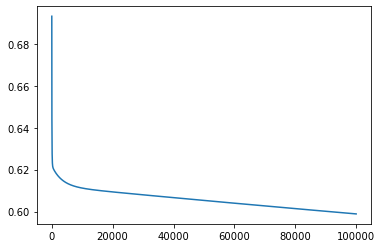

In [150]:
#Cost plot
plt.plot(cost_list)

In [151]:
#Accuracy for training data
train_logistic=sigmoid(npy.dot(train_features,W.T)+B)
for i in range(len(train_logistic)):
    if train_logistic[i][0] > 0.5:
        train_logistic[i][0]=1
    else:
        train_logistic[i][0]=0
a=confusion_matrix(train_diabetes_prediction,train_logistic)
b=accuracy_score(train_diabetes_prediction, train_logistic)
print(a)
print(b)

[[270  30]
 [ 99  61]]
0.7195652173913043


In [152]:
#Accuracy for validation data
val_logistic=sigmoid(npy.dot(validate_features,W.T)+B) 
for i in range(len(val_logistic)):
    if val_logistic[i][0] > 0.5:
        val_logistic[i][0]=1
    else:
        val_logistic[i][0]=0
c=confusion_matrix(validate_diabetes_prediction,val_logistic)
d=accuracy_score(validate_diabetes_prediction, val_logistic)
print(c)
print(d)

[[85 15]
 [39 15]]
0.6493506493506493


In [153]:
#Accuracy for test data
test_logistic=sigmoid(npy.dot(test_features,W.T)+B) 
for i in range(len(test_logistic)):
    if test_logistic[i][0] > 0.5:
        test_logistic[i][0]=1
    else:
        test_logistic[i][0]=0
confusion_matrix(test_diabetes_prediction,test_logistic)
accuracy_score(test_diabetes_prediction, test_logistic)

0.7012987012987013

In [154]:
######################################################### PART 2 ###############################################################
################################################# L1 Regularization ############################################################

data = pds.read_csv("diabetes.csv")
features=data.iloc[:,0:8]
num_samples = features.shape[0]
num_features = features.shape[1]
diabetes_prediction=data.iloc[:,8]
train_features, tmp_features, train_diabetes_prediction, tmp_diabetes_prediction = train_test_split(features,diabetes_prediction, test_size=0.4)
validate_features,test_features,validate_diabetes_prediction,test_diabetes_prediction=train_test_split(tmp_features,tmp_diabetes_prediction,test_size=0.5)

In [157]:
######################################################### PART 2 ###############################################################
################################################# L1 Regularization ############################################################



#Model creation using L1 regularization and ReLU ativation function for hidden layers and sigmoid for output layer 
model = Sequential()

#Layer 1
model.add(Dense(5, input_dim=8, activation='relu', kernel_regularizer='l1'))

#Layer 2
model.add(Dense(8, activation='relu', kernel_regularizer='l1'))

#Output Layer
model.add(Dense(1, activation='sigmoid' ))

#Compiling the L1 model
model.compile(loss='binary_crossentropy',  optimizer='SGD', metrics=['accuracy'])
print(model.summary())


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 5)                 45        
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 48        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 102
Trainable params: 102
Non-trainable params: 0
_________________________________________________________________
None


In [158]:
#Training the L1 model

epochs = 5000  # num of iterations
batch_size = 64
history = model.fit(train_features,train_diabetes_prediction,validation_data=(validate_features, validate_diabetes_prediction),epochs=epochs,batch_size=batch_size)

Epoch 1/5000
8/8 [==============================] - 0s 46ms/step - loss: 4.3155 - accuracy: 0.5674 - val_loss: 1.0972 - val_accuracy: 0.6623
Epoch 2/5000
8/8 [==============================] - 0s 4ms/step - loss: 1.0064 - accuracy: 0.6478 - val_loss: 1.1789 - val_accuracy: 0.6623
Epoch 3/5000
8/8 [==============================] - 0s 4ms/step - loss: 1.0983 - accuracy: 0.6087 - val_loss: 1.0253 - val_accuracy: 0.6623
Epoch 4/5000
8/8 [==============================] - 0s 3ms/step - loss: 0.9726 - accuracy: 0.6370 - val_loss: 1.0136 - val_accuracy: 0.6364
Epoch 5/5000
8/8 [==============================] - 0s 5ms/step - loss: 1.0071 - accuracy: 0.6457 - val_loss: 0.9441 - val_accuracy: 0.6753
Epoch 6/5000
8/8 [==============================] - 0s 4ms/step - loss: 0.9549 - accuracy: 0.6500 - val_loss: 0.9571 - val_accuracy: 0.6299
Epoch 7/5000
8/8 [==============================] - 0s 3ms/step - loss: 0.9451 - accuracy: 0.6478 - val_loss: 0.9407 - val_accuracy: 0.6558
Epoch 8/5000
8/8 [=

8/8 [==============================] - 0s 8ms/step - loss: 0.8567 - accuracy: 0.6522 - val_loss: 0.8422 - val_accuracy: 0.6818
Epoch 60/5000
8/8 [==============================] - 0s 6ms/step - loss: 0.8567 - accuracy: 0.6522 - val_loss: 0.8408 - val_accuracy: 0.6818
Epoch 61/5000
8/8 [==============================] - 0s 6ms/step - loss: 0.8557 - accuracy: 0.6522 - val_loss: 0.8396 - val_accuracy: 0.6818
Epoch 62/5000
8/8 [==============================] - 0s 6ms/step - loss: 0.8543 - accuracy: 0.6522 - val_loss: 0.8369 - val_accuracy: 0.6818
Epoch 63/5000
8/8 [==============================] - 0s 4ms/step - loss: 0.8541 - accuracy: 0.6500 - val_loss: 0.8366 - val_accuracy: 0.6818
Epoch 64/5000
8/8 [==============================] - 0s 5ms/step - loss: 0.8530 - accuracy: 0.6500 - val_loss: 0.8381 - val_accuracy: 0.6818
Epoch 65/5000
8/8 [==============================] - 0s 5ms/step - loss: 0.8523 - accuracy: 0.6543 - val_loss: 0.8371 - val_accuracy: 0.6818
Epoch 66/5000
8/8 [========

8/8 [==============================] - 0s 3ms/step - loss: 0.8206 - accuracy: 0.6500 - val_loss: 0.8075 - val_accuracy: 0.6818
Epoch 118/5000
8/8 [==============================] - 0s 2ms/step - loss: 0.8208 - accuracy: 0.6522 - val_loss: 0.8077 - val_accuracy: 0.6688
Epoch 119/5000
8/8 [==============================] - 0s 4ms/step - loss: 0.8198 - accuracy: 0.6457 - val_loss: 0.8018 - val_accuracy: 0.6883
Epoch 120/5000
8/8 [==============================] - 0s 3ms/step - loss: 0.8189 - accuracy: 0.6522 - val_loss: 0.8032 - val_accuracy: 0.6883
Epoch 121/5000
8/8 [==============================] - 0s 3ms/step - loss: 0.8192 - accuracy: 0.6522 - val_loss: 0.8035 - val_accuracy: 0.6883
Epoch 122/5000
8/8 [==============================] - 0s 6ms/step - loss: 0.8179 - accuracy: 0.6522 - val_loss: 0.7999 - val_accuracy: 0.6883
Epoch 123/5000
8/8 [==============================] - 0s 5ms/step - loss: 0.8173 - accuracy: 0.6543 - val_loss: 0.8000 - val_accuracy: 0.6883
Epoch 124/5000
8/8 [=

8/8 [==============================] - 0s 6ms/step - loss: 0.7911 - accuracy: 0.6543 - val_loss: 0.7729 - val_accuracy: 0.6883
Epoch 175/5000
8/8 [==============================] - 0s 5ms/step - loss: 0.7897 - accuracy: 0.6543 - val_loss: 0.7720 - val_accuracy: 0.6883
Epoch 176/5000
8/8 [==============================] - 0s 6ms/step - loss: 0.7890 - accuracy: 0.6543 - val_loss: 0.7718 - val_accuracy: 0.6883
Epoch 177/5000
8/8 [==============================] - 0s 5ms/step - loss: 0.7888 - accuracy: 0.6543 - val_loss: 0.7689 - val_accuracy: 0.6883
Epoch 178/5000
8/8 [==============================] - 0s 5ms/step - loss: 0.7888 - accuracy: 0.6543 - val_loss: 0.7671 - val_accuracy: 0.6883
Epoch 179/5000
8/8 [==============================] - 0s 4ms/step - loss: 0.7888 - accuracy: 0.6565 - val_loss: 0.7668 - val_accuracy: 0.6883
Epoch 180/5000
8/8 [==============================] - 0s 3ms/step - loss: 0.7882 - accuracy: 0.6565 - val_loss: 0.7694 - val_accuracy: 0.6883
Epoch 181/5000
8/8 [=

8/8 [==============================] - 0s 4ms/step - loss: 0.7647 - accuracy: 0.6522 - val_loss: 0.7467 - val_accuracy: 0.6883
Epoch 232/5000
8/8 [==============================] - 0s 5ms/step - loss: 0.7640 - accuracy: 0.6543 - val_loss: 0.7459 - val_accuracy: 0.6883
Epoch 233/5000
8/8 [==============================] - 0s 4ms/step - loss: 0.7641 - accuracy: 0.6543 - val_loss: 0.7450 - val_accuracy: 0.6883
Epoch 234/5000
8/8 [==============================] - 0s 4ms/step - loss: 0.7636 - accuracy: 0.6565 - val_loss: 0.7469 - val_accuracy: 0.6883
Epoch 235/5000
8/8 [==============================] - 0s 5ms/step - loss: 0.7635 - accuracy: 0.6522 - val_loss: 0.7480 - val_accuracy: 0.6883
Epoch 236/5000
8/8 [==============================] - 0s 3ms/step - loss: 0.7629 - accuracy: 0.6522 - val_loss: 0.7485 - val_accuracy: 0.6883
Epoch 237/5000
8/8 [==============================] - 0s 3ms/step - loss: 0.7618 - accuracy: 0.6522 - val_loss: 0.7472 - val_accuracy: 0.6883
Epoch 238/5000
8/8 [=

Epoch 289/5000
8/8 [==============================] - 0s 5ms/step - loss: 0.7427 - accuracy: 0.6543 - val_loss: 0.7261 - val_accuracy: 0.6883
Epoch 290/5000
8/8 [==============================] - 0s 5ms/step - loss: 0.7422 - accuracy: 0.6543 - val_loss: 0.7259 - val_accuracy: 0.6883
Epoch 291/5000
8/8 [==============================] - 0s 4ms/step - loss: 0.7424 - accuracy: 0.6543 - val_loss: 0.7257 - val_accuracy: 0.6883
Epoch 292/5000
8/8 [==============================] - 0s 4ms/step - loss: 0.7416 - accuracy: 0.6522 - val_loss: 0.7287 - val_accuracy: 0.6818
Epoch 293/5000
8/8 [==============================] - 0s 4ms/step - loss: 0.7416 - accuracy: 0.6522 - val_loss: 0.7270 - val_accuracy: 0.6818
Epoch 294/5000
8/8 [==============================] - 0s 4ms/step - loss: 0.7410 - accuracy: 0.6500 - val_loss: 0.7269 - val_accuracy: 0.6818
Epoch 295/5000
8/8 [==============================] - 0s 4ms/step - loss: 0.7412 - accuracy: 0.6435 - val_loss: 0.7245 - val_accuracy: 0.6883
Epoch 

Epoch 347/5000
8/8 [==============================] - 0s 3ms/step - loss: 0.7199 - accuracy: 0.6609 - val_loss: 0.7169 - val_accuracy: 0.6818
Epoch 348/5000
8/8 [==============================] - 0s 5ms/step - loss: 0.7219 - accuracy: 0.6587 - val_loss: 0.7138 - val_accuracy: 0.6818
Epoch 349/5000
8/8 [==============================] - 0s 6ms/step - loss: 0.7146 - accuracy: 0.6609 - val_loss: 0.7250 - val_accuracy: 0.6818
Epoch 350/5000
8/8 [==============================] - 0s 5ms/step - loss: 0.7139 - accuracy: 0.6696 - val_loss: 0.7152 - val_accuracy: 0.6818
Epoch 351/5000
8/8 [==============================] - 0s 4ms/step - loss: 0.7239 - accuracy: 0.6522 - val_loss: 0.7130 - val_accuracy: 0.6818
Epoch 352/5000
8/8 [==============================] - 0s 4ms/step - loss: 0.7109 - accuracy: 0.6630 - val_loss: 0.7087 - val_accuracy: 0.6818
Epoch 353/5000
8/8 [==============================] - 0s 4ms/step - loss: 0.7157 - accuracy: 0.6587 - val_loss: 0.7058 - val_accuracy: 0.6883
Epoch 

Epoch 405/5000
8/8 [==============================] - 0s 6ms/step - loss: 0.6862 - accuracy: 0.6739 - val_loss: 0.6782 - val_accuracy: 0.6883
Epoch 406/5000
8/8 [==============================] - 0s 7ms/step - loss: 0.6873 - accuracy: 0.6609 - val_loss: 0.6828 - val_accuracy: 0.6883
Epoch 407/5000
8/8 [==============================] - 0s 6ms/step - loss: 0.6851 - accuracy: 0.6652 - val_loss: 0.6796 - val_accuracy: 0.6818
Epoch 408/5000
8/8 [==============================] - 0s 6ms/step - loss: 0.6847 - accuracy: 0.6696 - val_loss: 0.6788 - val_accuracy: 0.6818
Epoch 409/5000
8/8 [==============================] - 0s 5ms/step - loss: 0.6865 - accuracy: 0.6587 - val_loss: 0.6798 - val_accuracy: 0.6883
Epoch 410/5000
8/8 [==============================] - 0s 5ms/step - loss: 0.6833 - accuracy: 0.6587 - val_loss: 0.7011 - val_accuracy: 0.6948
Epoch 411/5000
8/8 [==============================] - 0s 5ms/step - loss: 0.6904 - accuracy: 0.6609 - val_loss: 0.6850 - val_accuracy: 0.6948
Epoch 

Epoch 463/5000
8/8 [==============================] - 0s 3ms/step - loss: 0.6518 - accuracy: 0.6870 - val_loss: 0.6936 - val_accuracy: 0.6623
Epoch 464/5000
8/8 [==============================] - 0s 5ms/step - loss: 0.6702 - accuracy: 0.6609 - val_loss: 0.6098 - val_accuracy: 0.7403
Epoch 465/5000
8/8 [==============================] - 0s 3ms/step - loss: 0.6514 - accuracy: 0.7065 - val_loss: 0.6996 - val_accuracy: 0.6494
Epoch 466/5000
8/8 [==============================] - 0s 3ms/step - loss: 0.6624 - accuracy: 0.6957 - val_loss: 0.6070 - val_accuracy: 0.7403
Epoch 467/5000
8/8 [==============================] - 0s 3ms/step - loss: 0.6707 - accuracy: 0.6848 - val_loss: 0.6545 - val_accuracy: 0.6818
Epoch 468/5000
8/8 [==============================] - 0s 6ms/step - loss: 0.6520 - accuracy: 0.6848 - val_loss: 0.6295 - val_accuracy: 0.7532
Epoch 469/5000
8/8 [==============================] - ETA: 0s - loss: 0.6722 - accuracy: 0.65 - 0s 5ms/step - loss: 0.6519 - accuracy: 0.6804 - val_

8/8 [==============================] - 0s 3ms/step - loss: 0.6311 - accuracy: 0.7043 - val_loss: 0.5959 - val_accuracy: 0.7403
Epoch 521/5000
8/8 [==============================] - 0s 6ms/step - loss: 0.6246 - accuracy: 0.7174 - val_loss: 0.5930 - val_accuracy: 0.7532
Epoch 522/5000
8/8 [==============================] - 0s 3ms/step - loss: 0.6237 - accuracy: 0.7217 - val_loss: 0.6356 - val_accuracy: 0.7338
Epoch 523/5000
8/8 [==============================] - 0s 4ms/step - loss: 0.6328 - accuracy: 0.7022 - val_loss: 0.6111 - val_accuracy: 0.7727
Epoch 524/5000
8/8 [==============================] - 0s 5ms/step - loss: 0.6415 - accuracy: 0.6913 - val_loss: 0.7243 - val_accuracy: 0.5844
Epoch 525/5000
8/8 [==============================] - 0s 5ms/step - loss: 0.6516 - accuracy: 0.6739 - val_loss: 0.5977 - val_accuracy: 0.7013
Epoch 526/5000
8/8 [==============================] - 0s 5ms/step - loss: 0.6261 - accuracy: 0.6957 - val_loss: 0.6018 - val_accuracy: 0.7078
Epoch 527/5000
8/8 [=

Epoch 578/5000
8/8 [==============================] - 0s 4ms/step - loss: 0.6147 - accuracy: 0.7109 - val_loss: 0.5657 - val_accuracy: 0.7532
Epoch 579/5000
8/8 [==============================] - 0s 5ms/step - loss: 0.6159 - accuracy: 0.7000 - val_loss: 0.5799 - val_accuracy: 0.7078
Epoch 580/5000
8/8 [==============================] - 0s 4ms/step - loss: 0.6401 - accuracy: 0.6609 - val_loss: 0.6024 - val_accuracy: 0.7532
Epoch 581/5000
8/8 [==============================] - 0s 5ms/step - loss: 0.6301 - accuracy: 0.6935 - val_loss: 0.5655 - val_accuracy: 0.7792
Epoch 582/5000
8/8 [==============================] - 0s 3ms/step - loss: 0.6090 - accuracy: 0.7196 - val_loss: 0.5631 - val_accuracy: 0.7792
Epoch 583/5000
8/8 [==============================] - 0s 5ms/step - loss: 0.6121 - accuracy: 0.6978 - val_loss: 0.5789 - val_accuracy: 0.7273
Epoch 584/5000
8/8 [==============================] - 0s 5ms/step - loss: 0.6099 - accuracy: 0.7065 - val_loss: 0.6028 - val_accuracy: 0.6753
Epoch 

Epoch 636/5000
8/8 [==============================] - 0s 4ms/step - loss: 0.6221 - accuracy: 0.7000 - val_loss: 0.5531 - val_accuracy: 0.7727
Epoch 637/5000
8/8 [==============================] - 0s 4ms/step - loss: 0.6119 - accuracy: 0.6848 - val_loss: 0.5787 - val_accuracy: 0.7078
Epoch 638/5000
8/8 [==============================] - 0s 3ms/step - loss: 0.6183 - accuracy: 0.6913 - val_loss: 0.5563 - val_accuracy: 0.7403
Epoch 639/5000
8/8 [==============================] - 0s 5ms/step - loss: 0.6238 - accuracy: 0.6826 - val_loss: 0.6167 - val_accuracy: 0.7143
Epoch 640/5000
8/8 [==============================] - 0s 3ms/step - loss: 0.6077 - accuracy: 0.7065 - val_loss: 0.5558 - val_accuracy: 0.7532
Epoch 641/5000
8/8 [==============================] - 0s 3ms/step - loss: 0.6024 - accuracy: 0.7217 - val_loss: 0.6157 - val_accuracy: 0.6948
Epoch 642/5000
8/8 [==============================] - 0s 3ms/step - loss: 0.5985 - accuracy: 0.7217 - val_loss: 0.5856 - val_accuracy: 0.7792
Epoch 

Epoch 694/5000
8/8 [==============================] - 0s 5ms/step - loss: 0.6392 - accuracy: 0.7109 - val_loss: 0.9563 - val_accuracy: 0.3766
Epoch 695/5000
8/8 [==============================] - 0s 6ms/step - loss: 0.6352 - accuracy: 0.6870 - val_loss: 0.5410 - val_accuracy: 0.7468
Epoch 696/5000
8/8 [==============================] - 0s 3ms/step - loss: 0.5994 - accuracy: 0.7261 - val_loss: 0.9041 - val_accuracy: 0.3766
Epoch 697/5000
8/8 [==============================] - 0s 5ms/step - loss: 0.6561 - accuracy: 0.6609 - val_loss: 0.5837 - val_accuracy: 0.7597
Epoch 698/5000
8/8 [==============================] - 0s 6ms/step - loss: 0.6063 - accuracy: 0.7152 - val_loss: 0.5354 - val_accuracy: 0.8182
Epoch 699/5000
8/8 [==============================] - 0s 7ms/step - loss: 0.5910 - accuracy: 0.7174 - val_loss: 0.7667 - val_accuracy: 0.5000
Epoch 700/5000
8/8 [==============================] - 0s 6ms/step - loss: 0.6209 - accuracy: 0.6804 - val_loss: 0.5365 - val_accuracy: 0.7727
Epoch 

Epoch 752/5000
8/8 [==============================] - 0s 4ms/step - loss: 0.5950 - accuracy: 0.7261 - val_loss: 0.5467 - val_accuracy: 0.7662
Epoch 753/5000
8/8 [==============================] - 0s 3ms/step - loss: 0.5900 - accuracy: 0.7196 - val_loss: 0.6226 - val_accuracy: 0.6623
Epoch 754/5000
8/8 [==============================] - 0s 3ms/step - loss: 0.6124 - accuracy: 0.7087 - val_loss: 0.5643 - val_accuracy: 0.7662
Epoch 755/5000
8/8 [==============================] - 0s 5ms/step - loss: 0.5834 - accuracy: 0.7261 - val_loss: 0.7186 - val_accuracy: 0.6623
Epoch 756/5000
8/8 [==============================] - 0s 3ms/step - loss: 0.6018 - accuracy: 0.7130 - val_loss: 0.5522 - val_accuracy: 0.7857
Epoch 757/5000
8/8 [==============================] - 0s 5ms/step - loss: 0.5921 - accuracy: 0.7261 - val_loss: 0.7312 - val_accuracy: 0.5195
Epoch 758/5000
8/8 [==============================] - 0s 5ms/step - loss: 0.6177 - accuracy: 0.7000 - val_loss: 0.5633 - val_accuracy: 0.7597
Epoch 

Epoch 810/5000
8/8 [==============================] - 0s 4ms/step - loss: 0.6323 - accuracy: 0.6891 - val_loss: 0.6052 - val_accuracy: 0.6883
Epoch 811/5000
8/8 [==============================] - 0s 7ms/step - loss: 0.6113 - accuracy: 0.6826 - val_loss: 0.5777 - val_accuracy: 0.6753
Epoch 812/5000
8/8 [==============================] - 0s 4ms/step - loss: 0.5975 - accuracy: 0.7087 - val_loss: 0.6324 - val_accuracy: 0.6623
Epoch 813/5000
8/8 [==============================] - 0s 3ms/step - loss: 0.5999 - accuracy: 0.6826 - val_loss: 0.5419 - val_accuracy: 0.7532
Epoch 814/5000
8/8 [==============================] - 0s 4ms/step - loss: 0.5827 - accuracy: 0.7130 - val_loss: 0.6332 - val_accuracy: 0.7013
Epoch 815/5000
8/8 [==============================] - 0s 3ms/step - loss: 0.6210 - accuracy: 0.6913 - val_loss: 0.6979 - val_accuracy: 0.5649
Epoch 816/5000
8/8 [==============================] - 0s 3ms/step - loss: 0.6134 - accuracy: 0.6978 - val_loss: 0.6313 - val_accuracy: 0.6818
Epoch 

Epoch 868/5000
8/8 [==============================] - 0s 3ms/step - loss: 0.5940 - accuracy: 0.7043 - val_loss: 0.5500 - val_accuracy: 0.7662
Epoch 869/5000
8/8 [==============================] - 0s 3ms/step - loss: 0.5736 - accuracy: 0.7239 - val_loss: 0.5223 - val_accuracy: 0.8052
Epoch 870/5000
8/8 [==============================] - 0s 5ms/step - loss: 0.5956 - accuracy: 0.6978 - val_loss: 0.5280 - val_accuracy: 0.7532
Epoch 871/5000
8/8 [==============================] - 0s 3ms/step - loss: 0.6007 - accuracy: 0.6804 - val_loss: 0.6976 - val_accuracy: 0.6688
Epoch 872/5000
8/8 [==============================] - 0s 3ms/step - loss: 0.6078 - accuracy: 0.7348 - val_loss: 0.5442 - val_accuracy: 0.6948
Epoch 873/5000
8/8 [==============================] - 0s 5ms/step - loss: 0.5841 - accuracy: 0.7022 - val_loss: 0.5139 - val_accuracy: 0.7987
Epoch 874/5000
8/8 [==============================] - 0s 4ms/step - loss: 0.5816 - accuracy: 0.7326 - val_loss: 0.5362 - val_accuracy: 0.7403
Epoch 

8/8 [==============================] - 0s 6ms/step - loss: 0.6208 - accuracy: 0.6696 - val_loss: 0.5973 - val_accuracy: 0.7273
Epoch 926/5000
8/8 [==============================] - 0s 4ms/step - loss: 0.5835 - accuracy: 0.7217 - val_loss: 0.5795 - val_accuracy: 0.6688
Epoch 927/5000
8/8 [==============================] - 0s 5ms/step - loss: 0.5749 - accuracy: 0.7370 - val_loss: 0.8138 - val_accuracy: 0.4870
Epoch 928/5000
8/8 [==============================] - 0s 5ms/step - loss: 0.6012 - accuracy: 0.6826 - val_loss: 0.5656 - val_accuracy: 0.6883
Epoch 929/5000
8/8 [==============================] - 0s 6ms/step - loss: 0.5866 - accuracy: 0.7217 - val_loss: 0.8488 - val_accuracy: 0.6623
Epoch 930/5000
8/8 [==============================] - 0s 8ms/step - loss: 0.6499 - accuracy: 0.6870 - val_loss: 0.5319 - val_accuracy: 0.7338
Epoch 931/5000
8/8 [==============================] - 0s 5ms/step - loss: 0.5827 - accuracy: 0.7196 - val_loss: 0.5247 - val_accuracy: 0.7727
Epoch 932/5000
8/8 [=

8/8 [==============================] - 0s 5ms/step - loss: 0.5995 - accuracy: 0.6935 - val_loss: 0.8401 - val_accuracy: 0.4351
Epoch 983/5000
8/8 [==============================] - 0s 5ms/step - loss: 0.6230 - accuracy: 0.6543 - val_loss: 0.5421 - val_accuracy: 0.8052
Epoch 984/5000
8/8 [==============================] - 0s 4ms/step - loss: 0.5849 - accuracy: 0.7283 - val_loss: 0.5208 - val_accuracy: 0.7597
Epoch 985/5000
8/8 [==============================] - 0s 4ms/step - loss: 0.5720 - accuracy: 0.7217 - val_loss: 0.6970 - val_accuracy: 0.6039
Epoch 986/5000
8/8 [==============================] - 0s 5ms/step - loss: 0.5845 - accuracy: 0.7152 - val_loss: 0.5271 - val_accuracy: 0.7403
Epoch 987/5000
8/8 [==============================] - 0s 4ms/step - loss: 0.5846 - accuracy: 0.7043 - val_loss: 0.5443 - val_accuracy: 0.7857
Epoch 988/5000
8/8 [==============================] - 0s 4ms/step - loss: 0.5855 - accuracy: 0.7217 - val_loss: 0.7344 - val_accuracy: 0.6623
Epoch 989/5000
8/8 [=

8/8 [==============================] - 0s 10ms/step - loss: 0.5959 - accuracy: 0.6978 - val_loss: 0.5566 - val_accuracy: 0.7338
Epoch 1040/5000
8/8 [==============================] - 0s 7ms/step - loss: 0.5884 - accuracy: 0.7130 - val_loss: 0.8216 - val_accuracy: 0.5000
Epoch 1041/5000
8/8 [==============================] - 0s 5ms/step - loss: 0.6071 - accuracy: 0.6913 - val_loss: 0.5215 - val_accuracy: 0.7792
Epoch 1042/5000
8/8 [==============================] - 0s 6ms/step - loss: 0.5799 - accuracy: 0.7348 - val_loss: 0.5273 - val_accuracy: 0.7468
Epoch 1043/5000
8/8 [==============================] - 0s 6ms/step - loss: 0.5865 - accuracy: 0.7109 - val_loss: 0.5548 - val_accuracy: 0.7403
Epoch 1044/5000
8/8 [==============================] - 0s 5ms/step - loss: 0.5976 - accuracy: 0.6891 - val_loss: 0.5520 - val_accuracy: 0.7662
Epoch 1045/5000
8/8 [==============================] - 0s 5ms/step - loss: 0.5800 - accuracy: 0.7239 - val_loss: 0.7176 - val_accuracy: 0.6623
Epoch 1046/500

8/8 [==============================] - 0s 5ms/step - loss: 0.6050 - accuracy: 0.6913 - val_loss: 0.5120 - val_accuracy: 0.8182
Epoch 1097/5000
8/8 [==============================] - 0s 5ms/step - loss: 0.5680 - accuracy: 0.7348 - val_loss: 0.5921 - val_accuracy: 0.6688
Epoch 1098/5000
8/8 [==============================] - 0s 3ms/step - loss: 0.6110 - accuracy: 0.6870 - val_loss: 0.5388 - val_accuracy: 0.8182
Epoch 1099/5000
8/8 [==============================] - 0s 5ms/step - loss: 0.6213 - accuracy: 0.6870 - val_loss: 0.6304 - val_accuracy: 0.6558
Epoch 1100/5000
8/8 [==============================] - 0s 4ms/step - loss: 0.6036 - accuracy: 0.7000 - val_loss: 0.5990 - val_accuracy: 0.6883
Epoch 1101/5000
8/8 [==============================] - 0s 5ms/step - loss: 0.5905 - accuracy: 0.6978 - val_loss: 0.5150 - val_accuracy: 0.7792
Epoch 1102/5000
8/8 [==============================] - 0s 3ms/step - loss: 0.5734 - accuracy: 0.7239 - val_loss: 0.5462 - val_accuracy: 0.7532
Epoch 1103/5000

8/8 [==============================] - 0s 11ms/step - loss: 0.5823 - accuracy: 0.7196 - val_loss: 0.7950 - val_accuracy: 0.6623
Epoch 1154/5000
8/8 [==============================] - 0s 9ms/step - loss: 0.6020 - accuracy: 0.7174 - val_loss: 0.5359 - val_accuracy: 0.7792
Epoch 1155/5000
8/8 [==============================] - 0s 8ms/step - loss: 0.5681 - accuracy: 0.7326 - val_loss: 0.5936 - val_accuracy: 0.7078
Epoch 1156/5000
8/8 [==============================] - 0s 9ms/step - loss: 0.6072 - accuracy: 0.7087 - val_loss: 0.6067 - val_accuracy: 0.7013
Epoch 1157/5000
8/8 [==============================] - 0s 5ms/step - loss: 0.5983 - accuracy: 0.7065 - val_loss: 0.5213 - val_accuracy: 0.7792
Epoch 1158/5000
8/8 [==============================] - 0s 7ms/step - loss: 0.5731 - accuracy: 0.7478 - val_loss: 0.7012 - val_accuracy: 0.5584
Epoch 1159/5000
8/8 [==============================] - 0s 5ms/step - loss: 0.5957 - accuracy: 0.7000 - val_loss: 0.5504 - val_accuracy: 0.7727
Epoch 1160/500

8/8 [==============================] - 0s 5ms/step - loss: 0.5833 - accuracy: 0.7326 - val_loss: 0.5174 - val_accuracy: 0.7662
Epoch 1211/5000
8/8 [==============================] - 0s 5ms/step - loss: 0.6150 - accuracy: 0.6913 - val_loss: 0.5458 - val_accuracy: 0.8052
Epoch 1212/5000
8/8 [==============================] - 0s 4ms/step - loss: 0.5760 - accuracy: 0.7304 - val_loss: 0.6048 - val_accuracy: 0.6688
Epoch 1213/5000
8/8 [==============================] - 0s 5ms/step - loss: 0.5787 - accuracy: 0.7370 - val_loss: 0.6685 - val_accuracy: 0.6818
Epoch 1214/5000
8/8 [==============================] - 0s 4ms/step - loss: 0.5981 - accuracy: 0.7022 - val_loss: 0.5421 - val_accuracy: 0.7078
Epoch 1215/5000
8/8 [==============================] - 0s 4ms/step - loss: 0.6094 - accuracy: 0.7109 - val_loss: 0.5164 - val_accuracy: 0.7792
Epoch 1216/5000
8/8 [==============================] - 0s 5ms/step - loss: 0.6036 - accuracy: 0.6978 - val_loss: 0.5357 - val_accuracy: 0.7338
Epoch 1217/5000

Epoch 1267/5000
8/8 [==============================] - 0s 5ms/step - loss: 0.6022 - accuracy: 0.7174 - val_loss: 0.6274 - val_accuracy: 0.6429
Epoch 1268/5000
8/8 [==============================] - 0s 4ms/step - loss: 0.5813 - accuracy: 0.7065 - val_loss: 0.5374 - val_accuracy: 0.7013
Epoch 1269/5000
8/8 [==============================] - 0s 5ms/step - loss: 0.5708 - accuracy: 0.7304 - val_loss: 0.5734 - val_accuracy: 0.7403
Epoch 1270/5000
8/8 [==============================] - 0s 4ms/step - loss: 0.5838 - accuracy: 0.7065 - val_loss: 0.7003 - val_accuracy: 0.5325
Epoch 1271/5000
8/8 [==============================] - 0s 4ms/step - loss: 0.6000 - accuracy: 0.7087 - val_loss: 0.5226 - val_accuracy: 0.7532
Epoch 1272/5000
8/8 [==============================] - 0s 4ms/step - loss: 0.5774 - accuracy: 0.7065 - val_loss: 0.5784 - val_accuracy: 0.7208
Epoch 1273/5000
8/8 [==============================] - 0s 5ms/step - loss: 0.5638 - accuracy: 0.7391 - val_loss: 0.7008 - val_accuracy: 0.6623

Epoch 1324/5000
8/8 [==============================] - 0s 4ms/step - loss: 0.6068 - accuracy: 0.6957 - val_loss: 0.5472 - val_accuracy: 0.8052
Epoch 1325/5000
8/8 [==============================] - 0s 4ms/step - loss: 0.5781 - accuracy: 0.7304 - val_loss: 0.6140 - val_accuracy: 0.6883
Epoch 1326/5000
8/8 [==============================] - ETA: 0s - loss: 0.8235 - accuracy: 0.56 - 0s 5ms/step - loss: 0.6216 - accuracy: 0.6913 - val_loss: 0.5465 - val_accuracy: 0.7597
Epoch 1327/5000
8/8 [==============================] - 0s 4ms/step - loss: 0.5874 - accuracy: 0.7065 - val_loss: 0.6851 - val_accuracy: 0.6169
Epoch 1328/5000
8/8 [==============================] - 0s 5ms/step - loss: 0.6026 - accuracy: 0.6957 - val_loss: 0.6170 - val_accuracy: 0.6948
Epoch 1329/5000
8/8 [==============================] - 0s 4ms/step - loss: 0.5733 - accuracy: 0.7348 - val_loss: 0.5494 - val_accuracy: 0.7468
Epoch 1330/5000
8/8 [==============================] - 0s 5ms/step - loss: 0.5897 - accuracy: 0.7022

Epoch 1381/5000
8/8 [==============================] - 0s 3ms/step - loss: 0.5614 - accuracy: 0.7348 - val_loss: 0.4979 - val_accuracy: 0.8182
Epoch 1382/5000
8/8 [==============================] - 0s 4ms/step - loss: 0.5679 - accuracy: 0.7370 - val_loss: 0.5051 - val_accuracy: 0.7922
Epoch 1383/5000
8/8 [==============================] - 0s 3ms/step - loss: 0.5527 - accuracy: 0.7348 - val_loss: 0.5920 - val_accuracy: 0.7143
Epoch 1384/5000
8/8 [==============================] - 0s 3ms/step - loss: 0.6126 - accuracy: 0.6978 - val_loss: 0.6775 - val_accuracy: 0.6623
Epoch 1385/5000
8/8 [==============================] - 0s 3ms/step - loss: 0.6026 - accuracy: 0.6978 - val_loss: 0.5418 - val_accuracy: 0.7403
Epoch 1386/5000
8/8 [==============================] - 0s 5ms/step - loss: 0.5737 - accuracy: 0.7413 - val_loss: 0.5207 - val_accuracy: 0.7792
Epoch 1387/5000
8/8 [==============================] - 0s 5ms/step - loss: 0.5739 - accuracy: 0.7022 - val_loss: 0.5229 - val_accuracy: 0.8052

8/8 [==============================] - 0s 4ms/step - loss: 0.5872 - accuracy: 0.7196 - val_loss: 0.5617 - val_accuracy: 0.8117
Epoch 1439/5000
8/8 [==============================] - 0s 4ms/step - loss: 0.5744 - accuracy: 0.7348 - val_loss: 0.6656 - val_accuracy: 0.6623
Epoch 1440/5000
8/8 [==============================] - 0s 4ms/step - loss: 0.6187 - accuracy: 0.7152 - val_loss: 0.5148 - val_accuracy: 0.8247
Epoch 1441/5000
8/8 [==============================] - 0s 4ms/step - loss: 0.5816 - accuracy: 0.7217 - val_loss: 0.5196 - val_accuracy: 0.7662
Epoch 1442/5000
8/8 [==============================] - 0s 4ms/step - loss: 0.5662 - accuracy: 0.7217 - val_loss: 0.6485 - val_accuracy: 0.6429
Epoch 1443/5000
8/8 [==============================] - 0s 5ms/step - loss: 0.5968 - accuracy: 0.7130 - val_loss: 0.5399 - val_accuracy: 0.7857
Epoch 1444/5000
8/8 [==============================] - 0s 4ms/step - loss: 0.5662 - accuracy: 0.7348 - val_loss: 0.5562 - val_accuracy: 0.6818
Epoch 1445/5000

8/8 [==============================] - 0s 4ms/step - loss: 0.5605 - accuracy: 0.7391 - val_loss: 0.5149 - val_accuracy: 0.7857
Epoch 1496/5000
8/8 [==============================] - 0s 4ms/step - loss: 0.5947 - accuracy: 0.7000 - val_loss: 0.5368 - val_accuracy: 0.7597
Epoch 1497/5000
8/8 [==============================] - 0s 5ms/step - loss: 0.6109 - accuracy: 0.7022 - val_loss: 0.5944 - val_accuracy: 0.7208
Epoch 1498/5000
8/8 [==============================] - 0s 4ms/step - loss: 0.5889 - accuracy: 0.7130 - val_loss: 0.6075 - val_accuracy: 0.6688
Epoch 1499/5000
8/8 [==============================] - 0s 4ms/step - loss: 0.5941 - accuracy: 0.7152 - val_loss: 0.6151 - val_accuracy: 0.6948
Epoch 1500/5000
8/8 [==============================] - 0s 5ms/step - loss: 0.5898 - accuracy: 0.7217 - val_loss: 0.6662 - val_accuracy: 0.6753
Epoch 1501/5000
8/8 [==============================] - 0s 5ms/step - loss: 0.5969 - accuracy: 0.7022 - val_loss: 0.6204 - val_accuracy: 0.7143
Epoch 1502/5000

8/8 [==============================] - 0s 5ms/step - loss: 0.5733 - accuracy: 0.7109 - val_loss: 0.5344 - val_accuracy: 0.7922
Epoch 1553/5000
8/8 [==============================] - 0s 5ms/step - loss: 0.5735 - accuracy: 0.7457 - val_loss: 0.5199 - val_accuracy: 0.8182
Epoch 1554/5000
8/8 [==============================] - 0s 4ms/step - loss: 0.5833 - accuracy: 0.7239 - val_loss: 0.5646 - val_accuracy: 0.7078
Epoch 1555/5000
8/8 [==============================] - 0s 6ms/step - loss: 0.5878 - accuracy: 0.7043 - val_loss: 0.8379 - val_accuracy: 0.6623
Epoch 1556/5000
8/8 [==============================] - 0s 6ms/step - loss: 0.6348 - accuracy: 0.7109 - val_loss: 0.6359 - val_accuracy: 0.6429
Epoch 1557/5000
8/8 [==============================] - 0s 4ms/step - loss: 0.5869 - accuracy: 0.7087 - val_loss: 0.5190 - val_accuracy: 0.8247
Epoch 1558/5000
8/8 [==============================] - 0s 11ms/step - loss: 0.5676 - accuracy: 0.7326 - val_loss: 0.6191 - val_accuracy: 0.6948
Epoch 1559/500

8/8 [==============================] - 0s 5ms/step - loss: 0.5696 - accuracy: 0.7435 - val_loss: 0.5255 - val_accuracy: 0.8052
Epoch 1610/5000
8/8 [==============================] - 0s 6ms/step - loss: 0.5650 - accuracy: 0.7348 - val_loss: 0.5428 - val_accuracy: 0.7857
Epoch 1611/5000
8/8 [==============================] - 0s 11ms/step - loss: 0.5596 - accuracy: 0.7326 - val_loss: 0.4990 - val_accuracy: 0.8117
Epoch 1612/5000
8/8 [==============================] - 0s 7ms/step - loss: 0.5937 - accuracy: 0.7087 - val_loss: 0.5360 - val_accuracy: 0.7273
Epoch 1613/5000
8/8 [==============================] - 0s 7ms/step - loss: 0.5860 - accuracy: 0.7261 - val_loss: 0.6742 - val_accuracy: 0.6104
Epoch 1614/5000
8/8 [==============================] - 0s 6ms/step - loss: 0.5923 - accuracy: 0.6848 - val_loss: 0.5145 - val_accuracy: 0.7922
Epoch 1615/5000
8/8 [==============================] - 0s 5ms/step - loss: 0.5679 - accuracy: 0.7457 - val_loss: 0.5292 - val_accuracy: 0.7662
Epoch 1616/500

8/8 [==============================] - 0s 8ms/step - loss: 0.5938 - accuracy: 0.7152 - val_loss: 0.6225 - val_accuracy: 0.6818
Epoch 1667/5000
8/8 [==============================] - 0s 8ms/step - loss: 0.5879 - accuracy: 0.7130 - val_loss: 0.4934 - val_accuracy: 0.8506
Epoch 1668/5000
8/8 [==============================] - 0s 5ms/step - loss: 0.5895 - accuracy: 0.7370 - val_loss: 0.5351 - val_accuracy: 0.7662
Epoch 1669/5000
8/8 [==============================] - 0s 7ms/step - loss: 0.5755 - accuracy: 0.7413 - val_loss: 0.6143 - val_accuracy: 0.6753
Epoch 1670/5000
8/8 [==============================] - 0s 6ms/step - loss: 0.5976 - accuracy: 0.7130 - val_loss: 0.6679 - val_accuracy: 0.6623
Epoch 1671/5000
8/8 [==============================] - 0s 7ms/step - loss: 0.6172 - accuracy: 0.7109 - val_loss: 0.5056 - val_accuracy: 0.8182
Epoch 1672/5000
8/8 [==============================] - 0s 8ms/step - loss: 0.6013 - accuracy: 0.6783 - val_loss: 0.5352 - val_accuracy: 0.7987
Epoch 1673/5000

8/8 [==============================] - 0s 7ms/step - loss: 0.5728 - accuracy: 0.7348 - val_loss: 0.5718 - val_accuracy: 0.6883
Epoch 1724/5000
8/8 [==============================] - 0s 5ms/step - loss: 0.6015 - accuracy: 0.6935 - val_loss: 0.5874 - val_accuracy: 0.7143
Epoch 1725/5000
8/8 [==============================] - 0s 7ms/step - loss: 0.6084 - accuracy: 0.7065 - val_loss: 0.6845 - val_accuracy: 0.6623
Epoch 1726/5000
8/8 [==============================] - 0s 8ms/step - loss: 0.6223 - accuracy: 0.6761 - val_loss: 0.5565 - val_accuracy: 0.7597
Epoch 1727/5000
8/8 [==============================] - 0s 6ms/step - loss: 0.5726 - accuracy: 0.7217 - val_loss: 0.5548 - val_accuracy: 0.7273
Epoch 1728/5000
8/8 [==============================] - 0s 6ms/step - loss: 0.6048 - accuracy: 0.7261 - val_loss: 0.5426 - val_accuracy: 0.7857
Epoch 1729/5000
8/8 [==============================] - 0s 5ms/step - loss: 0.5818 - accuracy: 0.7239 - val_loss: 0.6277 - val_accuracy: 0.6753
Epoch 1730/5000

8/8 [==============================] - 0s 5ms/step - loss: 0.5919 - accuracy: 0.7022 - val_loss: 0.5542 - val_accuracy: 0.7662
Epoch 1781/5000
8/8 [==============================] - 0s 4ms/step - loss: 0.5784 - accuracy: 0.7174 - val_loss: 0.7758 - val_accuracy: 0.5000
Epoch 1782/5000
8/8 [==============================] - 0s 3ms/step - loss: 0.5955 - accuracy: 0.7130 - val_loss: 0.5294 - val_accuracy: 0.7403
Epoch 1783/5000
8/8 [==============================] - 0s 5ms/step - loss: 0.5819 - accuracy: 0.7152 - val_loss: 0.5482 - val_accuracy: 0.7922
Epoch 1784/5000
8/8 [==============================] - 0s 7ms/step - loss: 0.5657 - accuracy: 0.7304 - val_loss: 0.5349 - val_accuracy: 0.7922
Epoch 1785/5000
8/8 [==============================] - 0s 6ms/step - loss: 0.5901 - accuracy: 0.7087 - val_loss: 0.6505 - val_accuracy: 0.6429
Epoch 1786/5000
8/8 [==============================] - 0s 9ms/step - loss: 0.5803 - accuracy: 0.7304 - val_loss: 0.5128 - val_accuracy: 0.8052
Epoch 1787/5000

8/8 [==============================] - 0s 5ms/step - loss: 0.5861 - accuracy: 0.7065 - val_loss: 0.5377 - val_accuracy: 0.7857
Epoch 1838/5000
8/8 [==============================] - 0s 6ms/step - loss: 0.6032 - accuracy: 0.7217 - val_loss: 0.5245 - val_accuracy: 0.7987
Epoch 1839/5000
8/8 [==============================] - 0s 5ms/step - loss: 0.5719 - accuracy: 0.7261 - val_loss: 0.5419 - val_accuracy: 0.7662
Epoch 1840/5000
8/8 [==============================] - 0s 9ms/step - loss: 0.5986 - accuracy: 0.7196 - val_loss: 0.6053 - val_accuracy: 0.7078
Epoch 1841/5000
8/8 [==============================] - 0s 6ms/step - loss: 0.5965 - accuracy: 0.7326 - val_loss: 0.6095 - val_accuracy: 0.6753
Epoch 1842/5000
8/8 [==============================] - 0s 12ms/step - loss: 0.5625 - accuracy: 0.7457 - val_loss: 0.5148 - val_accuracy: 0.7662
Epoch 1843/5000
8/8 [==============================] - 0s 17ms/step - loss: 0.5764 - accuracy: 0.7326 - val_loss: 0.5247 - val_accuracy: 0.7922
Epoch 1844/50

8/8 [==============================] - 0s 6ms/step - loss: 0.5859 - accuracy: 0.7130 - val_loss: 0.4975 - val_accuracy: 0.8117
Epoch 1895/5000
8/8 [==============================] - 0s 7ms/step - loss: 0.5895 - accuracy: 0.7174 - val_loss: 0.4995 - val_accuracy: 0.8247
Epoch 1896/5000
8/8 [==============================] - 0s 7ms/step - loss: 0.5867 - accuracy: 0.7217 - val_loss: 0.7533 - val_accuracy: 0.5779
Epoch 1897/5000
8/8 [==============================] - 0s 8ms/step - loss: 0.6065 - accuracy: 0.7022 - val_loss: 0.5293 - val_accuracy: 0.7857
Epoch 1898/5000
8/8 [==============================] - 0s 7ms/step - loss: 0.5972 - accuracy: 0.6826 - val_loss: 0.5572 - val_accuracy: 0.7143
Epoch 1899/5000
8/8 [==============================] - 0s 7ms/step - loss: 0.5937 - accuracy: 0.7065 - val_loss: 0.5024 - val_accuracy: 0.8117
Epoch 1900/5000
8/8 [==============================] - 0s 5ms/step - loss: 0.5735 - accuracy: 0.7435 - val_loss: 0.5213 - val_accuracy: 0.7662
Epoch 1901/5000

8/8 [==============================] - 0s 4ms/step - loss: 0.5904 - accuracy: 0.7217 - val_loss: 0.6301 - val_accuracy: 0.6948
Epoch 1952/5000
8/8 [==============================] - 0s 3ms/step - loss: 0.5808 - accuracy: 0.7261 - val_loss: 0.5351 - val_accuracy: 0.7857
Epoch 1953/5000
8/8 [==============================] - 0s 3ms/step - loss: 0.5603 - accuracy: 0.7304 - val_loss: 0.7634 - val_accuracy: 0.5260
Epoch 1954/5000
8/8 [==============================] - 0s 5ms/step - loss: 0.6307 - accuracy: 0.6826 - val_loss: 0.7166 - val_accuracy: 0.6623
Epoch 1955/5000
8/8 [==============================] - 0s 3ms/step - loss: 0.5836 - accuracy: 0.7348 - val_loss: 0.5251 - val_accuracy: 0.7143
Epoch 1956/5000
8/8 [==============================] - 0s 5ms/step - loss: 0.5817 - accuracy: 0.7109 - val_loss: 0.5128 - val_accuracy: 0.7727
Epoch 1957/5000
8/8 [==============================] - 0s 5ms/step - loss: 0.5733 - accuracy: 0.7565 - val_loss: 0.5376 - val_accuracy: 0.7662
Epoch 1958/5000

8/8 [==============================] - 0s 4ms/step - loss: 0.5697 - accuracy: 0.7261 - val_loss: 0.7275 - val_accuracy: 0.6688
Epoch 2009/5000
8/8 [==============================] - 0s 5ms/step - loss: 0.6351 - accuracy: 0.7000 - val_loss: 0.5173 - val_accuracy: 0.8052
Epoch 2010/5000
8/8 [==============================] - 0s 4ms/step - loss: 0.5791 - accuracy: 0.7152 - val_loss: 0.6260 - val_accuracy: 0.6883
Epoch 2011/5000
8/8 [==============================] - 0s 3ms/step - loss: 0.5834 - accuracy: 0.7152 - val_loss: 0.5152 - val_accuracy: 0.7662
Epoch 2012/5000
8/8 [==============================] - 0s 6ms/step - loss: 0.5662 - accuracy: 0.7370 - val_loss: 0.5755 - val_accuracy: 0.7208
Epoch 2013/5000
8/8 [==============================] - 0s 4ms/step - loss: 0.5505 - accuracy: 0.7435 - val_loss: 0.5288 - val_accuracy: 0.7468
Epoch 2014/5000
8/8 [==============================] - 0s 3ms/step - loss: 0.5844 - accuracy: 0.7130 - val_loss: 0.6451 - val_accuracy: 0.7078
Epoch 2015/5000

8/8 [==============================] - 0s 6ms/step - loss: 0.6179 - accuracy: 0.7000 - val_loss: 0.5537 - val_accuracy: 0.7792
Epoch 2066/5000
8/8 [==============================] - 0s 5ms/step - loss: 0.5788 - accuracy: 0.7152 - val_loss: 0.5167 - val_accuracy: 0.7468
Epoch 2067/5000
8/8 [==============================] - 0s 5ms/step - loss: 0.5763 - accuracy: 0.7196 - val_loss: 0.5146 - val_accuracy: 0.7987
Epoch 2068/5000
8/8 [==============================] - 0s 4ms/step - loss: 0.5675 - accuracy: 0.7457 - val_loss: 0.5423 - val_accuracy: 0.7208
Epoch 2069/5000
8/8 [==============================] - 0s 4ms/step - loss: 0.5776 - accuracy: 0.7239 - val_loss: 0.5058 - val_accuracy: 0.8052
Epoch 2070/5000
8/8 [==============================] - 0s 6ms/step - loss: 0.5790 - accuracy: 0.7152 - val_loss: 0.5661 - val_accuracy: 0.7532
Epoch 2071/5000
8/8 [==============================] - 0s 4ms/step - loss: 0.5631 - accuracy: 0.7522 - val_loss: 0.5535 - val_accuracy: 0.7208
Epoch 2072/5000

8/8 [==============================] - 0s 5ms/step - loss: 0.5787 - accuracy: 0.7261 - val_loss: 0.5431 - val_accuracy: 0.7727
Epoch 2123/5000
8/8 [==============================] - 0s 5ms/step - loss: 0.5791 - accuracy: 0.7370 - val_loss: 0.5823 - val_accuracy: 0.7013
Epoch 2124/5000
8/8 [==============================] - 0s 5ms/step - loss: 0.6092 - accuracy: 0.7043 - val_loss: 0.5425 - val_accuracy: 0.7597
Epoch 2125/5000
8/8 [==============================] - 0s 6ms/step - loss: 0.5708 - accuracy: 0.7109 - val_loss: 0.5798 - val_accuracy: 0.7987
Epoch 2126/5000
8/8 [==============================] - 0s 5ms/step - loss: 0.5867 - accuracy: 0.7130 - val_loss: 0.6092 - val_accuracy: 0.7338
Epoch 2127/5000
8/8 [==============================] - 0s 5ms/step - loss: 0.5788 - accuracy: 0.7174 - val_loss: 0.5109 - val_accuracy: 0.7922
Epoch 2128/5000
8/8 [==============================] - 0s 5ms/step - loss: 0.5755 - accuracy: 0.7261 - val_loss: 0.5160 - val_accuracy: 0.8247
Epoch 2129/5000

8/8 [==============================] - 0s 7ms/step - loss: 0.5829 - accuracy: 0.7283 - val_loss: 0.5805 - val_accuracy: 0.7273
Epoch 2180/5000
8/8 [==============================] - 0s 7ms/step - loss: 0.5711 - accuracy: 0.7283 - val_loss: 0.6710 - val_accuracy: 0.6169
Epoch 2181/5000
8/8 [==============================] - 0s 9ms/step - loss: 0.6015 - accuracy: 0.6804 - val_loss: 0.5449 - val_accuracy: 0.7143
Epoch 2182/5000
8/8 [==============================] - 0s 6ms/step - loss: 0.6038 - accuracy: 0.7196 - val_loss: 0.5344 - val_accuracy: 0.7922
Epoch 2183/5000
8/8 [==============================] - 0s 6ms/step - loss: 0.5618 - accuracy: 0.7348 - val_loss: 0.7069 - val_accuracy: 0.6234
Epoch 2184/5000
8/8 [==============================] - 0s 5ms/step - loss: 0.5763 - accuracy: 0.7217 - val_loss: 0.5296 - val_accuracy: 0.7532
Epoch 2185/5000
8/8 [==============================] - 0s 4ms/step - loss: 0.5827 - accuracy: 0.7217 - val_loss: 0.5236 - val_accuracy: 0.7273
Epoch 2186/5000

8/8 [==============================] - 0s 4ms/step - loss: 0.5804 - accuracy: 0.7326 - val_loss: 0.5402 - val_accuracy: 0.7857
Epoch 2237/5000
8/8 [==============================] - 0s 4ms/step - loss: 0.5692 - accuracy: 0.7196 - val_loss: 0.5168 - val_accuracy: 0.7857
Epoch 2238/5000
8/8 [==============================] - 0s 8ms/step - loss: 0.5873 - accuracy: 0.7152 - val_loss: 0.5129 - val_accuracy: 0.7792
Epoch 2239/5000
8/8 [==============================] - 0s 6ms/step - loss: 0.5633 - accuracy: 0.7174 - val_loss: 0.8217 - val_accuracy: 0.6623
Epoch 2240/5000
8/8 [==============================] - 0s 5ms/step - loss: 0.6252 - accuracy: 0.7217 - val_loss: 0.7175 - val_accuracy: 0.6104
Epoch 2241/5000
8/8 [==============================] - 0s 6ms/step - loss: 0.5913 - accuracy: 0.7152 - val_loss: 0.6604 - val_accuracy: 0.6623
Epoch 2242/5000
8/8 [==============================] - 0s 4ms/step - loss: 0.5993 - accuracy: 0.7326 - val_loss: 0.5219 - val_accuracy: 0.8442
Epoch 2243/5000

8/8 [==============================] - 0s 3ms/step - loss: 0.5611 - accuracy: 0.7413 - val_loss: 0.6221 - val_accuracy: 0.6623
Epoch 2294/5000
8/8 [==============================] - 0s 4ms/step - loss: 0.5805 - accuracy: 0.7261 - val_loss: 0.5181 - val_accuracy: 0.8052
Epoch 2295/5000
8/8 [==============================] - 0s 3ms/step - loss: 0.5573 - accuracy: 0.7500 - val_loss: 0.4945 - val_accuracy: 0.8247
Epoch 2296/5000
8/8 [==============================] - 0s 4ms/step - loss: 0.5794 - accuracy: 0.7326 - val_loss: 0.5172 - val_accuracy: 0.7403
Epoch 2297/5000
8/8 [==============================] - 0s 5ms/step - loss: 0.6051 - accuracy: 0.6957 - val_loss: 0.5434 - val_accuracy: 0.7597
Epoch 2298/5000
8/8 [==============================] - 0s 3ms/step - loss: 0.6176 - accuracy: 0.6848 - val_loss: 0.5476 - val_accuracy: 0.7273
Epoch 2299/5000
8/8 [==============================] - 0s 3ms/step - loss: 0.5744 - accuracy: 0.7174 - val_loss: 0.5342 - val_accuracy: 0.7532
Epoch 2300/5000

8/8 [==============================] - 0s 3ms/step - loss: 0.5914 - accuracy: 0.7239 - val_loss: 0.5173 - val_accuracy: 0.7597
Epoch 2351/5000
8/8 [==============================] - 0s 5ms/step - loss: 0.5551 - accuracy: 0.7391 - val_loss: 0.7617 - val_accuracy: 0.5519
Epoch 2352/5000
8/8 [==============================] - 0s 3ms/step - loss: 0.6202 - accuracy: 0.7022 - val_loss: 0.5677 - val_accuracy: 0.7662
Epoch 2353/5000
8/8 [==============================] - 0s 5ms/step - loss: 0.5685 - accuracy: 0.7413 - val_loss: 0.7850 - val_accuracy: 0.6623
Epoch 2354/5000
8/8 [==============================] - 0s 5ms/step - loss: 0.6113 - accuracy: 0.7087 - val_loss: 0.5628 - val_accuracy: 0.7792
Epoch 2355/5000
8/8 [==============================] - 0s 4ms/step - loss: 0.5658 - accuracy: 0.7217 - val_loss: 0.4999 - val_accuracy: 0.7922
Epoch 2356/5000
8/8 [==============================] - 0s 5ms/step - loss: 0.5778 - accuracy: 0.7304 - val_loss: 0.4902 - val_accuracy: 0.8377
Epoch 2357/5000

8/8 [==============================] - 0s 4ms/step - loss: 0.5644 - accuracy: 0.7391 - val_loss: 0.6287 - val_accuracy: 0.6688
Epoch 2408/5000
8/8 [==============================] - 0s 4ms/step - loss: 0.6236 - accuracy: 0.6957 - val_loss: 0.6665 - val_accuracy: 0.6623
Epoch 2409/5000
8/8 [==============================] - 0s 3ms/step - loss: 0.5974 - accuracy: 0.7022 - val_loss: 0.5291 - val_accuracy: 0.7857
Epoch 2410/5000
8/8 [==============================] - 0s 4ms/step - loss: 0.5632 - accuracy: 0.7370 - val_loss: 0.5668 - val_accuracy: 0.7532
Epoch 2411/5000
8/8 [==============================] - 0s 4ms/step - loss: 0.5640 - accuracy: 0.7239 - val_loss: 0.7979 - val_accuracy: 0.4935
Epoch 2412/5000
8/8 [==============================] - 0s 4ms/step - loss: 0.6180 - accuracy: 0.6848 - val_loss: 0.6313 - val_accuracy: 0.6623
Epoch 2413/5000
8/8 [==============================] - 0s 4ms/step - loss: 0.5764 - accuracy: 0.7196 - val_loss: 0.5475 - val_accuracy: 0.7597
Epoch 2414/5000

8/8 [==============================] - 0s 6ms/step - loss: 0.5734 - accuracy: 0.7370 - val_loss: 0.4975 - val_accuracy: 0.8052
Epoch 2465/5000
8/8 [==============================] - 0s 4ms/step - loss: 0.5645 - accuracy: 0.7522 - val_loss: 0.5809 - val_accuracy: 0.7078
Epoch 2466/5000
8/8 [==============================] - 0s 3ms/step - loss: 0.6008 - accuracy: 0.7174 - val_loss: 0.6510 - val_accuracy: 0.6234
Epoch 2467/5000
8/8 [==============================] - 0s 3ms/step - loss: 0.5716 - accuracy: 0.7196 - val_loss: 0.5963 - val_accuracy: 0.7078
Epoch 2468/5000
8/8 [==============================] - 0s 8ms/step - loss: 0.5843 - accuracy: 0.7065 - val_loss: 0.6875 - val_accuracy: 0.6039
Epoch 2469/5000
8/8 [==============================] - 0s 5ms/step - loss: 0.5742 - accuracy: 0.7370 - val_loss: 0.8036 - val_accuracy: 0.6623
Epoch 2470/5000
8/8 [==============================] - 0s 5ms/step - loss: 0.6138 - accuracy: 0.7304 - val_loss: 0.5977 - val_accuracy: 0.7338
Epoch 2471/5000

8/8 [==============================] - 0s 5ms/step - loss: 0.6038 - accuracy: 0.6913 - val_loss: 0.5940 - val_accuracy: 0.7208
Epoch 2522/5000
8/8 [==============================] - 0s 5ms/step - loss: 0.5598 - accuracy: 0.7283 - val_loss: 0.5234 - val_accuracy: 0.7987
Epoch 2523/5000
8/8 [==============================] - 0s 4ms/step - loss: 0.5830 - accuracy: 0.7435 - val_loss: 0.7359 - val_accuracy: 0.5519
Epoch 2524/5000
8/8 [==============================] - 0s 3ms/step - loss: 0.6086 - accuracy: 0.6891 - val_loss: 0.5684 - val_accuracy: 0.7727
Epoch 2525/5000
8/8 [==============================] - 0s 3ms/step - loss: 0.5812 - accuracy: 0.7217 - val_loss: 0.5242 - val_accuracy: 0.8052
Epoch 2526/5000
8/8 [==============================] - 0s 5ms/step - loss: 0.5558 - accuracy: 0.7391 - val_loss: 0.5308 - val_accuracy: 0.7403
Epoch 2527/5000
8/8 [==============================] - 0s 4ms/step - loss: 0.5735 - accuracy: 0.7500 - val_loss: 0.5695 - val_accuracy: 0.7273
Epoch 2528/5000

8/8 [==============================] - 0s 4ms/step - loss: 0.5559 - accuracy: 0.7391 - val_loss: 0.5322 - val_accuracy: 0.7532
Epoch 2579/5000
8/8 [==============================] - 0s 4ms/step - loss: 0.5591 - accuracy: 0.7261 - val_loss: 0.4989 - val_accuracy: 0.8117
Epoch 2580/5000
8/8 [==============================] - 0s 3ms/step - loss: 0.6005 - accuracy: 0.7109 - val_loss: 0.5421 - val_accuracy: 0.7403
Epoch 2581/5000
8/8 [==============================] - 0s 3ms/step - loss: 0.5764 - accuracy: 0.7239 - val_loss: 0.5512 - val_accuracy: 0.7597
Epoch 2582/5000
8/8 [==============================] - 0s 5ms/step - loss: 0.5911 - accuracy: 0.7087 - val_loss: 0.5466 - val_accuracy: 0.7987
Epoch 2583/5000
8/8 [==============================] - 0s 4ms/step - loss: 0.5608 - accuracy: 0.7370 - val_loss: 0.6268 - val_accuracy: 0.6688
Epoch 2584/5000
8/8 [==============================] - 0s 3ms/step - loss: 0.5725 - accuracy: 0.7304 - val_loss: 0.5119 - val_accuracy: 0.8052
Epoch 2585/5000

8/8 [==============================] - 0s 6ms/step - loss: 0.6079 - accuracy: 0.6978 - val_loss: 0.5031 - val_accuracy: 0.8247
Epoch 2636/5000
8/8 [==============================] - 0s 6ms/step - loss: 0.5990 - accuracy: 0.7261 - val_loss: 0.5254 - val_accuracy: 0.8247
Epoch 2637/5000
8/8 [==============================] - 0s 5ms/step - loss: 0.5609 - accuracy: 0.7587 - val_loss: 0.5034 - val_accuracy: 0.8312
Epoch 2638/5000
8/8 [==============================] - 0s 4ms/step - loss: 0.5631 - accuracy: 0.7283 - val_loss: 0.5710 - val_accuracy: 0.7338
Epoch 2639/5000
8/8 [==============================] - 0s 4ms/step - loss: 0.5706 - accuracy: 0.7304 - val_loss: 0.5136 - val_accuracy: 0.7792
Epoch 2640/5000
8/8 [==============================] - 0s 5ms/step - loss: 0.5886 - accuracy: 0.7283 - val_loss: 0.5396 - val_accuracy: 0.7273
Epoch 2641/5000
8/8 [==============================] - 0s 5ms/step - loss: 0.6246 - accuracy: 0.7000 - val_loss: 0.5820 - val_accuracy: 0.6883
Epoch 2642/5000

8/8 [==============================] - 0s 3ms/step - loss: 0.5610 - accuracy: 0.7522 - val_loss: 0.7221 - val_accuracy: 0.6623
Epoch 2693/5000
8/8 [==============================] - 0s 5ms/step - loss: 0.6212 - accuracy: 0.7152 - val_loss: 0.5278 - val_accuracy: 0.8182
Epoch 2694/5000
8/8 [==============================] - 0s 4ms/step - loss: 0.5634 - accuracy: 0.7413 - val_loss: 0.5515 - val_accuracy: 0.7662
Epoch 2695/5000
8/8 [==============================] - 0s 4ms/step - loss: 0.5906 - accuracy: 0.7022 - val_loss: 0.5365 - val_accuracy: 0.7987
Epoch 2696/5000
8/8 [==============================] - 0s 3ms/step - loss: 0.5699 - accuracy: 0.7478 - val_loss: 0.5208 - val_accuracy: 0.8117
Epoch 2697/5000
8/8 [==============================] - 0s 5ms/step - loss: 0.5729 - accuracy: 0.7152 - val_loss: 0.5117 - val_accuracy: 0.7922
Epoch 2698/5000
8/8 [==============================] - 0s 5ms/step - loss: 0.5520 - accuracy: 0.7543 - val_loss: 0.8257 - val_accuracy: 0.4870
Epoch 2699/5000

8/8 [==============================] - 0s 3ms/step - loss: 0.5743 - accuracy: 0.7261 - val_loss: 0.5268 - val_accuracy: 0.7987
Epoch 2750/5000
8/8 [==============================] - 0s 3ms/step - loss: 0.5567 - accuracy: 0.7304 - val_loss: 0.7117 - val_accuracy: 0.6234
Epoch 2751/5000
8/8 [==============================] - 0s 4ms/step - loss: 0.5894 - accuracy: 0.7217 - val_loss: 0.5030 - val_accuracy: 0.8052
Epoch 2752/5000
8/8 [==============================] - 0s 3ms/step - loss: 0.5870 - accuracy: 0.7196 - val_loss: 0.7086 - val_accuracy: 0.6234
Epoch 2753/5000
8/8 [==============================] - 0s 3ms/step - loss: 0.6006 - accuracy: 0.7065 - val_loss: 0.5126 - val_accuracy: 0.8052
Epoch 2754/5000
8/8 [==============================] - 0s 5ms/step - loss: 0.5581 - accuracy: 0.7565 - val_loss: 0.5051 - val_accuracy: 0.8052
Epoch 2755/5000
8/8 [==============================] - 0s 5ms/step - loss: 0.5765 - accuracy: 0.7326 - val_loss: 1.2319 - val_accuracy: 0.3961
Epoch 2756/5000

8/8 [==============================] - 0s 4ms/step - loss: 0.5757 - accuracy: 0.7130 - val_loss: 0.5155 - val_accuracy: 0.7597
Epoch 2807/5000
8/8 [==============================] - 0s 4ms/step - loss: 0.5726 - accuracy: 0.7217 - val_loss: 0.5081 - val_accuracy: 0.7987
Epoch 2808/5000
8/8 [==============================] - ETA: 0s - loss: 0.5078 - accuracy: 0.76 - 0s 4ms/step - loss: 0.5496 - accuracy: 0.7457 - val_loss: 0.6516 - val_accuracy: 0.6623
Epoch 2809/5000
8/8 [==============================] - 0s 3ms/step - loss: 0.5728 - accuracy: 0.7370 - val_loss: 0.6485 - val_accuracy: 0.6688
Epoch 2810/5000
8/8 [==============================] - 0s 4ms/step - loss: 0.6515 - accuracy: 0.7022 - val_loss: 0.5972 - val_accuracy: 0.6623
Epoch 2811/5000
8/8 [==============================] - 0s 4ms/step - loss: 0.5736 - accuracy: 0.7370 - val_loss: 0.5320 - val_accuracy: 0.7208
Epoch 2812/5000
8/8 [==============================] - 0s 4ms/step - loss: 0.5776 - accuracy: 0.7283 - val_loss: 0.5

8/8 [==============================] - 0s 5ms/step - loss: 0.5662 - accuracy: 0.7565 - val_loss: 0.5508 - val_accuracy: 0.7208
Epoch 2864/5000
8/8 [==============================] - 0s 5ms/step - loss: 0.5786 - accuracy: 0.7261 - val_loss: 0.5514 - val_accuracy: 0.7727
Epoch 2865/5000
8/8 [==============================] - 0s 6ms/step - loss: 0.5495 - accuracy: 0.7391 - val_loss: 0.7344 - val_accuracy: 0.5390
Epoch 2866/5000
8/8 [==============================] - 0s 3ms/step - loss: 0.5819 - accuracy: 0.7174 - val_loss: 0.5352 - val_accuracy: 0.8247
Epoch 2867/5000
8/8 [==============================] - 0s 4ms/step - loss: 0.5744 - accuracy: 0.7174 - val_loss: 0.5221 - val_accuracy: 0.8247
Epoch 2868/5000
8/8 [==============================] - 0s 3ms/step - loss: 0.6188 - accuracy: 0.7065 - val_loss: 0.5320 - val_accuracy: 0.7727
Epoch 2869/5000
8/8 [==============================] - 0s 4ms/step - loss: 0.5582 - accuracy: 0.7348 - val_loss: 0.4973 - val_accuracy: 0.8052
Epoch 2870/5000

8/8 [==============================] - 0s 4ms/step - loss: 0.5810 - accuracy: 0.7130 - val_loss: 0.5165 - val_accuracy: 0.7987
Epoch 2921/5000
8/8 [==============================] - 0s 3ms/step - loss: 0.5701 - accuracy: 0.7522 - val_loss: 0.6477 - val_accuracy: 0.6948
Epoch 2922/5000
8/8 [==============================] - 0s 3ms/step - loss: 0.5901 - accuracy: 0.7130 - val_loss: 0.5839 - val_accuracy: 0.7208
Epoch 2923/5000
8/8 [==============================] - 0s 3ms/step - loss: 0.5727 - accuracy: 0.7239 - val_loss: 0.7520 - val_accuracy: 0.5909
Epoch 2924/5000
8/8 [==============================] - 0s 3ms/step - loss: 0.5967 - accuracy: 0.7152 - val_loss: 0.5289 - val_accuracy: 0.7403
Epoch 2925/5000
8/8 [==============================] - 0s 5ms/step - loss: 0.5779 - accuracy: 0.7174 - val_loss: 0.5299 - val_accuracy: 0.7727
Epoch 2926/5000
8/8 [==============================] - 0s 5ms/step - loss: 0.5727 - accuracy: 0.7065 - val_loss: 0.7023 - val_accuracy: 0.6558
Epoch 2927/5000

8/8 [==============================] - 0s 5ms/step - loss: 0.5776 - accuracy: 0.7065 - val_loss: 0.5087 - val_accuracy: 0.8247
Epoch 2978/5000
8/8 [==============================] - 0s 3ms/step - loss: 0.6099 - accuracy: 0.6957 - val_loss: 0.5174 - val_accuracy: 0.7338
Epoch 2979/5000
8/8 [==============================] - 0s 3ms/step - loss: 0.5850 - accuracy: 0.7239 - val_loss: 0.5200 - val_accuracy: 0.7987
Epoch 2980/5000
8/8 [==============================] - 0s 3ms/step - loss: 0.5570 - accuracy: 0.7522 - val_loss: 0.5452 - val_accuracy: 0.7662
Epoch 2981/5000
8/8 [==============================] - 0s 3ms/step - loss: 0.5655 - accuracy: 0.7370 - val_loss: 0.5282 - val_accuracy: 0.7338
Epoch 2982/5000
8/8 [==============================] - 0s 3ms/step - loss: 0.5733 - accuracy: 0.7043 - val_loss: 0.5136 - val_accuracy: 0.8117
Epoch 2983/5000
8/8 [==============================] - 0s 3ms/step - loss: 0.5945 - accuracy: 0.7109 - val_loss: 0.5113 - val_accuracy: 0.7792
Epoch 2984/5000

8/8 [==============================] - 0s 4ms/step - loss: 0.5785 - accuracy: 0.7109 - val_loss: 0.5716 - val_accuracy: 0.6818
Epoch 3035/5000
8/8 [==============================] - 0s 5ms/step - loss: 0.6057 - accuracy: 0.7000 - val_loss: 0.5306 - val_accuracy: 0.8571
Epoch 3036/5000
8/8 [==============================] - 0s 4ms/step - loss: 0.5795 - accuracy: 0.7326 - val_loss: 0.6509 - val_accuracy: 0.7013
Epoch 3037/5000
8/8 [==============================] - 0s 3ms/step - loss: 0.5931 - accuracy: 0.7283 - val_loss: 0.5038 - val_accuracy: 0.8117
Epoch 3038/5000
8/8 [==============================] - 0s 3ms/step - loss: 0.5527 - accuracy: 0.7457 - val_loss: 0.7274 - val_accuracy: 0.6623
Epoch 3039/5000
8/8 [==============================] - 0s 4ms/step - loss: 0.6259 - accuracy: 0.6957 - val_loss: 0.5672 - val_accuracy: 0.6818
Epoch 3040/5000
8/8 [==============================] - 0s 4ms/step - loss: 0.6123 - accuracy: 0.6848 - val_loss: 0.5254 - val_accuracy: 0.7338
Epoch 3041/5000

8/8 [==============================] - 0s 5ms/step - loss: 0.5811 - accuracy: 0.7152 - val_loss: 0.5558 - val_accuracy: 0.7143
Epoch 3092/5000
8/8 [==============================] - 0s 3ms/step - loss: 0.5878 - accuracy: 0.7196 - val_loss: 0.5229 - val_accuracy: 0.8052
Epoch 3093/5000
8/8 [==============================] - 0s 5ms/step - loss: 0.5660 - accuracy: 0.7152 - val_loss: 0.5240 - val_accuracy: 0.7857
Epoch 3094/5000
8/8 [==============================] - 0s 3ms/step - loss: 0.6137 - accuracy: 0.6935 - val_loss: 0.6993 - val_accuracy: 0.6623
Epoch 3095/5000
8/8 [==============================] - 0s 3ms/step - loss: 0.5888 - accuracy: 0.7196 - val_loss: 0.5766 - val_accuracy: 0.7662
Epoch 3096/5000
8/8 [==============================] - 0s 5ms/step - loss: 0.5686 - accuracy: 0.7348 - val_loss: 0.5109 - val_accuracy: 0.8117
Epoch 3097/5000
8/8 [==============================] - 0s 5ms/step - loss: 0.5596 - accuracy: 0.7326 - val_loss: 0.5109 - val_accuracy: 0.7662
Epoch 3098/5000

8/8 [==============================] - 0s 4ms/step - loss: 0.5735 - accuracy: 0.7196 - val_loss: 0.5238 - val_accuracy: 0.7662
Epoch 3149/5000
8/8 [==============================] - 0s 3ms/step - loss: 0.5800 - accuracy: 0.7239 - val_loss: 0.5822 - val_accuracy: 0.7013
Epoch 3150/5000
8/8 [==============================] - 0s 3ms/step - loss: 0.6045 - accuracy: 0.7000 - val_loss: 0.5449 - val_accuracy: 0.7922
Epoch 3151/5000
8/8 [==============================] - 0s 5ms/step - loss: 0.5615 - accuracy: 0.7326 - val_loss: 0.6428 - val_accuracy: 0.6558
Epoch 3152/5000
8/8 [==============================] - 0s 3ms/step - loss: 0.5910 - accuracy: 0.7109 - val_loss: 0.6179 - val_accuracy: 0.6753
Epoch 3153/5000
8/8 [==============================] - 0s 4ms/step - loss: 0.5647 - accuracy: 0.7522 - val_loss: 0.6563 - val_accuracy: 0.6494
Epoch 3154/5000
8/8 [==============================] - 0s 5ms/step - loss: 0.5975 - accuracy: 0.7109 - val_loss: 0.6371 - val_accuracy: 0.6883
Epoch 3155/5000

8/8 [==============================] - 0s 4ms/step - loss: 0.5919 - accuracy: 0.7261 - val_loss: 0.5178 - val_accuracy: 0.7922
Epoch 3206/5000
8/8 [==============================] - 0s 4ms/step - loss: 0.5875 - accuracy: 0.7413 - val_loss: 0.5989 - val_accuracy: 0.7208
Epoch 3207/5000
8/8 [==============================] - 0s 5ms/step - loss: 0.5663 - accuracy: 0.7391 - val_loss: 0.5268 - val_accuracy: 0.7922
Epoch 3208/5000
8/8 [==============================] - 0s 6ms/step - loss: 0.5628 - accuracy: 0.7435 - val_loss: 0.5147 - val_accuracy: 0.7922
Epoch 3209/5000
8/8 [==============================] - 0s 5ms/step - loss: 0.5596 - accuracy: 0.7391 - val_loss: 0.5174 - val_accuracy: 0.7987
Epoch 3210/5000
8/8 [==============================] - 0s 5ms/step - loss: 0.5582 - accuracy: 0.7326 - val_loss: 0.5671 - val_accuracy: 0.7273
Epoch 3211/5000
8/8 [==============================] - 0s 4ms/step - loss: 0.5764 - accuracy: 0.7043 - val_loss: 0.7444 - val_accuracy: 0.6623
Epoch 3212/5000

8/8 [==============================] - 0s 5ms/step - loss: 0.6089 - accuracy: 0.6761 - val_loss: 0.6739 - val_accuracy: 0.6299
Epoch 3263/5000
8/8 [==============================] - 0s 4ms/step - loss: 0.5744 - accuracy: 0.7283 - val_loss: 0.5183 - val_accuracy: 0.7597
Epoch 3264/5000
8/8 [==============================] - 0s 3ms/step - loss: 0.5465 - accuracy: 0.7522 - val_loss: 0.7247 - val_accuracy: 0.6623
Epoch 3265/5000
8/8 [==============================] - 0s 3ms/step - loss: 0.6175 - accuracy: 0.7000 - val_loss: 0.7120 - val_accuracy: 0.6883
Epoch 3266/5000
8/8 [==============================] - 0s 3ms/step - loss: 0.6262 - accuracy: 0.7174 - val_loss: 0.5782 - val_accuracy: 0.7662
Epoch 3267/5000
8/8 [==============================] - 0s 3ms/step - loss: 0.5711 - accuracy: 0.7261 - val_loss: 0.6313 - val_accuracy: 0.6623
Epoch 3268/5000
8/8 [==============================] - 0s 5ms/step - loss: 0.6064 - accuracy: 0.7283 - val_loss: 0.5789 - val_accuracy: 0.6688
Epoch 3269/5000

8/8 [==============================] - 0s 4ms/step - loss: 0.5777 - accuracy: 0.7283 - val_loss: 0.5530 - val_accuracy: 0.7792
Epoch 3320/5000
8/8 [==============================] - 0s 4ms/step - loss: 0.5640 - accuracy: 0.7348 - val_loss: 0.6230 - val_accuracy: 0.6948
Epoch 3321/5000
8/8 [==============================] - 0s 4ms/step - loss: 0.6214 - accuracy: 0.7065 - val_loss: 0.6774 - val_accuracy: 0.6234
Epoch 3322/5000
8/8 [==============================] - 0s 3ms/step - loss: 0.5968 - accuracy: 0.7174 - val_loss: 0.7346 - val_accuracy: 0.6623
Epoch 3323/5000
8/8 [==============================] - 0s 3ms/step - loss: 0.6446 - accuracy: 0.6870 - val_loss: 0.5980 - val_accuracy: 0.7273
Epoch 3324/5000
8/8 [==============================] - 0s 3ms/step - loss: 0.5717 - accuracy: 0.7348 - val_loss: 0.6192 - val_accuracy: 0.6948
Epoch 3325/5000
8/8 [==============================] - 0s 5ms/step - loss: 0.5620 - accuracy: 0.7522 - val_loss: 0.6037 - val_accuracy: 0.7078
Epoch 3326/5000

8/8 [==============================] - 0s 5ms/step - loss: 0.5580 - accuracy: 0.7478 - val_loss: 0.5662 - val_accuracy: 0.7727
Epoch 3377/5000
8/8 [==============================] - 0s 5ms/step - loss: 0.6187 - accuracy: 0.6826 - val_loss: 0.5206 - val_accuracy: 0.7727
Epoch 3378/5000
8/8 [==============================] - 0s 3ms/step - loss: 0.5833 - accuracy: 0.7326 - val_loss: 0.5027 - val_accuracy: 0.7922
Epoch 3379/5000
8/8 [==============================] - 0s 5ms/step - loss: 0.5366 - accuracy: 0.7543 - val_loss: 0.6970 - val_accuracy: 0.6234
Epoch 3380/5000
8/8 [==============================] - 0s 2ms/step - loss: 0.5874 - accuracy: 0.7283 - val_loss: 0.6091 - val_accuracy: 0.6948
Epoch 3381/5000
8/8 [==============================] - 0s 3ms/step - loss: 0.5609 - accuracy: 0.7391 - val_loss: 0.5904 - val_accuracy: 0.6883
Epoch 3382/5000
8/8 [==============================] - 0s 3ms/step - loss: 0.5943 - accuracy: 0.7065 - val_loss: 0.5316 - val_accuracy: 0.7922
Epoch 3383/5000

8/8 [==============================] - 0s 3ms/step - loss: 0.5843 - accuracy: 0.7239 - val_loss: 0.6408 - val_accuracy: 0.6688
Epoch 3434/5000
8/8 [==============================] - 0s 4ms/step - loss: 0.5768 - accuracy: 0.7413 - val_loss: 0.5092 - val_accuracy: 0.7727
Epoch 3435/5000
8/8 [==============================] - 0s 5ms/step - loss: 0.6126 - accuracy: 0.7065 - val_loss: 0.5100 - val_accuracy: 0.7987
Epoch 3436/5000
8/8 [==============================] - 0s 3ms/step - loss: 0.5826 - accuracy: 0.7174 - val_loss: 0.5261 - val_accuracy: 0.7987
Epoch 3437/5000
8/8 [==============================] - 0s 5ms/step - loss: 0.5564 - accuracy: 0.7130 - val_loss: 0.5858 - val_accuracy: 0.7013
Epoch 3438/5000
8/8 [==============================] - 0s 5ms/step - loss: 0.6079 - accuracy: 0.7043 - val_loss: 0.5177 - val_accuracy: 0.7597
Epoch 3439/5000
8/8 [==============================] - 0s 3ms/step - loss: 0.5838 - accuracy: 0.7196 - val_loss: 0.5084 - val_accuracy: 0.7987
Epoch 3440/5000

8/8 [==============================] - 0s 4ms/step - loss: 0.5717 - accuracy: 0.7370 - val_loss: 0.5646 - val_accuracy: 0.7532
Epoch 3491/5000
8/8 [==============================] - 0s 3ms/step - loss: 0.5706 - accuracy: 0.7413 - val_loss: 0.5131 - val_accuracy: 0.8052
Epoch 3492/5000
8/8 [==============================] - 0s 4ms/step - loss: 0.5727 - accuracy: 0.7217 - val_loss: 0.5482 - val_accuracy: 0.7013
Epoch 3493/5000
8/8 [==============================] - 0s 5ms/step - loss: 0.5693 - accuracy: 0.7348 - val_loss: 0.6150 - val_accuracy: 0.7013
Epoch 3494/5000
8/8 [==============================] - 0s 5ms/step - loss: 0.5677 - accuracy: 0.7522 - val_loss: 0.5411 - val_accuracy: 0.7857
Epoch 3495/5000
8/8 [==============================] - 0s 3ms/step - loss: 0.5758 - accuracy: 0.7326 - val_loss: 0.6633 - val_accuracy: 0.6688
Epoch 3496/5000
8/8 [==============================] - 0s 3ms/step - loss: 0.5710 - accuracy: 0.7152 - val_loss: 0.6866 - val_accuracy: 0.6364
Epoch 3497/5000

8/8 [==============================] - 0s 5ms/step - loss: 0.5960 - accuracy: 0.7043 - val_loss: 0.5627 - val_accuracy: 0.7662
Epoch 3548/5000
8/8 [==============================] - 0s 4ms/step - loss: 0.5635 - accuracy: 0.7435 - val_loss: 0.7657 - val_accuracy: 0.6623
Epoch 3549/5000
8/8 [==============================] - 0s 4ms/step - loss: 0.5982 - accuracy: 0.7261 - val_loss: 0.5243 - val_accuracy: 0.7468
Epoch 3550/5000
8/8 [==============================] - 0s 5ms/step - loss: 0.5966 - accuracy: 0.7043 - val_loss: 0.5563 - val_accuracy: 0.7922
Epoch 3551/5000
8/8 [==============================] - 0s 4ms/step - loss: 0.5544 - accuracy: 0.7522 - val_loss: 0.6153 - val_accuracy: 0.6688
Epoch 3552/5000
8/8 [==============================] - 0s 3ms/step - loss: 0.5496 - accuracy: 0.7696 - val_loss: 0.5056 - val_accuracy: 0.7597
Epoch 3553/5000
8/8 [==============================] - 0s 2ms/step - loss: 0.5941 - accuracy: 0.7196 - val_loss: 0.5221 - val_accuracy: 0.7987
Epoch 3554/5000

8/8 [==============================] - 0s 3ms/step - loss: 0.6111 - accuracy: 0.6870 - val_loss: 0.5151 - val_accuracy: 0.7792
Epoch 3605/5000
8/8 [==============================] - 0s 4ms/step - loss: 0.5679 - accuracy: 0.7304 - val_loss: 0.5010 - val_accuracy: 0.7922
Epoch 3606/5000
8/8 [==============================] - 0s 2ms/step - loss: 0.5798 - accuracy: 0.7109 - val_loss: 0.5613 - val_accuracy: 0.7727
Epoch 3607/5000
8/8 [==============================] - 0s 3ms/step - loss: 0.5832 - accuracy: 0.7065 - val_loss: 0.6331 - val_accuracy: 0.6688
Epoch 3608/5000
8/8 [==============================] - 0s 4ms/step - loss: 0.5875 - accuracy: 0.7326 - val_loss: 0.5803 - val_accuracy: 0.6753
Epoch 3609/5000
8/8 [==============================] - 0s 4ms/step - loss: 0.5758 - accuracy: 0.7283 - val_loss: 0.5258 - val_accuracy: 0.7403
Epoch 3610/5000
8/8 [==============================] - 0s 5ms/step - loss: 0.5774 - accuracy: 0.7326 - val_loss: 0.5166 - val_accuracy: 0.7662
Epoch 3611/5000

8/8 [==============================] - 0s 4ms/step - loss: 0.5843 - accuracy: 0.7217 - val_loss: 0.5304 - val_accuracy: 0.8117
Epoch 3662/5000
8/8 [==============================] - 0s 3ms/step - loss: 0.5798 - accuracy: 0.7196 - val_loss: 0.5187 - val_accuracy: 0.7468
Epoch 3663/5000
8/8 [==============================] - 0s 4ms/step - loss: 0.5701 - accuracy: 0.7261 - val_loss: 0.5377 - val_accuracy: 0.8312
Epoch 3664/5000
8/8 [==============================] - 0s 4ms/step - loss: 0.5528 - accuracy: 0.7348 - val_loss: 0.5277 - val_accuracy: 0.7792
Epoch 3665/5000
8/8 [==============================] - 0s 4ms/step - loss: 0.5587 - accuracy: 0.7326 - val_loss: 0.5275 - val_accuracy: 0.8312
Epoch 3666/5000
8/8 [==============================] - 0s 3ms/step - loss: 0.6565 - accuracy: 0.6761 - val_loss: 0.5764 - val_accuracy: 0.7532
Epoch 3667/5000
8/8 [==============================] - 0s 4ms/step - loss: 0.5554 - accuracy: 0.7543 - val_loss: 0.5030 - val_accuracy: 0.7792
Epoch 3668/5000

8/8 [==============================] - 0s 3ms/step - loss: 0.5762 - accuracy: 0.7217 - val_loss: 0.7135 - val_accuracy: 0.5909
Epoch 3719/5000
8/8 [==============================] - 0s 4ms/step - loss: 0.6143 - accuracy: 0.7022 - val_loss: 0.5401 - val_accuracy: 0.7532
Epoch 3720/5000
8/8 [==============================] - 0s 3ms/step - loss: 0.5625 - accuracy: 0.7326 - val_loss: 0.6210 - val_accuracy: 0.6883
Epoch 3721/5000
8/8 [==============================] - 0s 4ms/step - loss: 0.5534 - accuracy: 0.7391 - val_loss: 0.7189 - val_accuracy: 0.6688
Epoch 3722/5000
8/8 [==============================] - 0s 4ms/step - loss: 0.6064 - accuracy: 0.7174 - val_loss: 0.6510 - val_accuracy: 0.6883
Epoch 3723/5000
8/8 [==============================] - 0s 2ms/step - loss: 0.6090 - accuracy: 0.6935 - val_loss: 0.6432 - val_accuracy: 0.6623
Epoch 3724/5000
8/8 [==============================] - 0s 3ms/step - loss: 0.5789 - accuracy: 0.7196 - val_loss: 0.5258 - val_accuracy: 0.8442
Epoch 3725/5000

8/8 [==============================] - 0s 5ms/step - loss: 0.6125 - accuracy: 0.7174 - val_loss: 0.5105 - val_accuracy: 0.7922
Epoch 3776/5000
8/8 [==============================] - 0s 3ms/step - loss: 0.5577 - accuracy: 0.7391 - val_loss: 0.5921 - val_accuracy: 0.7403
Epoch 3777/5000
8/8 [==============================] - 0s 3ms/step - loss: 0.5768 - accuracy: 0.7065 - val_loss: 0.5132 - val_accuracy: 0.7727
Epoch 3778/5000
8/8 [==============================] - 0s 3ms/step - loss: 0.5554 - accuracy: 0.7478 - val_loss: 0.5736 - val_accuracy: 0.7468
Epoch 3779/5000
8/8 [==============================] - 0s 3ms/step - loss: 0.5618 - accuracy: 0.7522 - val_loss: 0.4995 - val_accuracy: 0.8312
Epoch 3780/5000
8/8 [==============================] - 0s 3ms/step - loss: 0.5454 - accuracy: 0.7391 - val_loss: 0.5378 - val_accuracy: 0.7143
Epoch 3781/5000
8/8 [==============================] - 0s 3ms/step - loss: 0.6026 - accuracy: 0.7087 - val_loss: 0.5342 - val_accuracy: 0.7208
Epoch 3782/5000

8/8 [==============================] - 0s 3ms/step - loss: 0.5695 - accuracy: 0.7283 - val_loss: 0.5059 - val_accuracy: 0.7987
Epoch 3833/5000
8/8 [==============================] - 0s 5ms/step - loss: 0.5642 - accuracy: 0.7370 - val_loss: 0.5146 - val_accuracy: 0.7597
Epoch 3834/5000
8/8 [==============================] - 0s 5ms/step - loss: 0.5827 - accuracy: 0.7283 - val_loss: 0.5685 - val_accuracy: 0.6818
Epoch 3835/5000
8/8 [==============================] - 0s 3ms/step - loss: 0.5747 - accuracy: 0.7326 - val_loss: 0.5121 - val_accuracy: 0.7792
Epoch 3836/5000
8/8 [==============================] - 0s 5ms/step - loss: 0.5564 - accuracy: 0.7326 - val_loss: 0.4913 - val_accuracy: 0.7987
Epoch 3837/5000
8/8 [==============================] - 0s 5ms/step - loss: 0.5643 - accuracy: 0.7522 - val_loss: 0.5217 - val_accuracy: 0.7662
Epoch 3838/5000
8/8 [==============================] - 0s 5ms/step - loss: 0.5749 - accuracy: 0.7152 - val_loss: 0.5115 - val_accuracy: 0.7727
Epoch 3839/5000

8/8 [==============================] - 0s 3ms/step - loss: 0.6410 - accuracy: 0.6804 - val_loss: 0.5138 - val_accuracy: 0.7338
Epoch 3890/5000
8/8 [==============================] - 0s 5ms/step - loss: 0.5449 - accuracy: 0.7478 - val_loss: 0.5220 - val_accuracy: 0.7987
Epoch 3891/5000
8/8 [==============================] - 0s 4ms/step - loss: 0.5464 - accuracy: 0.7543 - val_loss: 0.7348 - val_accuracy: 0.5844
Epoch 3892/5000
8/8 [==============================] - 0s 4ms/step - loss: 0.6210 - accuracy: 0.6891 - val_loss: 0.5119 - val_accuracy: 0.8182
Epoch 3893/5000
8/8 [==============================] - 0s 4ms/step - loss: 0.5668 - accuracy: 0.7457 - val_loss: 0.6384 - val_accuracy: 0.6494
Epoch 3894/5000
8/8 [==============================] - 0s 3ms/step - loss: 0.5765 - accuracy: 0.7326 - val_loss: 0.5331 - val_accuracy: 0.7922
Epoch 3895/5000
8/8 [==============================] - 0s 3ms/step - loss: 0.5682 - accuracy: 0.7326 - val_loss: 0.5348 - val_accuracy: 0.7403
Epoch 3896/5000

8/8 [==============================] - 0s 4ms/step - loss: 0.5762 - accuracy: 0.7174 - val_loss: 0.6759 - val_accuracy: 0.6753
Epoch 3947/5000
8/8 [==============================] - 0s 3ms/step - loss: 0.5916 - accuracy: 0.7326 - val_loss: 0.5117 - val_accuracy: 0.7987
Epoch 3948/5000
8/8 [==============================] - 0s 4ms/step - loss: 0.5843 - accuracy: 0.7239 - val_loss: 0.5870 - val_accuracy: 0.6883
Epoch 3949/5000
8/8 [==============================] - 0s 5ms/step - loss: 0.5586 - accuracy: 0.7543 - val_loss: 0.4955 - val_accuracy: 0.7922
Epoch 3950/5000
8/8 [==============================] - 0s 4ms/step - loss: 0.5982 - accuracy: 0.6957 - val_loss: 0.6081 - val_accuracy: 0.7143
Epoch 3951/5000
8/8 [==============================] - 0s 3ms/step - loss: 0.5666 - accuracy: 0.7391 - val_loss: 0.7324 - val_accuracy: 0.6623
Epoch 3952/5000
8/8 [==============================] - 0s 4ms/step - loss: 0.5788 - accuracy: 0.7326 - val_loss: 0.5112 - val_accuracy: 0.7662
Epoch 3953/5000

8/8 [==============================] - 0s 3ms/step - loss: 0.5494 - accuracy: 0.7587 - val_loss: 0.7705 - val_accuracy: 0.5714
Epoch 4004/5000
8/8 [==============================] - 0s 4ms/step - loss: 0.5821 - accuracy: 0.7196 - val_loss: 0.5073 - val_accuracy: 0.7857
Epoch 4005/5000
8/8 [==============================] - 0s 4ms/step - loss: 0.5539 - accuracy: 0.7326 - val_loss: 0.5509 - val_accuracy: 0.7727
Epoch 4006/5000
8/8 [==============================] - 0s 4ms/step - loss: 0.5742 - accuracy: 0.7435 - val_loss: 0.5059 - val_accuracy: 0.8117
Epoch 4007/5000
8/8 [==============================] - 0s 3ms/step - loss: 0.5858 - accuracy: 0.7087 - val_loss: 0.5197 - val_accuracy: 0.7987
Epoch 4008/5000
8/8 [==============================] - 0s 5ms/step - loss: 0.5590 - accuracy: 0.7435 - val_loss: 0.6937 - val_accuracy: 0.6039
Epoch 4009/5000
8/8 [==============================] - 0s 3ms/step - loss: 0.6003 - accuracy: 0.7152 - val_loss: 0.5405 - val_accuracy: 0.8182
Epoch 4010/5000

8/8 [==============================] - 0s 4ms/step - loss: 0.5608 - accuracy: 0.7457 - val_loss: 0.5732 - val_accuracy: 0.7403
Epoch 4061/5000
8/8 [==============================] - 0s 4ms/step - loss: 0.5735 - accuracy: 0.7087 - val_loss: 0.5235 - val_accuracy: 0.8312
Epoch 4062/5000
8/8 [==============================] - 0s 4ms/step - loss: 0.5518 - accuracy: 0.7565 - val_loss: 0.4981 - val_accuracy: 0.7987
Epoch 4063/5000
8/8 [==============================] - 0s 3ms/step - loss: 0.5492 - accuracy: 0.7565 - val_loss: 0.5142 - val_accuracy: 0.8182
Epoch 4064/5000
8/8 [==============================] - 0s 5ms/step - loss: 0.5640 - accuracy: 0.7348 - val_loss: 0.6939 - val_accuracy: 0.6623
Epoch 4065/5000
8/8 [==============================] - 0s 4ms/step - loss: 0.5595 - accuracy: 0.7283 - val_loss: 0.9226 - val_accuracy: 0.4416
Epoch 4066/5000
8/8 [==============================] - 0s 4ms/step - loss: 0.6116 - accuracy: 0.6957 - val_loss: 0.5555 - val_accuracy: 0.7857
Epoch 4067/5000

8/8 [==============================] - 0s 4ms/step - loss: 0.6413 - accuracy: 0.6891 - val_loss: 0.5265 - val_accuracy: 0.7532
Epoch 4118/5000
8/8 [==============================] - 0s 4ms/step - loss: 0.5516 - accuracy: 0.7565 - val_loss: 0.6879 - val_accuracy: 0.6623
Epoch 4119/5000
8/8 [==============================] - 0s 3ms/step - loss: 0.5829 - accuracy: 0.7174 - val_loss: 0.5229 - val_accuracy: 0.8052
Epoch 4120/5000
8/8 [==============================] - 0s 3ms/step - loss: 0.5481 - accuracy: 0.7478 - val_loss: 0.9010 - val_accuracy: 0.5260
Epoch 4121/5000
8/8 [==============================] - 0s 2ms/step - loss: 0.6225 - accuracy: 0.7065 - val_loss: 0.5359 - val_accuracy: 0.7338
Epoch 4122/5000
8/8 [==============================] - 0s 3ms/step - loss: 0.5716 - accuracy: 0.7326 - val_loss: 0.6002 - val_accuracy: 0.7468
Epoch 4123/5000
8/8 [==============================] - 0s 3ms/step - loss: 0.5691 - accuracy: 0.7478 - val_loss: 0.6584 - val_accuracy: 0.6623
Epoch 4124/5000

8/8 [==============================] - 0s 3ms/step - loss: 0.5860 - accuracy: 0.7152 - val_loss: 0.5018 - val_accuracy: 0.7792
Epoch 4175/5000
8/8 [==============================] - 0s 5ms/step - loss: 0.5862 - accuracy: 0.7130 - val_loss: 0.5117 - val_accuracy: 0.7662
Epoch 4176/5000
8/8 [==============================] - 0s 4ms/step - loss: 0.5528 - accuracy: 0.7413 - val_loss: 0.5471 - val_accuracy: 0.7792
Epoch 4177/5000
8/8 [==============================] - 0s 5ms/step - loss: 0.5470 - accuracy: 0.7522 - val_loss: 0.5044 - val_accuracy: 0.8052
Epoch 4178/5000
8/8 [==============================] - 0s 4ms/step - loss: 0.5685 - accuracy: 0.7261 - val_loss: 0.5931 - val_accuracy: 0.7208
Epoch 4179/5000
8/8 [==============================] - 0s 5ms/step - loss: 0.5994 - accuracy: 0.6891 - val_loss: 0.5207 - val_accuracy: 0.7662
Epoch 4180/5000
8/8 [==============================] - 0s 5ms/step - loss: 0.5510 - accuracy: 0.7304 - val_loss: 0.7334 - val_accuracy: 0.6753
Epoch 4181/5000

8/8 [==============================] - 0s 4ms/step - loss: 0.5795 - accuracy: 0.7217 - val_loss: 0.5500 - val_accuracy: 0.6948
Epoch 4232/5000
8/8 [==============================] - 0s 5ms/step - loss: 0.5483 - accuracy: 0.7630 - val_loss: 0.6422 - val_accuracy: 0.6688
Epoch 4233/5000
8/8 [==============================] - 0s 4ms/step - loss: 0.5716 - accuracy: 0.7543 - val_loss: 0.6434 - val_accuracy: 0.6753
Epoch 4234/5000
8/8 [==============================] - 0s 3ms/step - loss: 0.5734 - accuracy: 0.7283 - val_loss: 0.5097 - val_accuracy: 0.7922
Epoch 4235/5000
8/8 [==============================] - 0s 4ms/step - loss: 0.5519 - accuracy: 0.7543 - val_loss: 0.5322 - val_accuracy: 0.7922
Epoch 4236/5000
8/8 [==============================] - 0s 4ms/step - loss: 0.5667 - accuracy: 0.7478 - val_loss: 0.7354 - val_accuracy: 0.6948
Epoch 4237/5000
8/8 [==============================] - 0s 4ms/step - loss: 0.6185 - accuracy: 0.7239 - val_loss: 0.5141 - val_accuracy: 0.7987
Epoch 4238/5000

8/8 [==============================] - 0s 5ms/step - loss: 0.5757 - accuracy: 0.7283 - val_loss: 0.6507 - val_accuracy: 0.6753
Epoch 4289/5000
8/8 [==============================] - 0s 4ms/step - loss: 0.5655 - accuracy: 0.7261 - val_loss: 0.5848 - val_accuracy: 0.7403
Epoch 4290/5000
8/8 [==============================] - 0s 4ms/step - loss: 0.5584 - accuracy: 0.7348 - val_loss: 0.5368 - val_accuracy: 0.7208
Epoch 4291/5000
8/8 [==============================] - 0s 3ms/step - loss: 0.5751 - accuracy: 0.7326 - val_loss: 1.3465 - val_accuracy: 0.3831
Epoch 4292/5000
8/8 [==============================] - 0s 4ms/step - loss: 0.6628 - accuracy: 0.6870 - val_loss: 0.5729 - val_accuracy: 0.7338
Epoch 4293/5000
8/8 [==============================] - 0s 3ms/step - loss: 0.5790 - accuracy: 0.7239 - val_loss: 0.5805 - val_accuracy: 0.6883
Epoch 4294/5000
8/8 [==============================] - 0s 4ms/step - loss: 0.5814 - accuracy: 0.7043 - val_loss: 0.5567 - val_accuracy: 0.7857
Epoch 4295/5000

8/8 [==============================] - 0s 4ms/step - loss: 0.5690 - accuracy: 0.7391 - val_loss: 0.5127 - val_accuracy: 0.8052
Epoch 4346/5000
8/8 [==============================] - 0s 3ms/step - loss: 0.5778 - accuracy: 0.7217 - val_loss: 0.5238 - val_accuracy: 0.8247
Epoch 4347/5000
8/8 [==============================] - 0s 4ms/step - loss: 0.5639 - accuracy: 0.7500 - val_loss: 0.5388 - val_accuracy: 0.7922
Epoch 4348/5000
8/8 [==============================] - 0s 5ms/step - loss: 0.5837 - accuracy: 0.7217 - val_loss: 0.6182 - val_accuracy: 0.7143
Epoch 4349/5000
8/8 [==============================] - 0s 5ms/step - loss: 0.5615 - accuracy: 0.7457 - val_loss: 0.5878 - val_accuracy: 0.7143
Epoch 4350/5000
8/8 [==============================] - 0s 3ms/step - loss: 0.6157 - accuracy: 0.6870 - val_loss: 0.5248 - val_accuracy: 0.7662
Epoch 4351/5000
8/8 [==============================] - 0s 4ms/step - loss: 0.5575 - accuracy: 0.7413 - val_loss: 0.5908 - val_accuracy: 0.7532
Epoch 4352/5000

8/8 [==============================] - 0s 5ms/step - loss: 0.5736 - accuracy: 0.7130 - val_loss: 0.6331 - val_accuracy: 0.6753
Epoch 4403/5000
8/8 [==============================] - 0s 3ms/step - loss: 0.5589 - accuracy: 0.7630 - val_loss: 0.4979 - val_accuracy: 0.7792
Epoch 4404/5000
8/8 [==============================] - 0s 5ms/step - loss: 0.5710 - accuracy: 0.7261 - val_loss: 0.6265 - val_accuracy: 0.6948
Epoch 4405/5000
8/8 [==============================] - 0s 4ms/step - loss: 0.5697 - accuracy: 0.7326 - val_loss: 0.5643 - val_accuracy: 0.7143
Epoch 4406/5000
8/8 [==============================] - 0s 3ms/step - loss: 0.5661 - accuracy: 0.7065 - val_loss: 0.5348 - val_accuracy: 0.7208
Epoch 4407/5000
8/8 [==============================] - 0s 3ms/step - loss: 0.5625 - accuracy: 0.7565 - val_loss: 0.6009 - val_accuracy: 0.6883
Epoch 4408/5000
8/8 [==============================] - 0s 4ms/step - loss: 0.5750 - accuracy: 0.7457 - val_loss: 0.5056 - val_accuracy: 0.7922
Epoch 4409/5000

8/8 [==============================] - 0s 6ms/step - loss: 0.5679 - accuracy: 0.7413 - val_loss: 0.5360 - val_accuracy: 0.7338
Epoch 4460/5000
8/8 [==============================] - 0s 4ms/step - loss: 0.5684 - accuracy: 0.7500 - val_loss: 0.6539 - val_accuracy: 0.6753
Epoch 4461/5000
8/8 [==============================] - 0s 3ms/step - loss: 0.5706 - accuracy: 0.7435 - val_loss: 0.5497 - val_accuracy: 0.7662
Epoch 4462/5000
8/8 [==============================] - 0s 4ms/step - loss: 0.5768 - accuracy: 0.7304 - val_loss: 0.5257 - val_accuracy: 0.7727
Epoch 4463/5000
8/8 [==============================] - 0s 3ms/step - loss: 0.5818 - accuracy: 0.7239 - val_loss: 0.5591 - val_accuracy: 0.7727
Epoch 4464/5000
8/8 [==============================] - 0s 4ms/step - loss: 0.5699 - accuracy: 0.7413 - val_loss: 0.5040 - val_accuracy: 0.8052
Epoch 4465/5000
8/8 [==============================] - 0s 6ms/step - loss: 0.5730 - accuracy: 0.7239 - val_loss: 0.7308 - val_accuracy: 0.6299
Epoch 4466/5000

8/8 [==============================] - 0s 5ms/step - loss: 0.5612 - accuracy: 0.7370 - val_loss: 0.5137 - val_accuracy: 0.7727
Epoch 4517/5000
8/8 [==============================] - 0s 4ms/step - loss: 0.5507 - accuracy: 0.7348 - val_loss: 0.6359 - val_accuracy: 0.6688
Epoch 4518/5000
8/8 [==============================] - 0s 5ms/step - loss: 0.5590 - accuracy: 0.7370 - val_loss: 0.4952 - val_accuracy: 0.8247
Epoch 4519/5000
8/8 [==============================] - 0s 4ms/step - loss: 0.5559 - accuracy: 0.7370 - val_loss: 0.8543 - val_accuracy: 0.4610
Epoch 4520/5000
8/8 [==============================] - 0s 3ms/step - loss: 0.5884 - accuracy: 0.7283 - val_loss: 0.5179 - val_accuracy: 0.7922
Epoch 4521/5000
8/8 [==============================] - 0s 3ms/step - loss: 0.5777 - accuracy: 0.7283 - val_loss: 0.6050 - val_accuracy: 0.7078
Epoch 4522/5000
8/8 [==============================] - 0s 3ms/step - loss: 0.5639 - accuracy: 0.7217 - val_loss: 0.5000 - val_accuracy: 0.7922
Epoch 4523/5000

8/8 [==============================] - 0s 5ms/step - loss: 0.5866 - accuracy: 0.7043 - val_loss: 0.6660 - val_accuracy: 0.6429
Epoch 4574/5000
8/8 [==============================] - 0s 5ms/step - loss: 0.6005 - accuracy: 0.7109 - val_loss: 0.5701 - val_accuracy: 0.6753
Epoch 4575/5000
8/8 [==============================] - 0s 3ms/step - loss: 0.5840 - accuracy: 0.6913 - val_loss: 0.5115 - val_accuracy: 0.8052
Epoch 4576/5000
8/8 [==============================] - 0s 4ms/step - loss: 0.5588 - accuracy: 0.7435 - val_loss: 0.5169 - val_accuracy: 0.7922
Epoch 4577/5000
8/8 [==============================] - 0s 3ms/step - loss: 0.5449 - accuracy: 0.7457 - val_loss: 0.5072 - val_accuracy: 0.7727
Epoch 4578/5000
8/8 [==============================] - 0s 4ms/step - loss: 0.5713 - accuracy: 0.7348 - val_loss: 0.5248 - val_accuracy: 0.7338
Epoch 4579/5000
8/8 [==============================] - 0s 3ms/step - loss: 0.5460 - accuracy: 0.7435 - val_loss: 0.5834 - val_accuracy: 0.7013
Epoch 4580/5000

8/8 [==============================] - 0s 4ms/step - loss: 0.5787 - accuracy: 0.7196 - val_loss: 0.6168 - val_accuracy: 0.7208
Epoch 4631/5000
8/8 [==============================] - 0s 4ms/step - loss: 0.5583 - accuracy: 0.7413 - val_loss: 0.5130 - val_accuracy: 0.7597
Epoch 4632/5000
8/8 [==============================] - 0s 3ms/step - loss: 0.5636 - accuracy: 0.7304 - val_loss: 0.5716 - val_accuracy: 0.7532
Epoch 4633/5000
8/8 [==============================] - 0s 4ms/step - loss: 0.5451 - accuracy: 0.7435 - val_loss: 0.5057 - val_accuracy: 0.7662
Epoch 4634/5000
8/8 [==============================] - 0s 3ms/step - loss: 0.5817 - accuracy: 0.7217 - val_loss: 0.5476 - val_accuracy: 0.7727
Epoch 4635/5000
8/8 [==============================] - 0s 4ms/step - loss: 0.5423 - accuracy: 0.7522 - val_loss: 0.4888 - val_accuracy: 0.7922
Epoch 4636/5000
8/8 [==============================] - 0s 3ms/step - loss: 0.5720 - accuracy: 0.7435 - val_loss: 0.5401 - val_accuracy: 0.7403
Epoch 4637/5000

8/8 [==============================] - 0s 4ms/step - loss: 0.5512 - accuracy: 0.7478 - val_loss: 0.5835 - val_accuracy: 0.7143
Epoch 4688/5000
8/8 [==============================] - 0s 5ms/step - loss: 0.6160 - accuracy: 0.7000 - val_loss: 0.5199 - val_accuracy: 0.7208
Epoch 4689/5000
8/8 [==============================] - 0s 3ms/step - loss: 0.6016 - accuracy: 0.6957 - val_loss: 0.5456 - val_accuracy: 0.7922
Epoch 4690/5000
8/8 [==============================] - 0s 5ms/step - loss: 0.5581 - accuracy: 0.7500 - val_loss: 0.5180 - val_accuracy: 0.7597
Epoch 4691/5000
8/8 [==============================] - 0s 3ms/step - loss: 0.5775 - accuracy: 0.7043 - val_loss: 0.5986 - val_accuracy: 0.6623
Epoch 4692/5000
8/8 [==============================] - 0s 3ms/step - loss: 0.5707 - accuracy: 0.7391 - val_loss: 0.5217 - val_accuracy: 0.7987
Epoch 4693/5000
8/8 [==============================] - 0s 4ms/step - loss: 0.5391 - accuracy: 0.7696 - val_loss: 0.5732 - val_accuracy: 0.7468
Epoch 4694/5000

8/8 [==============================] - 0s 3ms/step - loss: 0.6057 - accuracy: 0.6891 - val_loss: 0.6354 - val_accuracy: 0.6688
Epoch 4745/5000
8/8 [==============================] - 0s 4ms/step - loss: 0.5769 - accuracy: 0.7217 - val_loss: 0.5074 - val_accuracy: 0.7987
Epoch 4746/5000
8/8 [==============================] - 0s 5ms/step - loss: 0.5673 - accuracy: 0.7370 - val_loss: 0.6345 - val_accuracy: 0.6818
Epoch 4747/5000
8/8 [==============================] - 0s 5ms/step - loss: 0.5853 - accuracy: 0.7326 - val_loss: 0.5565 - val_accuracy: 0.7662
Epoch 4748/5000
8/8 [==============================] - 0s 5ms/step - loss: 0.5862 - accuracy: 0.6957 - val_loss: 0.5405 - val_accuracy: 0.7078
Epoch 4749/5000
8/8 [==============================] - 0s 4ms/step - loss: 0.5663 - accuracy: 0.7304 - val_loss: 0.5631 - val_accuracy: 0.7532
Epoch 4750/5000
8/8 [==============================] - 0s 5ms/step - loss: 0.5509 - accuracy: 0.7565 - val_loss: 0.5212 - val_accuracy: 0.7403
Epoch 4751/5000

8/8 [==============================] - 0s 5ms/step - loss: 0.5937 - accuracy: 0.7000 - val_loss: 0.5580 - val_accuracy: 0.7013
Epoch 4802/5000
8/8 [==============================] - 0s 4ms/step - loss: 0.5556 - accuracy: 0.7326 - val_loss: 0.5190 - val_accuracy: 0.7532
Epoch 4803/5000
8/8 [==============================] - 0s 3ms/step - loss: 0.6033 - accuracy: 0.7174 - val_loss: 0.5413 - val_accuracy: 0.7208
Epoch 4804/5000
8/8 [==============================] - 0s 5ms/step - loss: 0.5624 - accuracy: 0.7261 - val_loss: 1.0129 - val_accuracy: 0.4091
Epoch 4805/5000
8/8 [==============================] - 0s 5ms/step - loss: 0.6462 - accuracy: 0.6696 - val_loss: 0.5174 - val_accuracy: 0.7857
Epoch 4806/5000
8/8 [==============================] - 0s 3ms/step - loss: 0.5482 - accuracy: 0.7435 - val_loss: 0.6160 - val_accuracy: 0.6948
Epoch 4807/5000
8/8 [==============================] - 0s 3ms/step - loss: 0.5575 - accuracy: 0.7152 - val_loss: 0.6718 - val_accuracy: 0.6623
Epoch 4808/5000

8/8 [==============================] - 0s 4ms/step - loss: 0.5951 - accuracy: 0.6870 - val_loss: 0.5322 - val_accuracy: 0.8312
Epoch 4859/5000
8/8 [==============================] - 0s 5ms/step - loss: 0.5543 - accuracy: 0.7457 - val_loss: 0.5634 - val_accuracy: 0.6753
Epoch 4860/5000
8/8 [==============================] - 0s 4ms/step - loss: 0.5888 - accuracy: 0.6978 - val_loss: 0.5061 - val_accuracy: 0.8117
Epoch 4861/5000
8/8 [==============================] - 0s 3ms/step - loss: 0.5437 - accuracy: 0.7674 - val_loss: 0.7466 - val_accuracy: 0.6039
Epoch 4862/5000
8/8 [==============================] - 0s 3ms/step - loss: 0.6528 - accuracy: 0.6804 - val_loss: 0.6471 - val_accuracy: 0.6883
Epoch 4863/5000
8/8 [==============================] - 0s 3ms/step - loss: 0.6001 - accuracy: 0.6978 - val_loss: 0.5349 - val_accuracy: 0.7338
Epoch 4864/5000
8/8 [==============================] - 0s 3ms/step - loss: 0.5455 - accuracy: 0.7413 - val_loss: 0.5069 - val_accuracy: 0.7792
Epoch 4865/5000

8/8 [==============================] - 0s 4ms/step - loss: 0.5456 - accuracy: 0.7500 - val_loss: 0.5571 - val_accuracy: 0.7792
Epoch 4916/5000
8/8 [==============================] - 0s 3ms/step - loss: 0.5952 - accuracy: 0.6913 - val_loss: 0.5031 - val_accuracy: 0.8182
Epoch 4917/5000
8/8 [==============================] - 0s 3ms/step - loss: 0.5549 - accuracy: 0.7565 - val_loss: 0.6640 - val_accuracy: 0.6688
Epoch 4918/5000
8/8 [==============================] - 0s 4ms/step - loss: 0.5804 - accuracy: 0.7348 - val_loss: 0.5535 - val_accuracy: 0.7597
Epoch 4919/5000
8/8 [==============================] - 0s 3ms/step - loss: 0.5485 - accuracy: 0.7500 - val_loss: 0.9163 - val_accuracy: 0.6623
Epoch 4920/5000
8/8 [==============================] - 0s 3ms/step - loss: 0.6026 - accuracy: 0.7370 - val_loss: 1.0346 - val_accuracy: 0.4675
Epoch 4921/5000
8/8 [==============================] - 0s 3ms/step - loss: 0.6332 - accuracy: 0.6935 - val_loss: 0.5489 - val_accuracy: 0.7662
Epoch 4922/5000

8/8 [==============================] - 0s 3ms/step - loss: 0.5780 - accuracy: 0.7326 - val_loss: 0.5453 - val_accuracy: 0.7013
Epoch 4973/5000
8/8 [==============================] - 0s 4ms/step - loss: 0.5610 - accuracy: 0.7326 - val_loss: 0.5337 - val_accuracy: 0.7922
Epoch 4974/5000
8/8 [==============================] - 0s 5ms/step - loss: 0.5751 - accuracy: 0.7130 - val_loss: 0.5210 - val_accuracy: 0.7273
Epoch 4975/5000
8/8 [==============================] - 0s 5ms/step - loss: 0.5498 - accuracy: 0.7370 - val_loss: 0.6774 - val_accuracy: 0.6558
Epoch 4976/5000
8/8 [==============================] - 0s 4ms/step - loss: 0.5943 - accuracy: 0.7087 - val_loss: 0.5082 - val_accuracy: 0.8182
Epoch 4977/5000
8/8 [==============================] - 0s 5ms/step - loss: 0.5733 - accuracy: 0.7304 - val_loss: 0.5289 - val_accuracy: 0.7922
Epoch 4978/5000
8/8 [==============================] - 0s 4ms/step - loss: 0.5553 - accuracy: 0.7457 - val_loss: 0.7375 - val_accuracy: 0.6299
Epoch 4979/5000

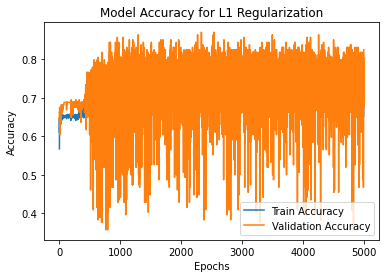

In [159]:
#Plotting train vs validation accuracy for L1 regularization
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy for L1 Regularization')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train Accuracy', 'Validation Accuracy'])
plt.show()

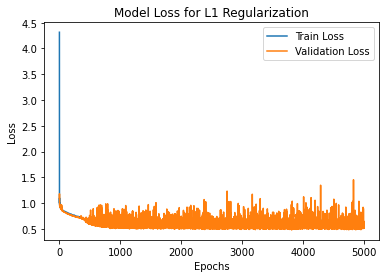

In [160]:
#Plotting train vs validation loss for L1 regularization
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss for L1 Regularization')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train Loss', 'Validation Loss'])
plt.show()

In [161]:
#Testing data accuracy for L1 regularization
scores = model.evaluate(test_features, test_diabetes_prediction)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

5/5 [==============================] - 0s 3ms/step - loss: 0.5217 - accuracy: 0.7403
accuracy: 74.03%


In [162]:
####################################################### PART 3 #################################################################
############################################### L2 and Dropout Regularization ##############################################################

#Neural network with L2
#Model creation using L2 regularization and ReLU ativation function for hidden layers and sigmoid for output layer 

model = Sequential()

#Layer 1
model.add(Dense(8, input_dim=8, activation='relu', kernel_regularizer='l2'))

#Layer 2
model.add(Dense(8, activation='relu', kernel_regularizer='l2'))

#Layer 3
model.add(Dense(8, activation='relu'))

#Output Layer
model.add(Dense(1, activation='sigmoid' ))

#Compiling the L2 model
model.compile(loss='binary_crossentropy',  optimizer='adam', metrics=['accuracy'])
print(model.summary())


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_4 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_5 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 9         
Total params: 225
Trainable params: 225
Non-trainable params: 0
_________________________________________________________________
None


In [163]:
#Training the L2 model

epochs = 5000  # num of iterations
batch_size = 32
history = model.fit(train_features,train_diabetes_prediction,validation_data=(validate_features, validate_diabetes_prediction),epochs=epochs,batch_size=batch_size)

Epoch 1/5000
15/15 [==============================] - 0s 21ms/step - loss: 1.6559 - accuracy: 0.5804 - val_loss: 1.4487 - val_accuracy: 0.6753
Epoch 2/5000
15/15 [==============================] - 0s 4ms/step - loss: 1.3228 - accuracy: 0.6326 - val_loss: 1.1704 - val_accuracy: 0.6753
Epoch 3/5000
15/15 [==============================] - 0s 4ms/step - loss: 1.0707 - accuracy: 0.6457 - val_loss: 1.0075 - val_accuracy: 0.6753
Epoch 4/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.9471 - accuracy: 0.6413 - val_loss: 0.9041 - val_accuracy: 0.6818
Epoch 5/5000
15/15 [==============================] - 0s 4ms/step - loss: 0.8649 - accuracy: 0.6435 - val_loss: 0.8382 - val_accuracy: 0.6753
Epoch 6/5000
15/15 [==============================] - 0s 4ms/step - loss: 0.8299 - accuracy: 0.6457 - val_loss: 0.8013 - val_accuracy: 0.6623
Epoch 7/5000
15/15 [==============================] - 0s 4ms/step - loss: 0.8120 - accuracy: 0.6435 - val_loss: 0.7880 - val_accuracy: 0.6883
Epoch

15/15 [==============================] - 0s 3ms/step - loss: 0.6205 - accuracy: 0.6674 - val_loss: 0.6481 - val_accuracy: 0.6818
Epoch 59/5000
15/15 [==============================] - 0s 4ms/step - loss: 0.6296 - accuracy: 0.6652 - val_loss: 0.6391 - val_accuracy: 0.6948
Epoch 60/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.6239 - accuracy: 0.6717 - val_loss: 0.6349 - val_accuracy: 0.6818
Epoch 61/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.6240 - accuracy: 0.6717 - val_loss: 0.6333 - val_accuracy: 0.6883
Epoch 62/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.6196 - accuracy: 0.6674 - val_loss: 0.6315 - val_accuracy: 0.6883
Epoch 63/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.6164 - accuracy: 0.6696 - val_loss: 0.6306 - val_accuracy: 0.6883
Epoch 64/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.6146 - accuracy: 0.6652 - val_loss: 0.6341 - val_accuracy: 0.6883
Epoch 65/5000

15/15 [==============================] - 0s 4ms/step - loss: 0.5902 - accuracy: 0.6761 - val_loss: 0.6085 - val_accuracy: 0.7403
Epoch 116/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.5896 - accuracy: 0.6783 - val_loss: 0.6113 - val_accuracy: 0.7273
Epoch 117/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.5895 - accuracy: 0.6826 - val_loss: 0.6147 - val_accuracy: 0.7273
Epoch 118/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.5865 - accuracy: 0.6739 - val_loss: 0.6103 - val_accuracy: 0.7403
Epoch 119/5000
15/15 [==============================] - 0s 4ms/step - loss: 0.5855 - accuracy: 0.6783 - val_loss: 0.6100 - val_accuracy: 0.7273
Epoch 120/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.5864 - accuracy: 0.6783 - val_loss: 0.6188 - val_accuracy: 0.7338
Epoch 121/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.5881 - accuracy: 0.6761 - val_loss: 0.6042 - val_accuracy: 0.7468
Epoch 1

Epoch 172/5000
15/15 [==============================] - 0s 4ms/step - loss: 0.5611 - accuracy: 0.7109 - val_loss: 0.6075 - val_accuracy: 0.7078
Epoch 173/5000
15/15 [==============================] - 0s 4ms/step - loss: 0.5662 - accuracy: 0.7261 - val_loss: 0.6042 - val_accuracy: 0.6948
Epoch 174/5000
15/15 [==============================] - 0s 4ms/step - loss: 0.5622 - accuracy: 0.7174 - val_loss: 0.6077 - val_accuracy: 0.7078
Epoch 175/5000
15/15 [==============================] - 0s 4ms/step - loss: 0.5592 - accuracy: 0.7348 - val_loss: 0.6092 - val_accuracy: 0.7078
Epoch 176/5000
15/15 [==============================] - 0s 4ms/step - loss: 0.5580 - accuracy: 0.7196 - val_loss: 0.6135 - val_accuracy: 0.6948
Epoch 177/5000
15/15 [==============================] - 0s 4ms/step - loss: 0.5575 - accuracy: 0.7196 - val_loss: 0.6099 - val_accuracy: 0.7208
Epoch 178/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.5691 - accuracy: 0.7174 - val_loss: 0.6231 - val_accuracy:

Epoch 229/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.5442 - accuracy: 0.7348 - val_loss: 0.6055 - val_accuracy: 0.7078
Epoch 230/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.5379 - accuracy: 0.7478 - val_loss: 0.6114 - val_accuracy: 0.7078
Epoch 231/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.5411 - accuracy: 0.7457 - val_loss: 0.6161 - val_accuracy: 0.7013
Epoch 232/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.5386 - accuracy: 0.7457 - val_loss: 0.6288 - val_accuracy: 0.6688
Epoch 233/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.5505 - accuracy: 0.7239 - val_loss: 0.5937 - val_accuracy: 0.7403
Epoch 234/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.5452 - accuracy: 0.7391 - val_loss: 0.6136 - val_accuracy: 0.6948
Epoch 235/5000
15/15 [==============================] - 0s 4ms/step - loss: 0.5402 - accuracy: 0.7413 - val_loss: 0.6087 - val_accuracy:

Epoch 286/5000
15/15 [==============================] - 0s 4ms/step - loss: 0.5352 - accuracy: 0.7304 - val_loss: 0.6390 - val_accuracy: 0.6558
Epoch 287/5000
15/15 [==============================] - 0s 5ms/step - loss: 0.5335 - accuracy: 0.7478 - val_loss: 0.5963 - val_accuracy: 0.7273
Epoch 288/5000
15/15 [==============================] - 0s 5ms/step - loss: 0.5294 - accuracy: 0.7391 - val_loss: 0.6038 - val_accuracy: 0.7078
Epoch 289/5000
15/15 [==============================] - 0s 4ms/step - loss: 0.5244 - accuracy: 0.7522 - val_loss: 0.6120 - val_accuracy: 0.6948
Epoch 290/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.5315 - accuracy: 0.7391 - val_loss: 0.6065 - val_accuracy: 0.7013
Epoch 291/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.5243 - accuracy: 0.7478 - val_loss: 0.6046 - val_accuracy: 0.7013
Epoch 292/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.5271 - accuracy: 0.7478 - val_loss: 0.6108 - val_accuracy:

Epoch 343/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.5292 - accuracy: 0.7391 - val_loss: 0.5965 - val_accuracy: 0.7013
Epoch 344/5000
15/15 [==============================] - 0s 4ms/step - loss: 0.5196 - accuracy: 0.7565 - val_loss: 0.6011 - val_accuracy: 0.7013
Epoch 345/5000
15/15 [==============================] - 0s 4ms/step - loss: 0.5160 - accuracy: 0.7500 - val_loss: 0.6034 - val_accuracy: 0.6818
Epoch 346/5000
15/15 [==============================] - 0s 4ms/step - loss: 0.5284 - accuracy: 0.7391 - val_loss: 0.5820 - val_accuracy: 0.7273
Epoch 347/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.5364 - accuracy: 0.7304 - val_loss: 0.6079 - val_accuracy: 0.6948
Epoch 348/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.5286 - accuracy: 0.7239 - val_loss: 0.6007 - val_accuracy: 0.7143
Epoch 349/5000
15/15 [==============================] - 0s 2ms/step - loss: 0.5190 - accuracy: 0.7478 - val_loss: 0.6067 - val_accuracy:

Epoch 400/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.5079 - accuracy: 0.7609 - val_loss: 0.5887 - val_accuracy: 0.7143
Epoch 401/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.5138 - accuracy: 0.7609 - val_loss: 0.5980 - val_accuracy: 0.7078
Epoch 402/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.5101 - accuracy: 0.7522 - val_loss: 0.5940 - val_accuracy: 0.6948
Epoch 403/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.5116 - accuracy: 0.7543 - val_loss: 0.5746 - val_accuracy: 0.7403
Epoch 404/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.5128 - accuracy: 0.7500 - val_loss: 0.5930 - val_accuracy: 0.7013
Epoch 405/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.5121 - accuracy: 0.7522 - val_loss: 0.6040 - val_accuracy: 0.6753
Epoch 406/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.5251 - accuracy: 0.7413 - val_loss: 0.5726 - val_accuracy:

Epoch 457/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.5028 - accuracy: 0.7717 - val_loss: 0.5925 - val_accuracy: 0.7273
Epoch 458/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.5080 - accuracy: 0.7522 - val_loss: 0.6395 - val_accuracy: 0.6818
Epoch 459/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.5285 - accuracy: 0.7565 - val_loss: 0.6094 - val_accuracy: 0.6688
Epoch 460/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.5139 - accuracy: 0.7565 - val_loss: 0.5888 - val_accuracy: 0.7208
Epoch 461/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.5100 - accuracy: 0.7413 - val_loss: 0.6187 - val_accuracy: 0.7078
Epoch 462/5000
15/15 [==============================] - 0s 4ms/step - loss: 0.5068 - accuracy: 0.7543 - val_loss: 0.5807 - val_accuracy: 0.7208
Epoch 463/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.5015 - accuracy: 0.7609 - val_loss: 0.6211 - val_accuracy:

Epoch 514/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.5006 - accuracy: 0.7717 - val_loss: 0.5904 - val_accuracy: 0.7273
Epoch 515/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.5029 - accuracy: 0.7739 - val_loss: 0.5944 - val_accuracy: 0.7208
Epoch 516/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.5053 - accuracy: 0.7652 - val_loss: 0.5845 - val_accuracy: 0.7273
Epoch 517/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.4963 - accuracy: 0.7826 - val_loss: 0.6076 - val_accuracy: 0.6948
Epoch 518/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.5022 - accuracy: 0.7696 - val_loss: 0.6046 - val_accuracy: 0.6948
Epoch 519/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.4929 - accuracy: 0.7739 - val_loss: 0.5834 - val_accuracy: 0.7338
Epoch 520/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.5111 - accuracy: 0.7565 - val_loss: 0.6050 - val_accuracy:

15/15 [==============================] - 0s 4ms/step - loss: 0.4921 - accuracy: 0.7717 - val_loss: 0.6155 - val_accuracy: 0.7078
Epoch 571/5000
15/15 [==============================] - 0s 4ms/step - loss: 0.4960 - accuracy: 0.7913 - val_loss: 0.6163 - val_accuracy: 0.6883
Epoch 572/5000
15/15 [==============================] - 0s 4ms/step - loss: 0.4896 - accuracy: 0.7913 - val_loss: 0.6136 - val_accuracy: 0.7208
Epoch 573/5000
15/15 [==============================] - 0s 4ms/step - loss: 0.4880 - accuracy: 0.7717 - val_loss: 0.6085 - val_accuracy: 0.7208
Epoch 574/5000
15/15 [==============================] - 0s 4ms/step - loss: 0.4922 - accuracy: 0.7739 - val_loss: 0.6141 - val_accuracy: 0.6948
Epoch 575/5000
15/15 [==============================] - 0s 4ms/step - loss: 0.4919 - accuracy: 0.7717 - val_loss: 0.6093 - val_accuracy: 0.7273
Epoch 576/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.4948 - accuracy: 0.7717 - val_loss: 0.5993 - val_accuracy: 0.7273
Epoch 5

Epoch 627/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.4847 - accuracy: 0.7804 - val_loss: 0.6109 - val_accuracy: 0.6883
Epoch 628/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.4880 - accuracy: 0.7804 - val_loss: 0.6138 - val_accuracy: 0.7078
Epoch 629/5000
15/15 [==============================] - 0s 4ms/step - loss: 0.4845 - accuracy: 0.7696 - val_loss: 0.6122 - val_accuracy: 0.7143
Epoch 630/5000
15/15 [==============================] - 0s 5ms/step - loss: 0.4808 - accuracy: 0.7804 - val_loss: 0.6235 - val_accuracy: 0.7078
Epoch 631/5000
15/15 [==============================] - 0s 4ms/step - loss: 0.4920 - accuracy: 0.7739 - val_loss: 0.5917 - val_accuracy: 0.7403
Epoch 632/5000
15/15 [==============================] - 0s 5ms/step - loss: 0.4915 - accuracy: 0.7739 - val_loss: 0.6079 - val_accuracy: 0.7143
Epoch 633/5000
15/15 [==============================] - 0s 4ms/step - loss: 0.4857 - accuracy: 0.7804 - val_loss: 0.6098 - val_accuracy:

Epoch 684/5000
15/15 [==============================] - 0s 4ms/step - loss: 0.4814 - accuracy: 0.7674 - val_loss: 0.6102 - val_accuracy: 0.7273
Epoch 685/5000
15/15 [==============================] - 0s 4ms/step - loss: 0.4761 - accuracy: 0.7783 - val_loss: 0.6188 - val_accuracy: 0.7143
Epoch 686/5000
15/15 [==============================] - 0s 4ms/step - loss: 0.4797 - accuracy: 0.7739 - val_loss: 0.6230 - val_accuracy: 0.7143
Epoch 687/5000
15/15 [==============================] - 0s 4ms/step - loss: 0.4722 - accuracy: 0.7783 - val_loss: 0.6368 - val_accuracy: 0.7013
Epoch 688/5000
15/15 [==============================] - 0s 4ms/step - loss: 0.4836 - accuracy: 0.7565 - val_loss: 0.6105 - val_accuracy: 0.7143
Epoch 689/5000
15/15 [==============================] - 0s 4ms/step - loss: 0.4764 - accuracy: 0.7804 - val_loss: 0.6041 - val_accuracy: 0.7143
Epoch 690/5000
15/15 [==============================] - 0s 4ms/step - loss: 0.4753 - accuracy: 0.7717 - val_loss: 0.6352 - val_accuracy:

Epoch 741/5000
15/15 [==============================] - 0s 4ms/step - loss: 0.4710 - accuracy: 0.7739 - val_loss: 0.6235 - val_accuracy: 0.7078
Epoch 742/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.4737 - accuracy: 0.7826 - val_loss: 0.6267 - val_accuracy: 0.7078
Epoch 743/5000
15/15 [==============================] - 0s 4ms/step - loss: 0.4851 - accuracy: 0.7543 - val_loss: 0.6313 - val_accuracy: 0.6818
Epoch 744/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.4785 - accuracy: 0.7848 - val_loss: 0.6573 - val_accuracy: 0.6883
Epoch 745/5000
15/15 [==============================] - 0s 4ms/step - loss: 0.4772 - accuracy: 0.7783 - val_loss: 0.6129 - val_accuracy: 0.7013
Epoch 746/5000
15/15 [==============================] - 0s 4ms/step - loss: 0.4786 - accuracy: 0.7739 - val_loss: 0.6628 - val_accuracy: 0.6818
Epoch 747/5000
15/15 [==============================] - 0s 5ms/step - loss: 0.4885 - accuracy: 0.7848 - val_loss: 0.6020 - val_accuracy:

Epoch 798/5000
15/15 [==============================] - 0s 4ms/step - loss: 0.4636 - accuracy: 0.7826 - val_loss: 0.6508 - val_accuracy: 0.7013
Epoch 799/5000
15/15 [==============================] - 0s 4ms/step - loss: 0.4670 - accuracy: 0.7978 - val_loss: 0.6330 - val_accuracy: 0.7208
Epoch 800/5000
15/15 [==============================] - 0s 4ms/step - loss: 0.4639 - accuracy: 0.7913 - val_loss: 0.6455 - val_accuracy: 0.7013
Epoch 801/5000
15/15 [==============================] - 0s 8ms/step - loss: 0.4654 - accuracy: 0.7870 - val_loss: 0.6069 - val_accuracy: 0.7273
Epoch 802/5000
15/15 [==============================] - 0s 5ms/step - loss: 0.4806 - accuracy: 0.7717 - val_loss: 0.6543 - val_accuracy: 0.6818
Epoch 803/5000
15/15 [==============================] - 0s 4ms/step - loss: 0.4752 - accuracy: 0.7761 - val_loss: 0.6294 - val_accuracy: 0.7273
Epoch 804/5000
15/15 [==============================] - 0s 5ms/step - loss: 0.4712 - accuracy: 0.7739 - val_loss: 0.6320 - val_accuracy:

15/15 [==============================] - 0s 3ms/step - loss: 0.4615 - accuracy: 0.7891 - val_loss: 0.6509 - val_accuracy: 0.7013
Epoch 855/5000
15/15 [==============================] - 0s 4ms/step - loss: 0.4615 - accuracy: 0.7957 - val_loss: 0.6406 - val_accuracy: 0.7078
Epoch 856/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.4584 - accuracy: 0.7870 - val_loss: 0.6263 - val_accuracy: 0.7208
Epoch 857/5000
15/15 [==============================] - 0s 2ms/step - loss: 0.4675 - accuracy: 0.7826 - val_loss: 0.6282 - val_accuracy: 0.7273
Epoch 858/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.4630 - accuracy: 0.7674 - val_loss: 0.6434 - val_accuracy: 0.7013
Epoch 859/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.4653 - accuracy: 0.7935 - val_loss: 0.6345 - val_accuracy: 0.7143
Epoch 860/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.4637 - accuracy: 0.7891 - val_loss: 0.6226 - val_accuracy: 0.7273
Epoch 8

Epoch 911/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.4629 - accuracy: 0.7870 - val_loss: 0.6228 - val_accuracy: 0.7078
Epoch 912/5000
15/15 [==============================] - 0s 5ms/step - loss: 0.4664 - accuracy: 0.7870 - val_loss: 0.6327 - val_accuracy: 0.7078
Epoch 913/5000
15/15 [==============================] - 0s 5ms/step - loss: 0.4609 - accuracy: 0.7783 - val_loss: 0.6385 - val_accuracy: 0.7208
Epoch 914/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.4590 - accuracy: 0.8000 - val_loss: 0.6355 - val_accuracy: 0.7338
Epoch 915/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.4551 - accuracy: 0.8022 - val_loss: 0.6604 - val_accuracy: 0.7013
Epoch 916/5000
15/15 [==============================] - 0s 5ms/step - loss: 0.4586 - accuracy: 0.7891 - val_loss: 0.6348 - val_accuracy: 0.7143
Epoch 917/5000
15/15 [==============================] - 0s 2ms/step - loss: 0.4577 - accuracy: 0.7935 - val_loss: 0.6171 - val_accuracy:

Epoch 968/5000
15/15 [==============================] - 0s 4ms/step - loss: 0.4563 - accuracy: 0.8000 - val_loss: 0.6398 - val_accuracy: 0.6948
Epoch 969/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.4637 - accuracy: 0.7913 - val_loss: 0.6470 - val_accuracy: 0.7078
Epoch 970/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.4548 - accuracy: 0.7978 - val_loss: 0.6463 - val_accuracy: 0.7208
Epoch 971/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.4581 - accuracy: 0.7957 - val_loss: 0.6567 - val_accuracy: 0.6883
Epoch 972/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.4585 - accuracy: 0.7717 - val_loss: 0.6538 - val_accuracy: 0.7143
Epoch 973/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.4554 - accuracy: 0.8043 - val_loss: 0.6458 - val_accuracy: 0.7078
Epoch 974/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.4586 - accuracy: 0.7913 - val_loss: 0.6387 - val_accuracy:

Epoch 1025/5000
15/15 [==============================] - 0s 5ms/step - loss: 0.4505 - accuracy: 0.7761 - val_loss: 0.6521 - val_accuracy: 0.7013
Epoch 1026/5000
15/15 [==============================] - 0s 4ms/step - loss: 0.4596 - accuracy: 0.7891 - val_loss: 0.6329 - val_accuracy: 0.7078
Epoch 1027/5000
15/15 [==============================] - ETA: 0s - loss: 0.3950 - accuracy: 0.84 - 0s 2ms/step - loss: 0.4606 - accuracy: 0.8000 - val_loss: 0.6533 - val_accuracy: 0.7078
Epoch 1028/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.4576 - accuracy: 0.7891 - val_loss: 0.6464 - val_accuracy: 0.7013
Epoch 1029/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.4552 - accuracy: 0.7935 - val_loss: 0.6543 - val_accuracy: 0.6818
Epoch 1030/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.4616 - accuracy: 0.7826 - val_loss: 0.6471 - val_accuracy: 0.7078
Epoch 1031/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.4739 - ac

15/15 [==============================] - 0s 3ms/step - loss: 0.4554 - accuracy: 0.7826 - val_loss: 0.6405 - val_accuracy: 0.7143
Epoch 1082/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.4540 - accuracy: 0.7761 - val_loss: 0.6217 - val_accuracy: 0.7013
Epoch 1083/5000
15/15 [==============================] - 0s 4ms/step - loss: 0.4705 - accuracy: 0.7696 - val_loss: 0.6515 - val_accuracy: 0.6948
Epoch 1084/5000
15/15 [==============================] - 0s 2ms/step - loss: 0.4717 - accuracy: 0.7565 - val_loss: 0.6361 - val_accuracy: 0.6948
Epoch 1085/5000
15/15 [==============================] - 0s 4ms/step - loss: 0.4614 - accuracy: 0.7739 - val_loss: 0.6503 - val_accuracy: 0.6883
Epoch 1086/5000
15/15 [==============================] - 0s 4ms/step - loss: 0.4629 - accuracy: 0.7804 - val_loss: 0.6518 - val_accuracy: 0.7078
Epoch 1087/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.4665 - accuracy: 0.7826 - val_loss: 0.6463 - val_accuracy: 0.6883
E

15/15 [==============================] - 0s 3ms/step - loss: 0.4533 - accuracy: 0.7913 - val_loss: 0.6264 - val_accuracy: 0.7078
Epoch 1138/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.4484 - accuracy: 0.7870 - val_loss: 0.6564 - val_accuracy: 0.7078
Epoch 1139/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.4458 - accuracy: 0.7935 - val_loss: 0.6615 - val_accuracy: 0.7013
Epoch 1140/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.4509 - accuracy: 0.7761 - val_loss: 0.6617 - val_accuracy: 0.7078
Epoch 1141/5000
15/15 [==============================] - 0s 4ms/step - loss: 0.4403 - accuracy: 0.7978 - val_loss: 0.6478 - val_accuracy: 0.7078
Epoch 1142/5000
15/15 [==============================] - 0s 4ms/step - loss: 0.4501 - accuracy: 0.7804 - val_loss: 0.6633 - val_accuracy: 0.7338
Epoch 1143/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.4464 - accuracy: 0.8000 - val_loss: 0.6546 - val_accuracy: 0.7078
E

15/15 [==============================] - 0s 4ms/step - loss: 0.4392 - accuracy: 0.8022 - val_loss: 0.6332 - val_accuracy: 0.7078
Epoch 1194/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.4432 - accuracy: 0.8000 - val_loss: 0.6209 - val_accuracy: 0.6818
Epoch 1195/5000
15/15 [==============================] - 0s 4ms/step - loss: 0.4446 - accuracy: 0.7957 - val_loss: 0.6552 - val_accuracy: 0.6883
Epoch 1196/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.4365 - accuracy: 0.8217 - val_loss: 0.6590 - val_accuracy: 0.7078
Epoch 1197/5000
15/15 [==============================] - 0s 4ms/step - loss: 0.4364 - accuracy: 0.8130 - val_loss: 0.6425 - val_accuracy: 0.7208
Epoch 1198/5000
15/15 [==============================] - 0s 4ms/step - loss: 0.4365 - accuracy: 0.8109 - val_loss: 0.6528 - val_accuracy: 0.7013
Epoch 1199/5000
15/15 [==============================] - 0s 5ms/step - loss: 0.4415 - accuracy: 0.7870 - val_loss: 0.6731 - val_accuracy: 0.7273
E

15/15 [==============================] - 0s 4ms/step - loss: 0.4583 - accuracy: 0.7848 - val_loss: 0.6537 - val_accuracy: 0.7078
Epoch 1250/5000
15/15 [==============================] - 0s 4ms/step - loss: 0.4316 - accuracy: 0.8130 - val_loss: 0.6357 - val_accuracy: 0.6883
Epoch 1251/5000
15/15 [==============================] - 0s 4ms/step - loss: 0.4385 - accuracy: 0.8043 - val_loss: 0.6474 - val_accuracy: 0.7273
Epoch 1252/5000
15/15 [==============================] - 0s 4ms/step - loss: 0.4376 - accuracy: 0.8087 - val_loss: 0.6446 - val_accuracy: 0.7143
Epoch 1253/5000
15/15 [==============================] - 0s 4ms/step - loss: 0.4341 - accuracy: 0.8239 - val_loss: 0.6348 - val_accuracy: 0.7208
Epoch 1254/5000
15/15 [==============================] - 0s 4ms/step - loss: 0.4356 - accuracy: 0.8065 - val_loss: 0.6512 - val_accuracy: 0.7013
Epoch 1255/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.4386 - accuracy: 0.8065 - val_loss: 0.6454 - val_accuracy: 0.6948
E

15/15 [==============================] - 0s 3ms/step - loss: 0.4341 - accuracy: 0.8130 - val_loss: 0.6575 - val_accuracy: 0.7208
Epoch 1306/5000
15/15 [==============================] - 0s 4ms/step - loss: 0.4314 - accuracy: 0.8109 - val_loss: 0.6396 - val_accuracy: 0.7208
Epoch 1307/5000
15/15 [==============================] - 0s 5ms/step - loss: 0.4320 - accuracy: 0.8109 - val_loss: 0.6357 - val_accuracy: 0.7273
Epoch 1308/5000
15/15 [==============================] - 0s 6ms/step - loss: 0.4305 - accuracy: 0.8152 - val_loss: 0.6679 - val_accuracy: 0.7013
Epoch 1309/5000
15/15 [==============================] - 0s 6ms/step - loss: 0.4397 - accuracy: 0.7913 - val_loss: 0.6206 - val_accuracy: 0.7273
Epoch 1310/5000
15/15 [==============================] - 0s 4ms/step - loss: 0.4362 - accuracy: 0.8065 - val_loss: 0.6404 - val_accuracy: 0.7468
Epoch 1311/5000
15/15 [==============================] - 0s 4ms/step - loss: 0.4322 - accuracy: 0.8130 - val_loss: 0.6344 - val_accuracy: 0.7208
E

15/15 [==============================] - 0s 3ms/step - loss: 0.4462 - accuracy: 0.8130 - val_loss: 0.6643 - val_accuracy: 0.7078
Epoch 1362/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.4471 - accuracy: 0.8043 - val_loss: 0.6223 - val_accuracy: 0.7273
Epoch 1363/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.4382 - accuracy: 0.8152 - val_loss: 0.6446 - val_accuracy: 0.6883
Epoch 1364/5000
15/15 [==============================] - 0s 2ms/step - loss: 0.4357 - accuracy: 0.8000 - val_loss: 0.6377 - val_accuracy: 0.7078
Epoch 1365/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.4318 - accuracy: 0.8000 - val_loss: 0.6660 - val_accuracy: 0.6948
Epoch 1366/5000
15/15 [==============================] - 0s 2ms/step - loss: 0.4466 - accuracy: 0.8109 - val_loss: 0.6571 - val_accuracy: 0.7013
Epoch 1367/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.4510 - accuracy: 0.7848 - val_loss: 0.6288 - val_accuracy: 0.7078
E

15/15 [==============================] - 0s 3ms/step - loss: 0.4387 - accuracy: 0.8022 - val_loss: 0.6447 - val_accuracy: 0.6883
Epoch 1418/5000
15/15 [==============================] - ETA: 0s - loss: 0.4121 - accuracy: 0.78 - 0s 2ms/step - loss: 0.4312 - accuracy: 0.8065 - val_loss: 0.6385 - val_accuracy: 0.7078
Epoch 1419/5000
15/15 [==============================] - 0s 2ms/step - loss: 0.4353 - accuracy: 0.7870 - val_loss: 0.6215 - val_accuracy: 0.7273
Epoch 1420/5000
15/15 [==============================] - 0s 2ms/step - loss: 0.4250 - accuracy: 0.8152 - val_loss: 0.6353 - val_accuracy: 0.7078
Epoch 1421/5000
15/15 [==============================] - 0s 4ms/step - loss: 0.4197 - accuracy: 0.8174 - val_loss: 0.6698 - val_accuracy: 0.7143
Epoch 1422/5000
15/15 [==============================] - 0s 4ms/step - loss: 0.4251 - accuracy: 0.8087 - val_loss: 0.6328 - val_accuracy: 0.7013
Epoch 1423/5000
15/15 [==============================] - 0s 4ms/step - loss: 0.4276 - accuracy: 0.8065 -

15/15 [==============================] - 0s 3ms/step - loss: 0.4397 - accuracy: 0.7978 - val_loss: 0.6290 - val_accuracy: 0.7078
Epoch 1474/5000
15/15 [==============================] - 0s 2ms/step - loss: 0.4271 - accuracy: 0.8087 - val_loss: 0.6317 - val_accuracy: 0.7338
Epoch 1475/5000
15/15 [==============================] - 0s 2ms/step - loss: 0.4199 - accuracy: 0.8109 - val_loss: 0.6358 - val_accuracy: 0.7338
Epoch 1476/5000
15/15 [==============================] - 0s 2ms/step - loss: 0.4236 - accuracy: 0.8065 - val_loss: 0.6216 - val_accuracy: 0.7468
Epoch 1477/5000
15/15 [==============================] - 0s 2ms/step - loss: 0.4178 - accuracy: 0.8109 - val_loss: 0.6561 - val_accuracy: 0.7013
Epoch 1478/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.4231 - accuracy: 0.8022 - val_loss: 0.6381 - val_accuracy: 0.7273
Epoch 1479/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.4409 - accuracy: 0.8022 - val_loss: 0.6639 - val_accuracy: 0.7078
E

15/15 [==============================] - 0s 6ms/step - loss: 0.4239 - accuracy: 0.8087 - val_loss: 0.6623 - val_accuracy: 0.6948
Epoch 1530/5000
15/15 [==============================] - 0s 5ms/step - loss: 0.4218 - accuracy: 0.8196 - val_loss: 0.5960 - val_accuracy: 0.7208
Epoch 1531/5000
15/15 [==============================] - 0s 5ms/step - loss: 0.4448 - accuracy: 0.8022 - val_loss: 0.6742 - val_accuracy: 0.7013
Epoch 1532/5000
15/15 [==============================] - 0s 6ms/step - loss: 0.4267 - accuracy: 0.8065 - val_loss: 0.6196 - val_accuracy: 0.7468
Epoch 1533/5000
15/15 [==============================] - 0s 6ms/step - loss: 0.4190 - accuracy: 0.8174 - val_loss: 0.6543 - val_accuracy: 0.7013
Epoch 1534/5000
15/15 [==============================] - 0s 6ms/step - loss: 0.4257 - accuracy: 0.8217 - val_loss: 0.6252 - val_accuracy: 0.7338
Epoch 1535/5000
15/15 [==============================] - 0s 6ms/step - loss: 0.4265 - accuracy: 0.8000 - val_loss: 0.6194 - val_accuracy: 0.7078
E

15/15 [==============================] - 0s 4ms/step - loss: 0.4176 - accuracy: 0.8174 - val_loss: 0.6161 - val_accuracy: 0.6883
Epoch 1586/5000
15/15 [==============================] - 0s 4ms/step - loss: 0.4137 - accuracy: 0.8174 - val_loss: 0.6191 - val_accuracy: 0.7273
Epoch 1587/5000
15/15 [==============================] - 0s 4ms/step - loss: 0.4152 - accuracy: 0.8130 - val_loss: 0.6123 - val_accuracy: 0.7143
Epoch 1588/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.4128 - accuracy: 0.8152 - val_loss: 0.6538 - val_accuracy: 0.6818
Epoch 1589/5000
15/15 [==============================] - 0s 4ms/step - loss: 0.4222 - accuracy: 0.8065 - val_loss: 0.6364 - val_accuracy: 0.7143
Epoch 1590/5000
15/15 [==============================] - 0s 4ms/step - loss: 0.4183 - accuracy: 0.8065 - val_loss: 0.6199 - val_accuracy: 0.7338
Epoch 1591/5000
15/15 [==============================] - 0s 4ms/step - loss: 0.4215 - accuracy: 0.8130 - val_loss: 0.6420 - val_accuracy: 0.7143
E

15/15 [==============================] - 0s 3ms/step - loss: 0.4265 - accuracy: 0.8022 - val_loss: 0.6175 - val_accuracy: 0.6948
Epoch 1642/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.4192 - accuracy: 0.8130 - val_loss: 0.6986 - val_accuracy: 0.6948
Epoch 1643/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.4274 - accuracy: 0.8152 - val_loss: 0.6123 - val_accuracy: 0.7532
Epoch 1644/5000
15/15 [==============================] - 0s 4ms/step - loss: 0.4184 - accuracy: 0.8043 - val_loss: 0.6151 - val_accuracy: 0.7338
Epoch 1645/5000
15/15 [==============================] - 0s 4ms/step - loss: 0.4337 - accuracy: 0.7978 - val_loss: 0.6432 - val_accuracy: 0.7273
Epoch 1646/5000
15/15 [==============================] - 0s 4ms/step - loss: 0.4555 - accuracy: 0.8022 - val_loss: 0.6491 - val_accuracy: 0.6948
Epoch 1647/5000
15/15 [==============================] - 0s 4ms/step - loss: 0.4284 - accuracy: 0.8000 - val_loss: 0.5957 - val_accuracy: 0.7143
E

15/15 [==============================] - 0s 4ms/step - loss: 0.4197 - accuracy: 0.8087 - val_loss: 0.6159 - val_accuracy: 0.7338
Epoch 1698/5000
15/15 [==============================] - 0s 4ms/step - loss: 0.4082 - accuracy: 0.8217 - val_loss: 0.6094 - val_accuracy: 0.7273
Epoch 1699/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.4127 - accuracy: 0.8196 - val_loss: 0.6624 - val_accuracy: 0.6883
Epoch 1700/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.4141 - accuracy: 0.8217 - val_loss: 0.6035 - val_accuracy: 0.7208
Epoch 1701/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.4105 - accuracy: 0.8217 - val_loss: 0.6252 - val_accuracy: 0.7273
Epoch 1702/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.4162 - accuracy: 0.8130 - val_loss: 0.6361 - val_accuracy: 0.7013
Epoch 1703/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.4150 - accuracy: 0.8196 - val_loss: 0.6034 - val_accuracy: 0.7208
E

15/15 [==============================] - 0s 5ms/step - loss: 0.4075 - accuracy: 0.8109 - val_loss: 0.6128 - val_accuracy: 0.7143
Epoch 1754/5000
15/15 [==============================] - 0s 5ms/step - loss: 0.4135 - accuracy: 0.8217 - val_loss: 0.6021 - val_accuracy: 0.7338
Epoch 1755/5000
15/15 [==============================] - 0s 4ms/step - loss: 0.4141 - accuracy: 0.8217 - val_loss: 0.6171 - val_accuracy: 0.7013
Epoch 1756/5000
15/15 [==============================] - 0s 4ms/step - loss: 0.4121 - accuracy: 0.8261 - val_loss: 0.6236 - val_accuracy: 0.7208
Epoch 1757/5000
15/15 [==============================] - 0s 4ms/step - loss: 0.4083 - accuracy: 0.8217 - val_loss: 0.5939 - val_accuracy: 0.7273
Epoch 1758/5000
15/15 [==============================] - 0s 4ms/step - loss: 0.4171 - accuracy: 0.8065 - val_loss: 0.5981 - val_accuracy: 0.7532
Epoch 1759/5000
15/15 [==============================] - 0s 4ms/step - loss: 0.4095 - accuracy: 0.8174 - val_loss: 0.6365 - val_accuracy: 0.7208
E

15/15 [==============================] - 0s 4ms/step - loss: 0.4369 - accuracy: 0.8043 - val_loss: 0.6134 - val_accuracy: 0.7143
Epoch 1810/5000
15/15 [==============================] - 0s 4ms/step - loss: 0.4274 - accuracy: 0.8109 - val_loss: 0.5880 - val_accuracy: 0.7143
Epoch 1811/5000
15/15 [==============================] - 0s 4ms/step - loss: 0.4083 - accuracy: 0.8174 - val_loss: 0.6368 - val_accuracy: 0.6883
Epoch 1812/5000
15/15 [==============================] - 0s 5ms/step - loss: 0.4124 - accuracy: 0.8196 - val_loss: 0.5886 - val_accuracy: 0.7078
Epoch 1813/5000
15/15 [==============================] - 0s 5ms/step - loss: 0.4028 - accuracy: 0.8304 - val_loss: 0.6067 - val_accuracy: 0.6948
Epoch 1814/5000
15/15 [==============================] - 0s 5ms/step - loss: 0.4122 - accuracy: 0.8109 - val_loss: 0.6141 - val_accuracy: 0.7143
Epoch 1815/5000
15/15 [==============================] - 0s 5ms/step - loss: 0.4137 - accuracy: 0.8130 - val_loss: 0.6188 - val_accuracy: 0.7208
E

15/15 [==============================] - 0s 4ms/step - loss: 0.4124 - accuracy: 0.8239 - val_loss: 0.6234 - val_accuracy: 0.7143
Epoch 1866/5000
15/15 [==============================] - 0s 5ms/step - loss: 0.3985 - accuracy: 0.8348 - val_loss: 0.6126 - val_accuracy: 0.7403
Epoch 1867/5000
15/15 [==============================] - 0s 4ms/step - loss: 0.4035 - accuracy: 0.8196 - val_loss: 0.6547 - val_accuracy: 0.7143
Epoch 1868/5000
15/15 [==============================] - 0s 4ms/step - loss: 0.4035 - accuracy: 0.8261 - val_loss: 0.6341 - val_accuracy: 0.6948
Epoch 1869/5000
15/15 [==============================] - 0s 5ms/step - loss: 0.4074 - accuracy: 0.8196 - val_loss: 0.6479 - val_accuracy: 0.7208
Epoch 1870/5000
15/15 [==============================] - 0s 5ms/step - loss: 0.4025 - accuracy: 0.8283 - val_loss: 0.6020 - val_accuracy: 0.7532
Epoch 1871/5000
15/15 [==============================] - 0s 4ms/step - loss: 0.4029 - accuracy: 0.8326 - val_loss: 0.6138 - val_accuracy: 0.7013
E

15/15 [==============================] - 0s 5ms/step - loss: 0.4190 - accuracy: 0.8087 - val_loss: 0.6345 - val_accuracy: 0.7208
Epoch 1922/5000
15/15 [==============================] - 0s 5ms/step - loss: 0.4005 - accuracy: 0.8196 - val_loss: 0.5982 - val_accuracy: 0.7403
Epoch 1923/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.3945 - accuracy: 0.8261 - val_loss: 0.6025 - val_accuracy: 0.7208
Epoch 1924/5000
15/15 [==============================] - 0s 4ms/step - loss: 0.3984 - accuracy: 0.8283 - val_loss: 0.6387 - val_accuracy: 0.7143
Epoch 1925/5000
15/15 [==============================] - 0s 4ms/step - loss: 0.4010 - accuracy: 0.8283 - val_loss: 0.6059 - val_accuracy: 0.7468
Epoch 1926/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.3957 - accuracy: 0.8174 - val_loss: 0.6054 - val_accuracy: 0.7208
Epoch 1927/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.3973 - accuracy: 0.8326 - val_loss: 0.6306 - val_accuracy: 0.7208
E

15/15 [==============================] - 0s 5ms/step - loss: 0.3987 - accuracy: 0.8283 - val_loss: 0.6063 - val_accuracy: 0.7273
Epoch 1978/5000
15/15 [==============================] - 0s 5ms/step - loss: 0.3946 - accuracy: 0.8174 - val_loss: 0.6412 - val_accuracy: 0.7143
Epoch 1979/5000
15/15 [==============================] - 0s 6ms/step - loss: 0.3931 - accuracy: 0.8348 - val_loss: 0.5994 - val_accuracy: 0.7403
Epoch 1980/5000
15/15 [==============================] - 0s 6ms/step - loss: 0.3900 - accuracy: 0.8283 - val_loss: 0.6157 - val_accuracy: 0.7013
Epoch 1981/5000
15/15 [==============================] - 0s 4ms/step - loss: 0.4004 - accuracy: 0.8152 - val_loss: 0.6311 - val_accuracy: 0.7338
Epoch 1982/5000
15/15 [==============================] - 0s 6ms/step - loss: 0.3998 - accuracy: 0.8174 - val_loss: 0.6012 - val_accuracy: 0.7403
Epoch 1983/5000
15/15 [==============================] - 0s 5ms/step - loss: 0.3969 - accuracy: 0.8435 - val_loss: 0.6536 - val_accuracy: 0.6883
E

15/15 [==============================] - 0s 3ms/step - loss: 0.3965 - accuracy: 0.8217 - val_loss: 0.5871 - val_accuracy: 0.7468
Epoch 2034/5000
15/15 [==============================] - 0s 4ms/step - loss: 0.3936 - accuracy: 0.8196 - val_loss: 0.6320 - val_accuracy: 0.7078
Epoch 2035/5000
15/15 [==============================] - 0s 4ms/step - loss: 0.4013 - accuracy: 0.8261 - val_loss: 0.6277 - val_accuracy: 0.7273
Epoch 2036/5000
15/15 [==============================] - 0s 5ms/step - loss: 0.4019 - accuracy: 0.8239 - val_loss: 0.6149 - val_accuracy: 0.7078
Epoch 2037/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.4050 - accuracy: 0.8239 - val_loss: 0.6580 - val_accuracy: 0.7143
Epoch 2038/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.4010 - accuracy: 0.8196 - val_loss: 0.5979 - val_accuracy: 0.7468
Epoch 2039/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.3957 - accuracy: 0.8304 - val_loss: 0.6281 - val_accuracy: 0.7338
E

15/15 [==============================] - 0s 3ms/step - loss: 0.4699 - accuracy: 0.7804 - val_loss: 0.6119 - val_accuracy: 0.7078
Epoch 2090/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.4427 - accuracy: 0.7913 - val_loss: 0.5606 - val_accuracy: 0.7727
Epoch 2091/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.4258 - accuracy: 0.7978 - val_loss: 0.5595 - val_accuracy: 0.7273
Epoch 2092/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.4163 - accuracy: 0.8130 - val_loss: 0.5665 - val_accuracy: 0.7597
Epoch 2093/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.4133 - accuracy: 0.8087 - val_loss: 0.6053 - val_accuracy: 0.7338
Epoch 2094/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.4112 - accuracy: 0.8087 - val_loss: 0.5830 - val_accuracy: 0.7403
Epoch 2095/5000
15/15 [==============================] - 0s 4ms/step - loss: 0.4084 - accuracy: 0.8152 - val_loss: 0.5423 - val_accuracy: 0.7597
E

15/15 [==============================] - 0s 3ms/step - loss: 0.3987 - accuracy: 0.8109 - val_loss: 0.6099 - val_accuracy: 0.7338
Epoch 2146/5000
15/15 [==============================] - 0s 2ms/step - loss: 0.3971 - accuracy: 0.8087 - val_loss: 0.5915 - val_accuracy: 0.7403
Epoch 2147/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.3888 - accuracy: 0.8391 - val_loss: 0.6090 - val_accuracy: 0.7468
Epoch 2148/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.3995 - accuracy: 0.8130 - val_loss: 0.6285 - val_accuracy: 0.7078
Epoch 2149/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.4230 - accuracy: 0.8000 - val_loss: 0.5648 - val_accuracy: 0.7532
Epoch 2150/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.4158 - accuracy: 0.8065 - val_loss: 0.6544 - val_accuracy: 0.6883
Epoch 2151/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.3938 - accuracy: 0.8152 - val_loss: 0.5709 - val_accuracy: 0.7338
E

15/15 [==============================] - 0s 3ms/step - loss: 0.3989 - accuracy: 0.8152 - val_loss: 0.6224 - val_accuracy: 0.7468
Epoch 2202/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.3894 - accuracy: 0.8304 - val_loss: 0.6195 - val_accuracy: 0.7468
Epoch 2203/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.3897 - accuracy: 0.8239 - val_loss: 0.6152 - val_accuracy: 0.7403
Epoch 2204/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.3898 - accuracy: 0.8413 - val_loss: 0.6777 - val_accuracy: 0.7273
Epoch 2205/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.4026 - accuracy: 0.8109 - val_loss: 0.5779 - val_accuracy: 0.7403
Epoch 2206/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.4025 - accuracy: 0.8261 - val_loss: 0.6217 - val_accuracy: 0.7208
Epoch 2207/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.4045 - accuracy: 0.8152 - val_loss: 0.6373 - val_accuracy: 0.7338
E

15/15 [==============================] - 0s 4ms/step - loss: 0.3983 - accuracy: 0.8239 - val_loss: 0.6479 - val_accuracy: 0.7013
Epoch 2258/5000
15/15 [==============================] - ETA: 0s - loss: 0.3157 - accuracy: 0.87 - 0s 3ms/step - loss: 0.3940 - accuracy: 0.8196 - val_loss: 0.6068 - val_accuracy: 0.7143
Epoch 2259/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.3960 - accuracy: 0.8391 - val_loss: 0.6177 - val_accuracy: 0.7208
Epoch 2260/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.3972 - accuracy: 0.8196 - val_loss: 0.6395 - val_accuracy: 0.7208
Epoch 2261/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.3935 - accuracy: 0.8087 - val_loss: 0.5967 - val_accuracy: 0.7208
Epoch 2262/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.4174 - accuracy: 0.8087 - val_loss: 0.6453 - val_accuracy: 0.7403
Epoch 2263/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.4098 - accuracy: 0.8174 -

15/15 [==============================] - 0s 3ms/step - loss: 0.3838 - accuracy: 0.8174 - val_loss: 0.5812 - val_accuracy: 0.7403
Epoch 2314/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.3843 - accuracy: 0.8348 - val_loss: 0.6344 - val_accuracy: 0.7273
Epoch 2315/5000
15/15 [==============================] - 0s 5ms/step - loss: 0.3878 - accuracy: 0.8283 - val_loss: 0.6242 - val_accuracy: 0.7208
Epoch 2316/5000
15/15 [==============================] - 0s 4ms/step - loss: 0.3818 - accuracy: 0.8196 - val_loss: 0.6072 - val_accuracy: 0.7532
Epoch 2317/5000
15/15 [==============================] - 0s 4ms/step - loss: 0.3838 - accuracy: 0.8239 - val_loss: 0.5990 - val_accuracy: 0.7403
Epoch 2318/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.4012 - accuracy: 0.8370 - val_loss: 0.6476 - val_accuracy: 0.7273
Epoch 2319/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.3908 - accuracy: 0.8174 - val_loss: 0.6053 - val_accuracy: 0.7208
E

15/15 [==============================] - 0s 3ms/step - loss: 0.3944 - accuracy: 0.8413 - val_loss: 0.5914 - val_accuracy: 0.7597
Epoch 2370/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.4182 - accuracy: 0.8065 - val_loss: 0.5728 - val_accuracy: 0.7403
Epoch 2371/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.3996 - accuracy: 0.8043 - val_loss: 0.5981 - val_accuracy: 0.7403
Epoch 2372/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.3904 - accuracy: 0.8261 - val_loss: 0.6150 - val_accuracy: 0.7338
Epoch 2373/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.3905 - accuracy: 0.8174 - val_loss: 0.6036 - val_accuracy: 0.7143
Epoch 2374/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.3955 - accuracy: 0.8261 - val_loss: 0.6269 - val_accuracy: 0.7403
Epoch 2375/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.3804 - accuracy: 0.8326 - val_loss: 0.6026 - val_accuracy: 0.7532
E

15/15 [==============================] - 0s 3ms/step - loss: 0.4309 - accuracy: 0.7891 - val_loss: 0.5635 - val_accuracy: 0.7597
Epoch 2426/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.4162 - accuracy: 0.8000 - val_loss: 0.5656 - val_accuracy: 0.7597
Epoch 2427/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.4069 - accuracy: 0.8087 - val_loss: 0.5794 - val_accuracy: 0.7468
Epoch 2428/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.4078 - accuracy: 0.8109 - val_loss: 0.5596 - val_accuracy: 0.7273
Epoch 2429/5000
15/15 [==============================] - 0s 2ms/step - loss: 0.4088 - accuracy: 0.8043 - val_loss: 0.5923 - val_accuracy: 0.7403
Epoch 2430/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.4047 - accuracy: 0.8065 - val_loss: 0.5913 - val_accuracy: 0.7662
Epoch 2431/5000
15/15 [==============================] - 0s 2ms/step - loss: 0.4133 - accuracy: 0.8065 - val_loss: 0.5652 - val_accuracy: 0.7338
E

15/15 [==============================] - 0s 3ms/step - loss: 0.3771 - accuracy: 0.8370 - val_loss: 0.6225 - val_accuracy: 0.7597
Epoch 2482/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.3819 - accuracy: 0.8283 - val_loss: 0.6479 - val_accuracy: 0.7143
Epoch 2483/5000
15/15 [==============================] - 0s 2ms/step - loss: 0.3827 - accuracy: 0.8457 - val_loss: 0.5994 - val_accuracy: 0.7403
Epoch 2484/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.3895 - accuracy: 0.8087 - val_loss: 0.6056 - val_accuracy: 0.7338
Epoch 2485/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.3768 - accuracy: 0.8348 - val_loss: 0.6295 - val_accuracy: 0.7468
Epoch 2486/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.3789 - accuracy: 0.8435 - val_loss: 0.6362 - val_accuracy: 0.7338
Epoch 2487/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.3869 - accuracy: 0.8130 - val_loss: 0.5949 - val_accuracy: 0.7143
E

15/15 [==============================] - 0s 3ms/step - loss: 0.3822 - accuracy: 0.8435 - val_loss: 0.6236 - val_accuracy: 0.7468
Epoch 2538/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.3870 - accuracy: 0.8196 - val_loss: 0.6337 - val_accuracy: 0.7532
Epoch 2539/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.3765 - accuracy: 0.8283 - val_loss: 0.6152 - val_accuracy: 0.7338
Epoch 2540/5000
15/15 [==============================] - 0s 6ms/step - loss: 0.3738 - accuracy: 0.8326 - val_loss: 0.6325 - val_accuracy: 0.7273
Epoch 2541/5000
15/15 [==============================] - 0s 4ms/step - loss: 0.3882 - accuracy: 0.8348 - val_loss: 0.6159 - val_accuracy: 0.7338
Epoch 2542/5000
15/15 [==============================] - 0s 4ms/step - loss: 0.3734 - accuracy: 0.8478 - val_loss: 0.6313 - val_accuracy: 0.7403
Epoch 2543/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.3801 - accuracy: 0.8283 - val_loss: 0.6348 - val_accuracy: 0.7403
E

15/15 [==============================] - 0s 4ms/step - loss: 0.3824 - accuracy: 0.8304 - val_loss: 0.7041 - val_accuracy: 0.7208
Epoch 2594/5000
15/15 [==============================] - 0s 5ms/step - loss: 0.3807 - accuracy: 0.8283 - val_loss: 0.6590 - val_accuracy: 0.7273
Epoch 2595/5000
15/15 [==============================] - 0s 5ms/step - loss: 0.3848 - accuracy: 0.8326 - val_loss: 0.6349 - val_accuracy: 0.7403
Epoch 2596/5000
15/15 [==============================] - 0s 5ms/step - loss: 0.3826 - accuracy: 0.8326 - val_loss: 0.7046 - val_accuracy: 0.7078
Epoch 2597/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.3911 - accuracy: 0.8065 - val_loss: 0.6067 - val_accuracy: 0.7273
Epoch 2598/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.4019 - accuracy: 0.8130 - val_loss: 0.7183 - val_accuracy: 0.7143
Epoch 2599/5000
15/15 [==============================] - 0s 4ms/step - loss: 0.3940 - accuracy: 0.8261 - val_loss: 0.6062 - val_accuracy: 0.7338
E

15/15 [==============================] - 0s 3ms/step - loss: 0.3631 - accuracy: 0.8457 - val_loss: 0.6384 - val_accuracy: 0.7338
Epoch 2650/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.3718 - accuracy: 0.8391 - val_loss: 0.6294 - val_accuracy: 0.7208
Epoch 2651/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.3726 - accuracy: 0.8457 - val_loss: 0.6432 - val_accuracy: 0.7273
Epoch 2652/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.3826 - accuracy: 0.8261 - val_loss: 0.6822 - val_accuracy: 0.7208
Epoch 2653/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.3673 - accuracy: 0.8370 - val_loss: 0.6386 - val_accuracy: 0.7273
Epoch 2654/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.3717 - accuracy: 0.8326 - val_loss: 0.6268 - val_accuracy: 0.7468
Epoch 2655/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.3716 - accuracy: 0.8326 - val_loss: 0.6364 - val_accuracy: 0.7403
E

15/15 [==============================] - 0s 4ms/step - loss: 0.3640 - accuracy: 0.8435 - val_loss: 0.6547 - val_accuracy: 0.7338
Epoch 2706/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.3643 - accuracy: 0.8478 - val_loss: 0.6364 - val_accuracy: 0.7468
Epoch 2707/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.3633 - accuracy: 0.8500 - val_loss: 0.6304 - val_accuracy: 0.7597
Epoch 2708/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.3587 - accuracy: 0.8457 - val_loss: 0.6349 - val_accuracy: 0.7532
Epoch 2709/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.3650 - accuracy: 0.8413 - val_loss: 0.6143 - val_accuracy: 0.7273
Epoch 2710/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.3774 - accuracy: 0.8283 - val_loss: 0.6257 - val_accuracy: 0.7597
Epoch 2711/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.3743 - accuracy: 0.8370 - val_loss: 0.6297 - val_accuracy: 0.7273
E

15/15 [==============================] - 0s 3ms/step - loss: 0.3788 - accuracy: 0.8391 - val_loss: 0.6310 - val_accuracy: 0.7143
Epoch 2762/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.3747 - accuracy: 0.8326 - val_loss: 0.6240 - val_accuracy: 0.7403
Epoch 2763/5000
15/15 [==============================] - 0s 4ms/step - loss: 0.3657 - accuracy: 0.8348 - val_loss: 0.6456 - val_accuracy: 0.7273
Epoch 2764/5000
15/15 [==============================] - 0s 4ms/step - loss: 0.3715 - accuracy: 0.8435 - val_loss: 0.6651 - val_accuracy: 0.7208
Epoch 2765/5000
15/15 [==============================] - 0s 4ms/step - loss: 0.3741 - accuracy: 0.8283 - val_loss: 0.6188 - val_accuracy: 0.7338
Epoch 2766/5000
15/15 [==============================] - 0s 4ms/step - loss: 0.3773 - accuracy: 0.8370 - val_loss: 0.6490 - val_accuracy: 0.7338
Epoch 2767/5000
15/15 [==============================] - 0s 4ms/step - loss: 0.3723 - accuracy: 0.8522 - val_loss: 0.7146 - val_accuracy: 0.7208
E

15/15 [==============================] - 0s 3ms/step - loss: 0.3649 - accuracy: 0.8283 - val_loss: 0.6399 - val_accuracy: 0.7273
Epoch 2818/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.3692 - accuracy: 0.8457 - val_loss: 0.6783 - val_accuracy: 0.7208
Epoch 2819/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.3601 - accuracy: 0.8500 - val_loss: 0.6535 - val_accuracy: 0.7273
Epoch 2820/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.3763 - accuracy: 0.8217 - val_loss: 0.6222 - val_accuracy: 0.7403
Epoch 2821/5000
15/15 [==============================] - 0s 4ms/step - loss: 0.4301 - accuracy: 0.7935 - val_loss: 0.7066 - val_accuracy: 0.7338
Epoch 2822/5000
15/15 [==============================] - 0s 4ms/step - loss: 0.3975 - accuracy: 0.8152 - val_loss: 0.6311 - val_accuracy: 0.7468
Epoch 2823/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.3940 - accuracy: 0.8196 - val_loss: 0.7173 - val_accuracy: 0.7013
E

15/15 [==============================] - 0s 4ms/step - loss: 0.3698 - accuracy: 0.8304 - val_loss: 0.6733 - val_accuracy: 0.7273
Epoch 2874/5000
15/15 [==============================] - 0s 4ms/step - loss: 0.3801 - accuracy: 0.8326 - val_loss: 0.6627 - val_accuracy: 0.7273
Epoch 2875/5000
15/15 [==============================] - 0s 4ms/step - loss: 0.3679 - accuracy: 0.8413 - val_loss: 0.6248 - val_accuracy: 0.7338
Epoch 2876/5000
15/15 [==============================] - 0s 4ms/step - loss: 0.3746 - accuracy: 0.8326 - val_loss: 0.6231 - val_accuracy: 0.7403
Epoch 2877/5000
15/15 [==============================] - 0s 4ms/step - loss: 0.3701 - accuracy: 0.8391 - val_loss: 0.7533 - val_accuracy: 0.7013
Epoch 2878/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.4106 - accuracy: 0.8065 - val_loss: 0.6538 - val_accuracy: 0.7143
Epoch 2879/5000
15/15 [==============================] - 0s 4ms/step - loss: 0.3698 - accuracy: 0.8413 - val_loss: 0.6186 - val_accuracy: 0.7468
E

15/15 [==============================] - 0s 3ms/step - loss: 0.3630 - accuracy: 0.8500 - val_loss: 0.6773 - val_accuracy: 0.7403
Epoch 2930/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.3682 - accuracy: 0.8522 - val_loss: 0.6492 - val_accuracy: 0.7208
Epoch 2931/5000
15/15 [==============================] - 0s 5ms/step - loss: 0.3735 - accuracy: 0.8326 - val_loss: 0.6650 - val_accuracy: 0.7403
Epoch 2932/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.3663 - accuracy: 0.8478 - val_loss: 0.6533 - val_accuracy: 0.7143
Epoch 2933/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.3662 - accuracy: 0.8370 - val_loss: 0.6497 - val_accuracy: 0.7338
Epoch 2934/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.3584 - accuracy: 0.8457 - val_loss: 0.6183 - val_accuracy: 0.7468
Epoch 2935/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.3592 - accuracy: 0.8500 - val_loss: 0.6313 - val_accuracy: 0.7403
E

15/15 [==============================] - 0s 3ms/step - loss: 0.3662 - accuracy: 0.8413 - val_loss: 0.6245 - val_accuracy: 0.7403
Epoch 2986/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.3702 - accuracy: 0.8522 - val_loss: 0.6554 - val_accuracy: 0.7143
Epoch 2987/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.3638 - accuracy: 0.8370 - val_loss: 0.6097 - val_accuracy: 0.7403
Epoch 2988/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.3874 - accuracy: 0.8109 - val_loss: 0.6687 - val_accuracy: 0.7208
Epoch 2989/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.4262 - accuracy: 0.8065 - val_loss: 0.6482 - val_accuracy: 0.7403
Epoch 2990/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.4090 - accuracy: 0.8130 - val_loss: 0.6673 - val_accuracy: 0.7143
Epoch 2991/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.4204 - accuracy: 0.8130 - val_loss: 0.6398 - val_accuracy: 0.7143
E

15/15 [==============================] - 0s 3ms/step - loss: 0.3737 - accuracy: 0.8283 - val_loss: 0.6362 - val_accuracy: 0.7143
Epoch 3042/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.3797 - accuracy: 0.8326 - val_loss: 0.6447 - val_accuracy: 0.7143
Epoch 3043/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.3812 - accuracy: 0.8348 - val_loss: 0.6280 - val_accuracy: 0.7208
Epoch 3044/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.3663 - accuracy: 0.8391 - val_loss: 0.6815 - val_accuracy: 0.7208
Epoch 3045/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.3805 - accuracy: 0.8391 - val_loss: 0.6637 - val_accuracy: 0.7208
Epoch 3046/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.3645 - accuracy: 0.8522 - val_loss: 0.6474 - val_accuracy: 0.7403
Epoch 3047/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.3664 - accuracy: 0.8435 - val_loss: 0.6554 - val_accuracy: 0.7143
E

15/15 [==============================] - 0s 4ms/step - loss: 0.3553 - accuracy: 0.8587 - val_loss: 0.6375 - val_accuracy: 0.7338
Epoch 3098/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.3799 - accuracy: 0.8326 - val_loss: 0.6345 - val_accuracy: 0.7273
Epoch 3099/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.3833 - accuracy: 0.8196 - val_loss: 0.7466 - val_accuracy: 0.7208
Epoch 3100/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.3981 - accuracy: 0.8304 - val_loss: 0.6912 - val_accuracy: 0.7208
Epoch 3101/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.3848 - accuracy: 0.8109 - val_loss: 0.6531 - val_accuracy: 0.7273
Epoch 3102/5000
15/15 [==============================] - 0s 4ms/step - loss: 0.3752 - accuracy: 0.8413 - val_loss: 0.5983 - val_accuracy: 0.7403
Epoch 3103/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.3762 - accuracy: 0.8239 - val_loss: 0.6821 - val_accuracy: 0.7338
E

15/15 [==============================] - 0s 4ms/step - loss: 0.3557 - accuracy: 0.8565 - val_loss: 0.6221 - val_accuracy: 0.7597
Epoch 3154/5000
15/15 [==============================] - 0s 4ms/step - loss: 0.3757 - accuracy: 0.8196 - val_loss: 0.6488 - val_accuracy: 0.7403
Epoch 3155/5000
15/15 [==============================] - 0s 4ms/step - loss: 0.3707 - accuracy: 0.8478 - val_loss: 0.6315 - val_accuracy: 0.7208
Epoch 3156/5000
15/15 [==============================] - 0s 4ms/step - loss: 0.3671 - accuracy: 0.8435 - val_loss: 0.6594 - val_accuracy: 0.7338
Epoch 3157/5000
15/15 [==============================] - 0s 4ms/step - loss: 0.3664 - accuracy: 0.8326 - val_loss: 0.6607 - val_accuracy: 0.7078
Epoch 3158/5000
15/15 [==============================] - 0s 4ms/step - loss: 0.3675 - accuracy: 0.8370 - val_loss: 0.6212 - val_accuracy: 0.7532
Epoch 3159/5000
15/15 [==============================] - 0s 4ms/step - loss: 0.3735 - accuracy: 0.8326 - val_loss: 0.6492 - val_accuracy: 0.7143
E

15/15 [==============================] - 0s 4ms/step - loss: 0.3918 - accuracy: 0.8326 - val_loss: 0.5982 - val_accuracy: 0.7208
Epoch 3210/5000
15/15 [==============================] - 0s 5ms/step - loss: 0.4079 - accuracy: 0.7978 - val_loss: 0.6466 - val_accuracy: 0.7273
Epoch 3211/5000
15/15 [==============================] - 0s 4ms/step - loss: 0.3901 - accuracy: 0.8152 - val_loss: 0.6219 - val_accuracy: 0.7403
Epoch 3212/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.3896 - accuracy: 0.8304 - val_loss: 0.6771 - val_accuracy: 0.6883
Epoch 3213/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.3689 - accuracy: 0.8283 - val_loss: 0.6423 - val_accuracy: 0.7338
Epoch 3214/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.3643 - accuracy: 0.8326 - val_loss: 0.6976 - val_accuracy: 0.7143
Epoch 3215/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.4163 - accuracy: 0.8109 - val_loss: 0.6038 - val_accuracy: 0.7468
E

15/15 [==============================] - 0s 3ms/step - loss: 0.3770 - accuracy: 0.8391 - val_loss: 0.6258 - val_accuracy: 0.7338
Epoch 3266/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.3681 - accuracy: 0.8283 - val_loss: 0.6346 - val_accuracy: 0.7403
Epoch 3267/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.3607 - accuracy: 0.8391 - val_loss: 0.6556 - val_accuracy: 0.7468
Epoch 3268/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.3735 - accuracy: 0.8500 - val_loss: 0.6489 - val_accuracy: 0.7468
Epoch 3269/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.3855 - accuracy: 0.8413 - val_loss: 0.6234 - val_accuracy: 0.7338
Epoch 3270/5000
15/15 [==============================] - 0s 4ms/step - loss: 0.3586 - accuracy: 0.8500 - val_loss: 0.6802 - val_accuracy: 0.7532
Epoch 3271/5000
15/15 [==============================] - 0s 4ms/step - loss: 0.3897 - accuracy: 0.8348 - val_loss: 0.6291 - val_accuracy: 0.7208
E

15/15 [==============================] - 0s 3ms/step - loss: 0.3662 - accuracy: 0.8413 - val_loss: 0.6643 - val_accuracy: 0.7273
Epoch 3322/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.3694 - accuracy: 0.8261 - val_loss: 0.6488 - val_accuracy: 0.7143
Epoch 3323/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.3594 - accuracy: 0.8478 - val_loss: 0.6594 - val_accuracy: 0.7403
Epoch 3324/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.3538 - accuracy: 0.8413 - val_loss: 0.6498 - val_accuracy: 0.7468
Epoch 3325/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.3669 - accuracy: 0.8413 - val_loss: 0.6415 - val_accuracy: 0.7338
Epoch 3326/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.3539 - accuracy: 0.8478 - val_loss: 0.6318 - val_accuracy: 0.7532
Epoch 3327/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.3648 - accuracy: 0.8391 - val_loss: 0.6186 - val_accuracy: 0.7403
E

15/15 [==============================] - 0s 3ms/step - loss: 0.3569 - accuracy: 0.8478 - val_loss: 0.6475 - val_accuracy: 0.7273
Epoch 3378/5000
15/15 [==============================] - 0s 4ms/step - loss: 0.3588 - accuracy: 0.8478 - val_loss: 0.6645 - val_accuracy: 0.7727
Epoch 3379/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.3506 - accuracy: 0.8500 - val_loss: 0.6437 - val_accuracy: 0.7597
Epoch 3380/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.3470 - accuracy: 0.8543 - val_loss: 0.6643 - val_accuracy: 0.7468
Epoch 3381/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.3559 - accuracy: 0.8391 - val_loss: 0.6212 - val_accuracy: 0.7403
Epoch 3382/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.3515 - accuracy: 0.8522 - val_loss: 0.6472 - val_accuracy: 0.7468
Epoch 3383/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.3543 - accuracy: 0.8478 - val_loss: 0.6473 - val_accuracy: 0.7208
E

15/15 [==============================] - 0s 5ms/step - loss: 0.3708 - accuracy: 0.8457 - val_loss: 0.6026 - val_accuracy: 0.7338
Epoch 3434/5000
15/15 [==============================] - 0s 4ms/step - loss: 0.3824 - accuracy: 0.8261 - val_loss: 0.5963 - val_accuracy: 0.7532
Epoch 3435/5000
15/15 [==============================] - 0s 4ms/step - loss: 0.3795 - accuracy: 0.8196 - val_loss: 0.6280 - val_accuracy: 0.7597
Epoch 3436/5000
15/15 [==============================] - 0s 4ms/step - loss: 0.3853 - accuracy: 0.8261 - val_loss: 0.5959 - val_accuracy: 0.7597
Epoch 3437/5000
15/15 [==============================] - 0s 4ms/step - loss: 0.3824 - accuracy: 0.8370 - val_loss: 0.6172 - val_accuracy: 0.7208
Epoch 3438/5000
15/15 [==============================] - 0s 6ms/step - loss: 0.3725 - accuracy: 0.8326 - val_loss: 0.6696 - val_accuracy: 0.7403
Epoch 3439/5000
15/15 [==============================] - 0s 7ms/step - loss: 0.3860 - accuracy: 0.8196 - val_loss: 0.7058 - val_accuracy: 0.7273
E

15/15 [==============================] - 0s 3ms/step - loss: 0.3688 - accuracy: 0.8435 - val_loss: 0.5978 - val_accuracy: 0.7597
Epoch 3490/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.3560 - accuracy: 0.8304 - val_loss: 0.6546 - val_accuracy: 0.7662
Epoch 3491/5000
15/15 [==============================] - 0s 4ms/step - loss: 0.3511 - accuracy: 0.8522 - val_loss: 0.6100 - val_accuracy: 0.7468
Epoch 3492/5000
15/15 [==============================] - 0s 4ms/step - loss: 0.3543 - accuracy: 0.8457 - val_loss: 0.6172 - val_accuracy: 0.7338
Epoch 3493/5000
15/15 [==============================] - 0s 4ms/step - loss: 0.3671 - accuracy: 0.8326 - val_loss: 0.7036 - val_accuracy: 0.7273
Epoch 3494/5000
15/15 [==============================] - 0s 4ms/step - loss: 0.3901 - accuracy: 0.8109 - val_loss: 0.6538 - val_accuracy: 0.7403
Epoch 3495/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.3555 - accuracy: 0.8370 - val_loss: 0.6348 - val_accuracy: 0.7338
E

15/15 [==============================] - 0s 5ms/step - loss: 0.3589 - accuracy: 0.8348 - val_loss: 0.6204 - val_accuracy: 0.7532
Epoch 3546/5000
15/15 [==============================] - 0s 4ms/step - loss: 0.3607 - accuracy: 0.8304 - val_loss: 0.6818 - val_accuracy: 0.7143
Epoch 3547/5000
15/15 [==============================] - 0s 4ms/step - loss: 0.3539 - accuracy: 0.8391 - val_loss: 0.6645 - val_accuracy: 0.7468
Epoch 3548/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.3435 - accuracy: 0.8543 - val_loss: 0.6353 - val_accuracy: 0.7597
Epoch 3549/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.3498 - accuracy: 0.8500 - val_loss: 0.6135 - val_accuracy: 0.7532
Epoch 3550/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.3722 - accuracy: 0.8261 - val_loss: 0.7157 - val_accuracy: 0.7143
Epoch 3551/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.3882 - accuracy: 0.8196 - val_loss: 0.6227 - val_accuracy: 0.7468
E

15/15 [==============================] - 0s 3ms/step - loss: 0.4376 - accuracy: 0.8022 - val_loss: 0.5828 - val_accuracy: 0.7532
Epoch 3602/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.4001 - accuracy: 0.8087 - val_loss: 0.6664 - val_accuracy: 0.7273
Epoch 3603/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.3921 - accuracy: 0.8348 - val_loss: 0.5720 - val_accuracy: 0.7532
Epoch 3604/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.3729 - accuracy: 0.8370 - val_loss: 0.5922 - val_accuracy: 0.7338
Epoch 3605/5000
15/15 [==============================] - 0s 4ms/step - loss: 0.3628 - accuracy: 0.8326 - val_loss: 0.6253 - val_accuracy: 0.7468
Epoch 3606/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.3601 - accuracy: 0.8457 - val_loss: 0.5997 - val_accuracy: 0.7597
Epoch 3607/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.3623 - accuracy: 0.8413 - val_loss: 0.6899 - val_accuracy: 0.7532
E

15/15 [==============================] - 0s 3ms/step - loss: 0.3508 - accuracy: 0.8413 - val_loss: 0.6178 - val_accuracy: 0.7468
Epoch 3658/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.3486 - accuracy: 0.8478 - val_loss: 0.6203 - val_accuracy: 0.7468
Epoch 3659/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.3499 - accuracy: 0.8522 - val_loss: 0.6165 - val_accuracy: 0.7532
Epoch 3660/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.3520 - accuracy: 0.8413 - val_loss: 0.7071 - val_accuracy: 0.7468
Epoch 3661/5000
15/15 [==============================] - 0s 4ms/step - loss: 0.3818 - accuracy: 0.8217 - val_loss: 0.6788 - val_accuracy: 0.6948
Epoch 3662/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.3756 - accuracy: 0.8261 - val_loss: 0.6380 - val_accuracy: 0.7468
Epoch 3663/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.3709 - accuracy: 0.8435 - val_loss: 0.6845 - val_accuracy: 0.7143
E

15/15 [==============================] - 0s 4ms/step - loss: 0.3887 - accuracy: 0.8217 - val_loss: 0.6986 - val_accuracy: 0.7143
Epoch 3714/5000
15/15 [==============================] - 0s 4ms/step - loss: 0.3843 - accuracy: 0.8239 - val_loss: 0.6252 - val_accuracy: 0.7597
Epoch 3715/5000
15/15 [==============================] - 0s 4ms/step - loss: 0.3935 - accuracy: 0.8217 - val_loss: 0.6079 - val_accuracy: 0.7468
Epoch 3716/5000
15/15 [==============================] - 0s 4ms/step - loss: 0.3723 - accuracy: 0.8239 - val_loss: 0.6186 - val_accuracy: 0.7468
Epoch 3717/5000
15/15 [==============================] - 0s 4ms/step - loss: 0.3668 - accuracy: 0.8283 - val_loss: 0.6808 - val_accuracy: 0.7532
Epoch 3718/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.3655 - accuracy: 0.8522 - val_loss: 0.6679 - val_accuracy: 0.7273
Epoch 3719/5000
15/15 [==============================] - 0s 4ms/step - loss: 0.3455 - accuracy: 0.8435 - val_loss: 0.6656 - val_accuracy: 0.7532
E

15/15 [==============================] - 0s 3ms/step - loss: 0.4165 - accuracy: 0.8239 - val_loss: 0.7272 - val_accuracy: 0.7403
Epoch 3770/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.3948 - accuracy: 0.8109 - val_loss: 0.6014 - val_accuracy: 0.7338
Epoch 3771/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.3937 - accuracy: 0.8174 - val_loss: 0.6450 - val_accuracy: 0.7273
Epoch 3772/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.3662 - accuracy: 0.8457 - val_loss: 0.6425 - val_accuracy: 0.7403
Epoch 3773/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.3582 - accuracy: 0.8391 - val_loss: 0.6382 - val_accuracy: 0.7273
Epoch 3774/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.3651 - accuracy: 0.8239 - val_loss: 0.6494 - val_accuracy: 0.7403
Epoch 3775/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.3601 - accuracy: 0.8457 - val_loss: 0.6480 - val_accuracy: 0.7273
E

15/15 [==============================] - 0s 3ms/step - loss: 0.3720 - accuracy: 0.8283 - val_loss: 0.6150 - val_accuracy: 0.7403
Epoch 3826/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.3580 - accuracy: 0.8478 - val_loss: 0.6669 - val_accuracy: 0.7662
Epoch 3827/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.3546 - accuracy: 0.8391 - val_loss: 0.6936 - val_accuracy: 0.7403
Epoch 3828/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.3529 - accuracy: 0.8457 - val_loss: 0.6408 - val_accuracy: 0.7338
Epoch 3829/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.3492 - accuracy: 0.8457 - val_loss: 0.6943 - val_accuracy: 0.7273
Epoch 3830/5000
15/15 [==============================] - 0s 4ms/step - loss: 0.3487 - accuracy: 0.8391 - val_loss: 0.6778 - val_accuracy: 0.7208
Epoch 3831/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.3578 - accuracy: 0.8261 - val_loss: 0.6502 - val_accuracy: 0.7468
E

15/15 [==============================] - 0s 3ms/step - loss: 0.3808 - accuracy: 0.8326 - val_loss: 0.6751 - val_accuracy: 0.7403
Epoch 3882/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.3700 - accuracy: 0.8413 - val_loss: 0.7033 - val_accuracy: 0.7273
Epoch 3883/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.3636 - accuracy: 0.8348 - val_loss: 0.6767 - val_accuracy: 0.7143
Epoch 3884/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.3827 - accuracy: 0.8239 - val_loss: 0.6675 - val_accuracy: 0.7338
Epoch 3885/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.3924 - accuracy: 0.8196 - val_loss: 0.6194 - val_accuracy: 0.7273
Epoch 3886/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.3898 - accuracy: 0.8217 - val_loss: 0.7272 - val_accuracy: 0.7208
Epoch 3887/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.3776 - accuracy: 0.8174 - val_loss: 0.6595 - val_accuracy: 0.7338
E

15/15 [==============================] - 0s 3ms/step - loss: 0.3643 - accuracy: 0.8478 - val_loss: 0.7066 - val_accuracy: 0.7597
Epoch 3938/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.3675 - accuracy: 0.8326 - val_loss: 0.6109 - val_accuracy: 0.7403
Epoch 3939/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.3847 - accuracy: 0.8217 - val_loss: 0.6019 - val_accuracy: 0.7662
Epoch 3940/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.3758 - accuracy: 0.8326 - val_loss: 0.6448 - val_accuracy: 0.7338
Epoch 3941/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.3897 - accuracy: 0.8326 - val_loss: 0.6839 - val_accuracy: 0.7403
Epoch 3942/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.3869 - accuracy: 0.8109 - val_loss: 0.6525 - val_accuracy: 0.7208
Epoch 3943/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.3666 - accuracy: 0.8217 - val_loss: 0.6551 - val_accuracy: 0.7338
E

15/15 [==============================] - 0s 4ms/step - loss: 0.3486 - accuracy: 0.8457 - val_loss: 0.6379 - val_accuracy: 0.7403
Epoch 3994/5000
15/15 [==============================] - 0s 4ms/step - loss: 0.3440 - accuracy: 0.8543 - val_loss: 0.6503 - val_accuracy: 0.7403
Epoch 3995/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.3508 - accuracy: 0.8500 - val_loss: 0.6380 - val_accuracy: 0.7273
Epoch 3996/5000
15/15 [==============================] - 0s 4ms/step - loss: 0.3559 - accuracy: 0.8326 - val_loss: 0.6727 - val_accuracy: 0.7273
Epoch 3997/5000
15/15 [==============================] - 0s 4ms/step - loss: 0.3620 - accuracy: 0.8500 - val_loss: 0.6906 - val_accuracy: 0.7403
Epoch 3998/5000
15/15 [==============================] - 0s 4ms/step - loss: 0.3717 - accuracy: 0.8326 - val_loss: 0.7034 - val_accuracy: 0.7143
Epoch 3999/5000
15/15 [==============================] - 0s 4ms/step - loss: 0.3671 - accuracy: 0.8326 - val_loss: 0.6789 - val_accuracy: 0.7403
E

15/15 [==============================] - 0s 5ms/step - loss: 0.3423 - accuracy: 0.8522 - val_loss: 0.6120 - val_accuracy: 0.7468
Epoch 4050/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.3467 - accuracy: 0.8457 - val_loss: 0.6265 - val_accuracy: 0.7143
Epoch 4051/5000
15/15 [==============================] - 0s 4ms/step - loss: 0.3703 - accuracy: 0.8304 - val_loss: 0.7016 - val_accuracy: 0.7273
Epoch 4052/5000
15/15 [==============================] - 0s 4ms/step - loss: 0.3754 - accuracy: 0.8304 - val_loss: 0.6635 - val_accuracy: 0.7532
Epoch 4053/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.3717 - accuracy: 0.8348 - val_loss: 0.6201 - val_accuracy: 0.7403
Epoch 4054/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.4080 - accuracy: 0.8109 - val_loss: 0.7743 - val_accuracy: 0.6948
Epoch 4055/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.4077 - accuracy: 0.8174 - val_loss: 0.6789 - val_accuracy: 0.7143
E

15/15 [==============================] - 0s 5ms/step - loss: 0.3616 - accuracy: 0.8391 - val_loss: 0.6112 - val_accuracy: 0.7792
Epoch 4106/5000
15/15 [==============================] - 0s 5ms/step - loss: 0.3715 - accuracy: 0.8239 - val_loss: 0.6569 - val_accuracy: 0.7597
Epoch 4107/5000
15/15 [==============================] - 0s 4ms/step - loss: 0.3629 - accuracy: 0.8348 - val_loss: 0.6563 - val_accuracy: 0.7403
Epoch 4108/5000
15/15 [==============================] - 0s 5ms/step - loss: 0.3407 - accuracy: 0.8413 - val_loss: 0.6276 - val_accuracy: 0.7727
Epoch 4109/5000
15/15 [==============================] - 0s 4ms/step - loss: 0.3753 - accuracy: 0.8391 - val_loss: 0.6324 - val_accuracy: 0.7208
Epoch 4110/5000
15/15 [==============================] - 0s 4ms/step - loss: 0.3674 - accuracy: 0.8370 - val_loss: 0.6406 - val_accuracy: 0.7468
Epoch 4111/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.3475 - accuracy: 0.8457 - val_loss: 0.6134 - val_accuracy: 0.7338
E

15/15 [==============================] - 0s 4ms/step - loss: 0.3540 - accuracy: 0.8478 - val_loss: 0.6562 - val_accuracy: 0.7468
Epoch 4162/5000
15/15 [==============================] - 0s 4ms/step - loss: 0.3642 - accuracy: 0.8413 - val_loss: 0.6609 - val_accuracy: 0.7208
Epoch 4163/5000
15/15 [==============================] - 0s 4ms/step - loss: 0.3671 - accuracy: 0.8370 - val_loss: 0.6611 - val_accuracy: 0.7208
Epoch 4164/5000
15/15 [==============================] - 0s 4ms/step - loss: 0.3563 - accuracy: 0.8413 - val_loss: 0.6934 - val_accuracy: 0.7078
Epoch 4165/5000
15/15 [==============================] - 0s 4ms/step - loss: 0.3607 - accuracy: 0.8457 - val_loss: 0.6922 - val_accuracy: 0.7208
Epoch 4166/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.3471 - accuracy: 0.8457 - val_loss: 0.6472 - val_accuracy: 0.7338
Epoch 4167/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.3537 - accuracy: 0.8478 - val_loss: 0.6531 - val_accuracy: 0.7468
E

15/15 [==============================] - 0s 3ms/step - loss: 0.3680 - accuracy: 0.8370 - val_loss: 0.6387 - val_accuracy: 0.7273
Epoch 4218/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.3911 - accuracy: 0.8174 - val_loss: 0.7045 - val_accuracy: 0.7208
Epoch 4219/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.4259 - accuracy: 0.7891 - val_loss: 0.6487 - val_accuracy: 0.7078
Epoch 4220/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.3859 - accuracy: 0.8043 - val_loss: 0.6254 - val_accuracy: 0.7403
Epoch 4221/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.3897 - accuracy: 0.8239 - val_loss: 0.6186 - val_accuracy: 0.7338
Epoch 4222/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.3764 - accuracy: 0.8174 - val_loss: 0.6800 - val_accuracy: 0.7532
Epoch 4223/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.3741 - accuracy: 0.8304 - val_loss: 0.7518 - val_accuracy: 0.7078
E

15/15 [==============================] - 0s 4ms/step - loss: 0.3581 - accuracy: 0.8413 - val_loss: 0.6393 - val_accuracy: 0.7338
Epoch 4274/5000
15/15 [==============================] - 0s 4ms/step - loss: 0.3616 - accuracy: 0.8391 - val_loss: 0.7224 - val_accuracy: 0.7338
Epoch 4275/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.3638 - accuracy: 0.8457 - val_loss: 0.6235 - val_accuracy: 0.7468
Epoch 4276/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.3554 - accuracy: 0.8500 - val_loss: 0.6435 - val_accuracy: 0.7468
Epoch 4277/5000
15/15 [==============================] - 0s 4ms/step - loss: 0.3384 - accuracy: 0.8457 - val_loss: 0.6327 - val_accuracy: 0.7338
Epoch 4278/5000
15/15 [==============================] - 0s 4ms/step - loss: 0.3401 - accuracy: 0.8391 - val_loss: 0.6189 - val_accuracy: 0.7532
Epoch 4279/5000
15/15 [==============================] - 0s 4ms/step - loss: 0.3516 - accuracy: 0.8435 - val_loss: 0.7295 - val_accuracy: 0.7078
E

15/15 [==============================] - 0s 3ms/step - loss: 0.3796 - accuracy: 0.8304 - val_loss: 0.6416 - val_accuracy: 0.7273
Epoch 4330/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.3507 - accuracy: 0.8391 - val_loss: 0.6694 - val_accuracy: 0.7597
Epoch 4331/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.3506 - accuracy: 0.8326 - val_loss: 0.6825 - val_accuracy: 0.7338
Epoch 4332/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.3721 - accuracy: 0.8304 - val_loss: 0.7021 - val_accuracy: 0.7662
Epoch 4333/5000
15/15 [==============================] - 0s 4ms/step - loss: 0.3564 - accuracy: 0.8457 - val_loss: 0.6564 - val_accuracy: 0.7273
Epoch 4334/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.3510 - accuracy: 0.8457 - val_loss: 0.6324 - val_accuracy: 0.7208
Epoch 4335/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.3809 - accuracy: 0.8326 - val_loss: 0.6577 - val_accuracy: 0.7208
E

15/15 [==============================] - 0s 4ms/step - loss: 0.3509 - accuracy: 0.8304 - val_loss: 0.6239 - val_accuracy: 0.7403
Epoch 4386/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.3799 - accuracy: 0.8326 - val_loss: 0.6984 - val_accuracy: 0.7273
Epoch 4387/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.4113 - accuracy: 0.8283 - val_loss: 0.6384 - val_accuracy: 0.7403
Epoch 4388/5000
15/15 [==============================] - 0s 2ms/step - loss: 0.4336 - accuracy: 0.7978 - val_loss: 0.6771 - val_accuracy: 0.7338
Epoch 4389/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.3981 - accuracy: 0.8087 - val_loss: 0.6121 - val_accuracy: 0.7338
Epoch 4390/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.3928 - accuracy: 0.8370 - val_loss: 0.6695 - val_accuracy: 0.7338
Epoch 4391/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.3833 - accuracy: 0.8304 - val_loss: 0.6573 - val_accuracy: 0.7078
E

15/15 [==============================] - 0s 3ms/step - loss: 0.3628 - accuracy: 0.8457 - val_loss: 0.6681 - val_accuracy: 0.7403
Epoch 4442/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.3738 - accuracy: 0.8391 - val_loss: 0.7029 - val_accuracy: 0.7273
Epoch 4443/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.3758 - accuracy: 0.8326 - val_loss: 0.6420 - val_accuracy: 0.7468
Epoch 4444/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.4075 - accuracy: 0.8109 - val_loss: 0.6829 - val_accuracy: 0.7013
Epoch 4445/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.3984 - accuracy: 0.8065 - val_loss: 0.7225 - val_accuracy: 0.7273
Epoch 4446/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.3469 - accuracy: 0.8413 - val_loss: 0.7394 - val_accuracy: 0.7143
Epoch 4447/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.3739 - accuracy: 0.8130 - val_loss: 0.6909 - val_accuracy: 0.7273
E

15/15 [==============================] - 0s 3ms/step - loss: 0.3622 - accuracy: 0.8217 - val_loss: 0.7062 - val_accuracy: 0.7013
Epoch 4498/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.3576 - accuracy: 0.8370 - val_loss: 0.6843 - val_accuracy: 0.7468
Epoch 4499/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.3740 - accuracy: 0.8326 - val_loss: 0.7337 - val_accuracy: 0.7338
Epoch 4500/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.3925 - accuracy: 0.8217 - val_loss: 0.7296 - val_accuracy: 0.7338
Epoch 4501/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.4112 - accuracy: 0.8152 - val_loss: 0.7296 - val_accuracy: 0.7338
Epoch 4502/5000
15/15 [==============================] - 0s 4ms/step - loss: 0.4068 - accuracy: 0.8065 - val_loss: 0.7145 - val_accuracy: 0.7013
Epoch 4503/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.3816 - accuracy: 0.8348 - val_loss: 0.7081 - val_accuracy: 0.7078
E

15/15 [==============================] - 0s 3ms/step - loss: 0.3932 - accuracy: 0.8304 - val_loss: 0.5981 - val_accuracy: 0.7792
Epoch 4554/5000
15/15 [==============================] - 0s 4ms/step - loss: 0.4034 - accuracy: 0.8000 - val_loss: 0.6653 - val_accuracy: 0.7338
Epoch 4555/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.3983 - accuracy: 0.8000 - val_loss: 0.6484 - val_accuracy: 0.7403
Epoch 4556/5000
15/15 [==============================] - 0s 4ms/step - loss: 0.3875 - accuracy: 0.8022 - val_loss: 0.6457 - val_accuracy: 0.7208
Epoch 4557/5000
15/15 [==============================] - 0s 4ms/step - loss: 0.3744 - accuracy: 0.8239 - val_loss: 0.6463 - val_accuracy: 0.7597
Epoch 4558/5000
15/15 [==============================] - 0s 4ms/step - loss: 0.3722 - accuracy: 0.8283 - val_loss: 0.6072 - val_accuracy: 0.7208
Epoch 4559/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.3886 - accuracy: 0.8152 - val_loss: 0.7074 - val_accuracy: 0.7403
E

15/15 [==============================] - 0s 4ms/step - loss: 0.3486 - accuracy: 0.8326 - val_loss: 0.6223 - val_accuracy: 0.7597
Epoch 4610/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.3507 - accuracy: 0.8391 - val_loss: 0.6998 - val_accuracy: 0.7403
Epoch 4611/5000
15/15 [==============================] - 0s 4ms/step - loss: 0.3505 - accuracy: 0.8435 - val_loss: 0.7055 - val_accuracy: 0.7273
Epoch 4612/5000
15/15 [==============================] - 0s 2ms/step - loss: 0.3618 - accuracy: 0.8348 - val_loss: 0.6516 - val_accuracy: 0.7468
Epoch 4613/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.3795 - accuracy: 0.8283 - val_loss: 0.6580 - val_accuracy: 0.7338
Epoch 4614/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.3520 - accuracy: 0.8457 - val_loss: 0.6965 - val_accuracy: 0.7208
Epoch 4615/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.4042 - accuracy: 0.8239 - val_loss: 0.6904 - val_accuracy: 0.7013
E

15/15 [==============================] - 0s 3ms/step - loss: 0.3687 - accuracy: 0.8283 - val_loss: 0.6938 - val_accuracy: 0.7468
Epoch 4666/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.3769 - accuracy: 0.8326 - val_loss: 0.6684 - val_accuracy: 0.7143
Epoch 4667/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.3830 - accuracy: 0.8130 - val_loss: 0.6520 - val_accuracy: 0.7013
Epoch 4668/5000
15/15 [==============================] - 0s 5ms/step - loss: 0.3658 - accuracy: 0.8196 - val_loss: 0.6491 - val_accuracy: 0.7532
Epoch 4669/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.3654 - accuracy: 0.8391 - val_loss: 0.6603 - val_accuracy: 0.7532
Epoch 4670/5000
15/15 [==============================] - 0s 4ms/step - loss: 0.3605 - accuracy: 0.8304 - val_loss: 0.7366 - val_accuracy: 0.7338
Epoch 4671/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.3700 - accuracy: 0.8304 - val_loss: 0.6842 - val_accuracy: 0.7273
E

15/15 [==============================] - 0s 3ms/step - loss: 0.3595 - accuracy: 0.8326 - val_loss: 0.6871 - val_accuracy: 0.6818
Epoch 4722/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.3651 - accuracy: 0.8261 - val_loss: 0.7322 - val_accuracy: 0.7338
Epoch 4723/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.3711 - accuracy: 0.8348 - val_loss: 0.6656 - val_accuracy: 0.7338
Epoch 4724/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.3630 - accuracy: 0.8283 - val_loss: 0.6767 - val_accuracy: 0.7273
Epoch 4725/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.4015 - accuracy: 0.8217 - val_loss: 0.7240 - val_accuracy: 0.7143
Epoch 4726/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.4079 - accuracy: 0.8239 - val_loss: 0.6485 - val_accuracy: 0.7468
Epoch 4727/5000
15/15 [==============================] - 0s 4ms/step - loss: 0.4017 - accuracy: 0.8348 - val_loss: 0.7351 - val_accuracy: 0.7273
E

15/15 [==============================] - 0s 3ms/step - loss: 0.3694 - accuracy: 0.8326 - val_loss: 0.6230 - val_accuracy: 0.7532
Epoch 4778/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.3692 - accuracy: 0.8326 - val_loss: 0.6558 - val_accuracy: 0.7143
Epoch 4779/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.3848 - accuracy: 0.8152 - val_loss: 0.6915 - val_accuracy: 0.7273
Epoch 4780/5000
15/15 [==============================] - 0s 4ms/step - loss: 0.3568 - accuracy: 0.8283 - val_loss: 0.6938 - val_accuracy: 0.7143
Epoch 4781/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.3552 - accuracy: 0.8391 - val_loss: 0.6664 - val_accuracy: 0.7208
Epoch 4782/5000
15/15 [==============================] - 0s 2ms/step - loss: 0.3527 - accuracy: 0.8413 - val_loss: 0.6071 - val_accuracy: 0.7468
Epoch 4783/5000
15/15 [==============================] - 0s 4ms/step - loss: 0.3457 - accuracy: 0.8348 - val_loss: 0.6409 - val_accuracy: 0.7403
E

15/15 [==============================] - 0s 3ms/step - loss: 0.3816 - accuracy: 0.8196 - val_loss: 0.6783 - val_accuracy: 0.7273
Epoch 4834/5000
15/15 [==============================] - 0s 4ms/step - loss: 0.3847 - accuracy: 0.8261 - val_loss: 0.6791 - val_accuracy: 0.6883
Epoch 4835/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.3921 - accuracy: 0.8196 - val_loss: 0.7357 - val_accuracy: 0.7273
Epoch 4836/5000
15/15 [==============================] - 0s 4ms/step - loss: 0.3821 - accuracy: 0.8348 - val_loss: 0.6884 - val_accuracy: 0.6948
Epoch 4837/5000
15/15 [==============================] - 0s 4ms/step - loss: 0.3888 - accuracy: 0.8261 - val_loss: 0.7060 - val_accuracy: 0.7468
Epoch 4838/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.4036 - accuracy: 0.8196 - val_loss: 0.6403 - val_accuracy: 0.7597
Epoch 4839/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.3882 - accuracy: 0.8174 - val_loss: 0.6248 - val_accuracy: 0.7403
E

15/15 [==============================] - 0s 2ms/step - loss: 0.3810 - accuracy: 0.8109 - val_loss: 0.6852 - val_accuracy: 0.7403
Epoch 4890/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.3772 - accuracy: 0.8152 - val_loss: 0.6743 - val_accuracy: 0.7078
Epoch 4891/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.4114 - accuracy: 0.8174 - val_loss: 0.7264 - val_accuracy: 0.7468
Epoch 4892/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.4212 - accuracy: 0.7935 - val_loss: 0.7023 - val_accuracy: 0.7338
Epoch 4893/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.4137 - accuracy: 0.8065 - val_loss: 0.6831 - val_accuracy: 0.7208
Epoch 4894/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.3926 - accuracy: 0.8130 - val_loss: 0.6703 - val_accuracy: 0.7078
Epoch 4895/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.3666 - accuracy: 0.8217 - val_loss: 0.6390 - val_accuracy: 0.7403
E

15/15 [==============================] - 0s 4ms/step - loss: 0.3781 - accuracy: 0.8217 - val_loss: 0.6848 - val_accuracy: 0.7468
Epoch 4946/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.3785 - accuracy: 0.8217 - val_loss: 0.6341 - val_accuracy: 0.7532
Epoch 4947/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.3661 - accuracy: 0.8196 - val_loss: 0.6074 - val_accuracy: 0.7403
Epoch 4948/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.3807 - accuracy: 0.7935 - val_loss: 0.6871 - val_accuracy: 0.7273
Epoch 4949/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.4278 - accuracy: 0.8130 - val_loss: 0.6434 - val_accuracy: 0.7403
Epoch 4950/5000
15/15 [==============================] - 0s 3ms/step - loss: 0.3763 - accuracy: 0.8283 - val_loss: 0.6649 - val_accuracy: 0.7338
Epoch 4951/5000
15/15 [==============================] - 0s 4ms/step - loss: 0.3492 - accuracy: 0.8522 - val_loss: 0.6411 - val_accuracy: 0.7273
E

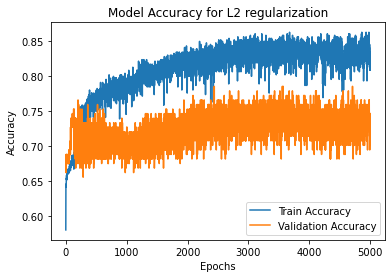

In [164]:
#Plotting train vs validation accuracy for L2 regularization
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy for L2 regularization')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train Accuracy', 'Validation Accuracy'])
plt.show()

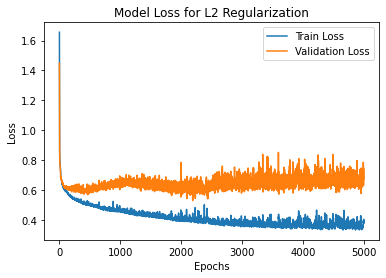

In [165]:
#Plotting train vs validation loss for L2 Regularization
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss for L2 Regularization')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train Loss', 'Validation Loss'])
plt.show()

In [166]:
#Testing data accuracy for L2 regularization
scores = model.evaluate(test_features, test_diabetes_prediction)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

5/5 [==============================] - 0s 2ms/step - loss: 0.9582 - accuracy: 0.7013
accuracy: 70.13%


In [177]:
##Neural network with Dropout
#Model creation using Dropout regularization and ReLU ativation function for hidden layers and sigmoid for output layer

model = Sequential()

#Layer 1
model.add(Dense(8, input_dim=8, activation='relu'))
model.add(Dropout(0.2))

#Layer 2
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.2))

#Layer 3
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.2))

#Output Layer
model.add(Dense(1, activation='sigmoid' ))

#Compiling the  Dropout model
model.compile(loss='binary_crossentropy',  optimizer='SGD', metrics=['accuracy'])
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 8)                 72        
_________________________________________________________________
dropout_6 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_16 (Dense)             (None, 8)                 72        
_________________________________________________________________
dropout_7 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_17 (Dense)             (None, 8)                 72        
_________________________________________________________________
dropout_8 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_18 (Dense)             (None, 1)                

In [178]:
#Training the Dropout model

epochs = 1000  # num of iterations
batch_size = 64
history = model.fit(train_features,train_diabetes_prediction,validation_data=(validate_features, validate_diabetes_prediction),epochs=epochs,batch_size=batch_size)

Epoch 1/1000
8/8 [==============================] - 0s 45ms/step - loss: 3.9164 - accuracy: 0.5152 - val_loss: 1.0278 - val_accuracy: 0.5519
Epoch 2/1000
8/8 [==============================] - 0s 7ms/step - loss: 1.0633 - accuracy: 0.5696 - val_loss: 0.7077 - val_accuracy: 0.6364
Epoch 3/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.8365 - accuracy: 0.6065 - val_loss: 0.6688 - val_accuracy: 0.6558
Epoch 4/1000
8/8 [==============================] - 0s 6ms/step - loss: 0.7134 - accuracy: 0.5891 - val_loss: 0.6808 - val_accuracy: 0.6494
Epoch 5/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.7008 - accuracy: 0.6022 - val_loss: 0.6522 - val_accuracy: 0.6429
Epoch 6/1000
8/8 [==============================] - 0s 6ms/step - loss: 0.6902 - accuracy: 0.5978 - val_loss: 0.6608 - val_accuracy: 0.6429
Epoch 7/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.6782 - accuracy: 0.6065 - val_loss: 0.6630 - val_accuracy: 0.6623
Epoch 8/1000
8/8 [=

Epoch 59/1000
8/8 [==============================] - 0s 9ms/step - loss: 0.6311 - accuracy: 0.6500 - val_loss: 0.6004 - val_accuracy: 0.6623
Epoch 60/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.6451 - accuracy: 0.6457 - val_loss: 0.6258 - val_accuracy: 0.6558
Epoch 61/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.6445 - accuracy: 0.6370 - val_loss: 0.6145 - val_accuracy: 0.6623
Epoch 62/1000
8/8 [==============================] - 0s 6ms/step - loss: 0.6525 - accuracy: 0.6435 - val_loss: 0.6117 - val_accuracy: 0.6623
Epoch 63/1000
8/8 [==============================] - 0s 5ms/step - loss: 0.6482 - accuracy: 0.6435 - val_loss: 0.6111 - val_accuracy: 0.6623
Epoch 64/1000
8/8 [==============================] - 0s 6ms/step - loss: 0.6290 - accuracy: 0.6435 - val_loss: 0.6374 - val_accuracy: 0.6558
Epoch 65/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.6553 - accuracy: 0.6500 - val_loss: 0.6270 - val_accuracy: 0.6558
Epoch 66/1000

Epoch 117/1000
8/8 [==============================] - 0s 5ms/step - loss: 0.6337 - accuracy: 0.6348 - val_loss: 0.6026 - val_accuracy: 0.6623
Epoch 118/1000
8/8 [==============================] - 0s 6ms/step - loss: 0.6344 - accuracy: 0.6326 - val_loss: 0.6013 - val_accuracy: 0.6623
Epoch 119/1000
8/8 [==============================] - 0s 5ms/step - loss: 0.6352 - accuracy: 0.6435 - val_loss: 0.6015 - val_accuracy: 0.6623
Epoch 120/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.6548 - accuracy: 0.6435 - val_loss: 0.6235 - val_accuracy: 0.6623
Epoch 121/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.6315 - accuracy: 0.6500 - val_loss: 0.6161 - val_accuracy: 0.6623
Epoch 122/1000
8/8 [==============================] - 0s 10ms/step - loss: 0.6336 - accuracy: 0.6478 - val_loss: 0.6275 - val_accuracy: 0.6623
Epoch 123/1000
8/8 [==============================] - 0s 11ms/step - loss: 0.6273 - accuracy: 0.6457 - val_loss: 0.6017 - val_accuracy: 0.6623
Epoc

8/8 [==============================] - 0s 5ms/step - loss: 0.6317 - accuracy: 0.6457 - val_loss: 0.6137 - val_accuracy: 0.6623
Epoch 175/1000
8/8 [==============================] - 0s 5ms/step - loss: 0.6297 - accuracy: 0.6609 - val_loss: 0.6009 - val_accuracy: 0.6558
Epoch 176/1000
8/8 [==============================] - 0s 5ms/step - loss: 0.6338 - accuracy: 0.6370 - val_loss: 0.6028 - val_accuracy: 0.6623
Epoch 177/1000
8/8 [==============================] - 0s 5ms/step - loss: 0.6343 - accuracy: 0.6543 - val_loss: 0.6211 - val_accuracy: 0.6623
Epoch 178/1000
8/8 [==============================] - 0s 6ms/step - loss: 0.6284 - accuracy: 0.6522 - val_loss: 0.6274 - val_accuracy: 0.6623
Epoch 179/1000
8/8 [==============================] - 0s 5ms/step - loss: 0.6398 - accuracy: 0.6500 - val_loss: 0.6010 - val_accuracy: 0.6623
Epoch 180/1000
8/8 [==============================] - 0s 5ms/step - loss: 0.6130 - accuracy: 0.6522 - val_loss: 0.6064 - val_accuracy: 0.6623
Epoch 181/1000
8/8 [=

8/8 [==============================] - 0s 6ms/step - loss: 0.6336 - accuracy: 0.6478 - val_loss: 0.6055 - val_accuracy: 0.6623
Epoch 232/1000
8/8 [==============================] - 0s 5ms/step - loss: 0.6128 - accuracy: 0.6500 - val_loss: 0.5936 - val_accuracy: 0.6623
Epoch 233/1000
8/8 [==============================] - 0s 5ms/step - loss: 0.6347 - accuracy: 0.6435 - val_loss: 0.6078 - val_accuracy: 0.6623
Epoch 234/1000
8/8 [==============================] - 0s 5ms/step - loss: 0.6373 - accuracy: 0.6500 - val_loss: 0.6031 - val_accuracy: 0.6623
Epoch 235/1000
8/8 [==============================] - 0s 5ms/step - loss: 0.6325 - accuracy: 0.6457 - val_loss: 0.6123 - val_accuracy: 0.6623
Epoch 236/1000
8/8 [==============================] - 0s 5ms/step - loss: 0.6128 - accuracy: 0.6522 - val_loss: 0.5964 - val_accuracy: 0.6623
Epoch 237/1000
8/8 [==============================] - 0s 5ms/step - loss: 0.6132 - accuracy: 0.6522 - val_loss: 0.5910 - val_accuracy: 0.6623
Epoch 238/1000
8/8 [=

8/8 [==============================] - 0s 7ms/step - loss: 0.6135 - accuracy: 0.6457 - val_loss: 0.5927 - val_accuracy: 0.6623
Epoch 289/1000
8/8 [==============================] - 0s 5ms/step - loss: 0.6105 - accuracy: 0.6500 - val_loss: 0.5883 - val_accuracy: 0.6623
Epoch 290/1000
8/8 [==============================] - 0s 6ms/step - loss: 0.6205 - accuracy: 0.6478 - val_loss: 0.5920 - val_accuracy: 0.6623
Epoch 291/1000
8/8 [==============================] - 0s 5ms/step - loss: 0.6239 - accuracy: 0.6478 - val_loss: 0.6075 - val_accuracy: 0.6623
Epoch 292/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.6339 - accuracy: 0.6478 - val_loss: 0.6098 - val_accuracy: 0.6623
Epoch 293/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.6355 - accuracy: 0.6500 - val_loss: 0.6061 - val_accuracy: 0.6623
Epoch 294/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.6271 - accuracy: 0.6500 - val_loss: 0.5947 - val_accuracy: 0.6623
Epoch 295/1000
8/8 [=

Epoch 346/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.6309 - accuracy: 0.6435 - val_loss: 0.5972 - val_accuracy: 0.6623
Epoch 347/1000
8/8 [==============================] - 0s 5ms/step - loss: 0.6294 - accuracy: 0.6543 - val_loss: 0.6159 - val_accuracy: 0.6623
Epoch 348/1000
8/8 [==============================] - 0s 6ms/step - loss: 0.6359 - accuracy: 0.6500 - val_loss: 0.6253 - val_accuracy: 0.6623
Epoch 349/1000
8/8 [==============================] - 0s 6ms/step - loss: 0.6347 - accuracy: 0.6435 - val_loss: 0.6041 - val_accuracy: 0.6623
Epoch 350/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.6299 - accuracy: 0.6500 - val_loss: 0.6308 - val_accuracy: 0.6623
Epoch 351/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.6271 - accuracy: 0.6543 - val_loss: 0.6120 - val_accuracy: 0.6623
Epoch 352/1000
8/8 [==============================] - 0s 5ms/step - loss: 0.6301 - accuracy: 0.6457 - val_loss: 0.6065 - val_accuracy: 0.6623
Epoch 

Epoch 404/1000
8/8 [==============================] - 0s 6ms/step - loss: 0.6346 - accuracy: 0.6652 - val_loss: 0.6291 - val_accuracy: 0.6688
Epoch 405/1000
8/8 [==============================] - 0s 6ms/step - loss: 0.6345 - accuracy: 0.6478 - val_loss: 0.6066 - val_accuracy: 0.6623
Epoch 406/1000
8/8 [==============================] - 0s 6ms/step - loss: 0.6201 - accuracy: 0.6478 - val_loss: 0.6271 - val_accuracy: 0.6623
Epoch 407/1000
8/8 [==============================] - 0s 5ms/step - loss: 0.6332 - accuracy: 0.6478 - val_loss: 0.6026 - val_accuracy: 0.6623
Epoch 408/1000
8/8 [==============================] - 0s 5ms/step - loss: 0.6203 - accuracy: 0.6435 - val_loss: 0.6167 - val_accuracy: 0.6623
Epoch 409/1000
8/8 [==============================] - 0s 5ms/step - loss: 0.6293 - accuracy: 0.6500 - val_loss: 0.6179 - val_accuracy: 0.6623
Epoch 410/1000
8/8 [==============================] - 0s 9ms/step - loss: 0.6299 - accuracy: 0.6500 - val_loss: 0.6187 - val_accuracy: 0.6623
Epoch 

Epoch 461/1000
8/8 [==============================] - 0s 5ms/step - loss: 0.6267 - accuracy: 0.6543 - val_loss: 0.6036 - val_accuracy: 0.6623
Epoch 462/1000
8/8 [==============================] - 0s 6ms/step - loss: 0.6173 - accuracy: 0.6522 - val_loss: 0.6071 - val_accuracy: 0.6623
Epoch 463/1000
8/8 [==============================] - 0s 5ms/step - loss: 0.6252 - accuracy: 0.6522 - val_loss: 0.6092 - val_accuracy: 0.6623
Epoch 464/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.6227 - accuracy: 0.6500 - val_loss: 0.6178 - val_accuracy: 0.6623
Epoch 465/1000
8/8 [==============================] - 0s 6ms/step - loss: 0.6195 - accuracy: 0.6543 - val_loss: 0.6152 - val_accuracy: 0.6688
Epoch 466/1000
8/8 [==============================] - 0s 6ms/step - loss: 0.6181 - accuracy: 0.6522 - val_loss: 0.6060 - val_accuracy: 0.6623
Epoch 467/1000
8/8 [==============================] - 0s 5ms/step - loss: 0.6274 - accuracy: 0.6457 - val_loss: 0.6069 - val_accuracy: 0.6623
Epoch 

8/8 [==============================] - 0s 7ms/step - loss: 0.6226 - accuracy: 0.6500 - val_loss: 0.6055 - val_accuracy: 0.6623
Epoch 519/1000
8/8 [==============================] - 0s 6ms/step - loss: 0.6222 - accuracy: 0.6522 - val_loss: 0.5841 - val_accuracy: 0.6623
Epoch 520/1000
8/8 [==============================] - 0s 6ms/step - loss: 0.6132 - accuracy: 0.6478 - val_loss: 0.5738 - val_accuracy: 0.6623
Epoch 521/1000
8/8 [==============================] - 0s 6ms/step - loss: 0.6258 - accuracy: 0.6587 - val_loss: 0.5928 - val_accuracy: 0.6623
Epoch 522/1000
8/8 [==============================] - 0s 11ms/step - loss: 0.6170 - accuracy: 0.6522 - val_loss: 0.6237 - val_accuracy: 0.6623
Epoch 523/1000
8/8 [==============================] - 0s 5ms/step - loss: 0.6203 - accuracy: 0.6478 - val_loss: 0.6019 - val_accuracy: 0.6623
Epoch 524/1000
8/8 [==============================] - 0s 5ms/step - loss: 0.6239 - accuracy: 0.6565 - val_loss: 0.6339 - val_accuracy: 0.6623
Epoch 525/1000
8/8 [

Epoch 576/1000
8/8 [==============================] - 0s 6ms/step - loss: 0.6329 - accuracy: 0.6500 - val_loss: 0.6137 - val_accuracy: 0.6429
Epoch 577/1000
8/8 [==============================] - 0s 6ms/step - loss: 0.6319 - accuracy: 0.6565 - val_loss: 0.6219 - val_accuracy: 0.6364
Epoch 578/1000
8/8 [==============================] - 0s 5ms/step - loss: 0.6165 - accuracy: 0.6543 - val_loss: 0.5881 - val_accuracy: 0.6558
Epoch 579/1000
8/8 [==============================] - 0s 5ms/step - loss: 0.6246 - accuracy: 0.6413 - val_loss: 0.6134 - val_accuracy: 0.6494
Epoch 580/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.6140 - accuracy: 0.6565 - val_loss: 0.5938 - val_accuracy: 0.6558
Epoch 581/1000
8/8 [==============================] - 0s 6ms/step - loss: 0.6277 - accuracy: 0.6500 - val_loss: 0.6103 - val_accuracy: 0.6623
Epoch 582/1000
8/8 [==============================] - 0s 6ms/step - loss: 0.6195 - accuracy: 0.6500 - val_loss: 0.6029 - val_accuracy: 0.6623
Epoch 

8/8 [==============================] - 0s 5ms/step - loss: 0.6095 - accuracy: 0.6587 - val_loss: 0.6173 - val_accuracy: 0.6623
Epoch 634/1000
8/8 [==============================] - 0s 6ms/step - loss: 0.6242 - accuracy: 0.6543 - val_loss: 0.5982 - val_accuracy: 0.6623
Epoch 635/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.6252 - accuracy: 0.6457 - val_loss: 0.6217 - val_accuracy: 0.6623
Epoch 636/1000
8/8 [==============================] - 0s 5ms/step - loss: 0.6182 - accuracy: 0.6609 - val_loss: 0.6053 - val_accuracy: 0.6623
Epoch 637/1000
8/8 [==============================] - 0s 5ms/step - loss: 0.6302 - accuracy: 0.6413 - val_loss: 0.5999 - val_accuracy: 0.6623
Epoch 638/1000
8/8 [==============================] - 0s 5ms/step - loss: 0.6285 - accuracy: 0.6391 - val_loss: 0.5989 - val_accuracy: 0.6623
Epoch 639/1000
8/8 [==============================] - 0s 5ms/step - loss: 0.6335 - accuracy: 0.6478 - val_loss: 0.6076 - val_accuracy: 0.6623
Epoch 640/1000
8/8 [=

Epoch 691/1000
8/8 [==============================] - 0s 6ms/step - loss: 0.6268 - accuracy: 0.6565 - val_loss: 0.5897 - val_accuracy: 0.6623
Epoch 692/1000
8/8 [==============================] - 0s 6ms/step - loss: 0.6366 - accuracy: 0.6457 - val_loss: 0.6102 - val_accuracy: 0.6558
Epoch 693/1000
8/8 [==============================] - 0s 6ms/step - loss: 0.6267 - accuracy: 0.6457 - val_loss: 0.6163 - val_accuracy: 0.6623
Epoch 694/1000
8/8 [==============================] - 0s 6ms/step - loss: 0.6284 - accuracy: 0.6522 - val_loss: 0.6088 - val_accuracy: 0.6623
Epoch 695/1000
8/8 [==============================] - 0s 6ms/step - loss: 0.6260 - accuracy: 0.6587 - val_loss: 0.5972 - val_accuracy: 0.6623
Epoch 696/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.6096 - accuracy: 0.6543 - val_loss: 0.6085 - val_accuracy: 0.6623
Epoch 697/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.6198 - accuracy: 0.6500 - val_loss: 0.6082 - val_accuracy: 0.6623
Epoch 

8/8 [==============================] - 0s 6ms/step - loss: 0.6314 - accuracy: 0.6543 - val_loss: 0.6164 - val_accuracy: 0.6623
Epoch 749/1000
8/8 [==============================] - 0s 5ms/step - loss: 0.6263 - accuracy: 0.6457 - val_loss: 0.6012 - val_accuracy: 0.6623
Epoch 750/1000
8/8 [==============================] - 0s 6ms/step - loss: 0.6233 - accuracy: 0.6522 - val_loss: 0.5962 - val_accuracy: 0.6623
Epoch 751/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.6150 - accuracy: 0.6543 - val_loss: 0.5966 - val_accuracy: 0.6623
Epoch 752/1000
8/8 [==============================] - 0s 6ms/step - loss: 0.6231 - accuracy: 0.6543 - val_loss: 0.6019 - val_accuracy: 0.6623
Epoch 753/1000
8/8 [==============================] - 0s 5ms/step - loss: 0.6145 - accuracy: 0.6478 - val_loss: 0.6072 - val_accuracy: 0.6623
Epoch 754/1000
8/8 [==============================] - 0s 6ms/step - loss: 0.6284 - accuracy: 0.6500 - val_loss: 0.5978 - val_accuracy: 0.6623
Epoch 755/1000
8/8 [=

8/8 [==============================] - 0s 5ms/step - loss: 0.6277 - accuracy: 0.6500 - val_loss: 0.6294 - val_accuracy: 0.6623
Epoch 806/1000
8/8 [==============================] - 0s 6ms/step - loss: 0.6247 - accuracy: 0.6478 - val_loss: 0.6090 - val_accuracy: 0.6623
Epoch 807/1000
8/8 [==============================] - 0s 5ms/step - loss: 0.6162 - accuracy: 0.6543 - val_loss: 0.6083 - val_accuracy: 0.6623
Epoch 808/1000
8/8 [==============================] - 0s 10ms/step - loss: 0.6205 - accuracy: 0.6457 - val_loss: 0.5954 - val_accuracy: 0.6623
Epoch 809/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.6173 - accuracy: 0.6543 - val_loss: 0.6010 - val_accuracy: 0.6623
Epoch 810/1000
8/8 [==============================] - 0s 5ms/step - loss: 0.6255 - accuracy: 0.6457 - val_loss: 0.6255 - val_accuracy: 0.6623
Epoch 811/1000
8/8 [==============================] - 0s 5ms/step - loss: 0.6295 - accuracy: 0.6522 - val_loss: 0.6277 - val_accuracy: 0.6688
Epoch 812/1000
8/8 [

Epoch 863/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.6268 - accuracy: 0.6522 - val_loss: 0.5976 - val_accuracy: 0.6558
Epoch 864/1000
8/8 [==============================] - 0s 5ms/step - loss: 0.6237 - accuracy: 0.6522 - val_loss: 0.6169 - val_accuracy: 0.6494
Epoch 865/1000
8/8 [==============================] - 0s 6ms/step - loss: 0.6063 - accuracy: 0.6522 - val_loss: 0.6048 - val_accuracy: 0.6558
Epoch 866/1000
8/8 [==============================] - 0s 5ms/step - loss: 0.6064 - accuracy: 0.6587 - val_loss: 0.6027 - val_accuracy: 0.6429
Epoch 867/1000
8/8 [==============================] - 0s 6ms/step - loss: 0.6230 - accuracy: 0.6543 - val_loss: 0.6026 - val_accuracy: 0.6429
Epoch 868/1000
8/8 [==============================] - ETA: 0s - loss: 0.6872 - accuracy: 0.60 - 0s 5ms/step - loss: 0.6435 - accuracy: 0.6565 - val_loss: 0.6136 - val_accuracy: 0.6429
Epoch 869/1000
8/8 [==============================] - 0s 5ms/step - loss: 0.6028 - accuracy: 0.6457 - val_

8/8 [==============================] - 0s 5ms/step - loss: 0.6237 - accuracy: 0.6565 - val_loss: 0.6078 - val_accuracy: 0.6558
Epoch 921/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.6236 - accuracy: 0.6522 - val_loss: 0.6010 - val_accuracy: 0.6558
Epoch 922/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.6056 - accuracy: 0.6478 - val_loss: 0.5887 - val_accuracy: 0.6623
Epoch 923/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.6313 - accuracy: 0.6609 - val_loss: 0.6141 - val_accuracy: 0.6558
Epoch 924/1000
8/8 [==============================] - 0s 5ms/step - loss: 0.6103 - accuracy: 0.6522 - val_loss: 0.5949 - val_accuracy: 0.6494
Epoch 925/1000
8/8 [==============================] - 0s 5ms/step - loss: 0.6071 - accuracy: 0.6543 - val_loss: 0.6061 - val_accuracy: 0.6494
Epoch 926/1000
8/8 [==============================] - 0s 5ms/step - loss: 0.6232 - accuracy: 0.6500 - val_loss: 0.6223 - val_accuracy: 0.6558
Epoch 927/1000
8/8 [=

Epoch 978/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.6114 - accuracy: 0.6543 - val_loss: 0.6173 - val_accuracy: 0.6623
Epoch 979/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.6239 - accuracy: 0.6457 - val_loss: 0.5983 - val_accuracy: 0.6623
Epoch 980/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.6302 - accuracy: 0.6413 - val_loss: 0.6105 - val_accuracy: 0.6623
Epoch 981/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.6114 - accuracy: 0.6587 - val_loss: 0.5958 - val_accuracy: 0.6623
Epoch 982/1000
8/8 [==============================] - 0s 6ms/step - loss: 0.6290 - accuracy: 0.6522 - val_loss: 0.5979 - val_accuracy: 0.6623
Epoch 983/1000
8/8 [==============================] - 0s 6ms/step - loss: 0.6211 - accuracy: 0.6435 - val_loss: 0.5950 - val_accuracy: 0.6623
Epoch 984/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.6251 - accuracy: 0.6500 - val_loss: 0.6093 - val_accuracy: 0.6623
Epoch 

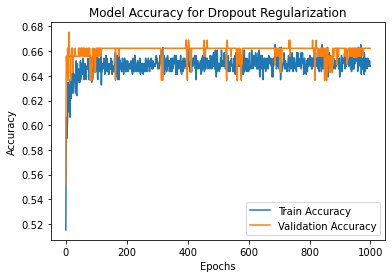

In [179]:
#Plotting train vs validation accuracy for Dropout regularizatioon
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy for Dropout Regularization')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train Accuracy', 'Validation Accuracy'])
plt.show()

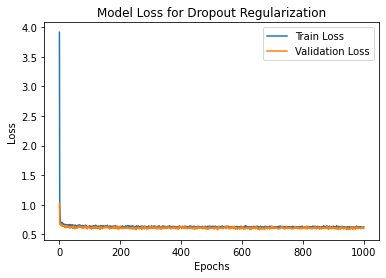

In [180]:
#Plotting train vs validation loss for Dropout regularization
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss for Dropout Regularization')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train Loss', 'Validation Loss'])
plt.show()

In [181]:
#Testing data accuracy for Dropout regularization
scores = model.evaluate(test_features, test_diabetes_prediction)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

5/5 [==============================] - 0s 3ms/step - loss: 0.6173 - accuracy: 0.6558
accuracy: 65.58%
